# The Data Manipulation Is Reused From Assignment 1

The classification sections for Assignment 2 start below.  You can scroll down until you find the Assignment 2 header.

# IMPORT SECTION
<li> designate file location of data
<li> import libraries
<li> set options
<li> load data

## Designate File Location of Data to Import

#### NOTE:  attempted to save csv file as UTF 8 but still generated: 
        "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 40: invalid start byte"
####    adjusted csv header to delete the degree symbol in the two temperature columns.  Replaced symbol with a "d".

In [1]:
#FileLocation = r'C:\Users\robli\OneDrive - The University of Texas at Dallas\MBA\5th Semester\6341 Applied Machine Learning\Assignments\Assignment 1\SeoulBikeData.csv'

In [2]:
#    import necessary libraries 
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
import time
import random
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings("ignore")

#    option modifications
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

ShowWork = True  #Set to true if you want to see work, False if work should be hidden

#    import data
pdBikeData = pd.read_csv("SeoulBikeData.csv")
##    attempted to save csv file as UTF 8 but still generated: "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 40: invalid start byte"
##    adjusted csv header to delete the degree symbol in the two temperature columns.  Replaced symbol with a "d".

# DEFINE GLOBAL CONTROL FUNCTIONS
<li> printif - print statement used to show work
<li> displayif - display statement used to show work

In [3]:
def printif(ShowWork = True, StringToPrint=""):
    if ShowWork: print(StringToPrint)
        
def displayif(ShowWork = True, dataframe = []):
    if ShowWork: display(dataframe)

## Manipulate Data As Needed (Global)
<li>Verify no nulls
<li>Verify data structure integrity - Fix if needed
<li>Transform Categorical Data 

In [4]:
#    Check for null values
printif(ShowWork, "Total Amount of Null Values in Data:" + str(pdBikeData.isnull().sum().sum()))
#    Inspect data
printif(ShowWork, "Original Header Output:" )
displayif(ShowWork, pdBikeData.head())

##   1st column header was not included.  Add "Date" as first column header and remove "Unnamed: 13"
pdBikeData.columns = ["Date"] + pdBikeData.columns[0:-1].tolist()

#    Verify formating now correct
printif(ShowWork, '\n\nAfter adjusting the Header to include Date:')
displayif(ShowWork, pdBikeData.head())

printif(ShowWork, "\n\nNow we need to transform all of the Categorical Data to include in Regression...")
#    Convert four Seasons Categorical Data to 3 individual columns
printif(ShowWork, "The Seasons categories are:" )
printif(ShowWork, pdBikeData['Seasons'].unique())
printif(ShowWork, "Creating Spring, Summer, and Autumn columns")
#    Add 3 Columns (exclude 4th column as it is redundant when you know the other 3)
pdBikeData.insert(12, 'Winter', (pdBikeData[["Seasons"]] == "Winter") * 1, allow_duplicates=False)
pdBikeData.insert(12, 'Autumn', (pdBikeData[["Seasons"]] == "Autumn") * 1, allow_duplicates=False)
pdBikeData.insert(12, 'Summer', (pdBikeData[["Seasons"]] == "Summer") * 1, allow_duplicates=False)
pdBikeData.insert(12, 'Spring', (pdBikeData[["Seasons"]] == "Spring") * 1, allow_duplicates=False)

#    Delete Original Seasons Column
del pdBikeData['Seasons']
#    Add Column for intercept X0=1 value
pdBikeData.insert(2, "X0", 1, allow_duplicates=False)

#    Convert Holiday column to 1/0 representation
printif(ShowWork, "\nThe Holiday categories are:" )
printif(ShowWork, pdBikeData['Holiday'].unique())
printif(ShowWork, "Converting to 1/0 (Holiday/No Holiday)")
pdBikeData['Holiday'] = (pdBikeData['Holiday']=='Holiday') * 1

#    Convert Functioning Day column to 1/0 representation
printif(ShowWork, "\nThe Functioning Day categories are:" )
printif(ShowWork, pdBikeData['Functioning Day'].unique())
printif(ShowWork, "Converting to 1/0 (Yes/No)")
pdBikeData['Functioning Day']=(pdBikeData['Functioning Day']=='Yes') * 1



print("\n\nOur updated dataframe ready for regression:")
display(pdBikeData)

Total Amount of Null Values in Data:0
Original Header Output:


Rented Bike Count  Hour  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons Holiday Functioning Day Unnamed: 13
0      1/12/2017      254         0            -5.2             37                2.2                  2000                     -17.6                 0.0           0.0         0.0    Winter    No Holiday        Yes   
1      1/12/2017      204         1            -5.5             38                0.8                  2000                     -17.6                 0.0           0.0         0.0    Winter    No Holiday        Yes   
2      1/12/2017      173         2            -6.0             39                1.0                  2000                     -17.7                 0.0           0.0         0.0    Winter    No Holiday        Yes   
3      1/12/2017      107         3            -6.2             40                0.9                  2000                     -17.6                 0.0           0.0         0.0    Winter    No Holiday        Yes   
4      1/12/2017       78         4            -6.0             36                2.3                  2000                     -18.6                 0.0           0.0         0.0    Winter    No Holiday        Yes



After adjusting the Header to include Date:


Date     Rented Bike Count  Hour  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons   Holiday   Functioning Day
0  1/12/2017         254           0        -5.2            37              2.2              2000                 -17.6                       0.0                 0.0           0.0       Winter  No Holiday        Yes     
1  1/12/2017         204           1        -5.5            38              0.8              2000                 -17.6                       0.0                 0.0           0.0       Winter  No Holiday        Yes     
2  1/12/2017         173           2        -6.0            39              1.0              2000                 -17.7                       0.0                 0.0           0.0       Winter  No Holiday        Yes     
3  1/12/2017         107           3        -6.2            40              0.9              2000                 -17.6                       0.0                 0.0           0.0       Winter  No Holiday        Yes     
4  1/12/2017          78           4        -6.0            36              2.3              2000                 -18.6                       0.0                 0.0           0.0       Winter  No Holiday        Yes



Now we need to transform all of the Categorical Data to include in Regression...
The Seasons categories are:
['Winter' 'Spring' 'Summer' 'Autumn']
Creating Spring, Summer, and Autumn columns

The Holiday categories are:
['No Holiday' 'Holiday']
Converting to 1/0 (Holiday/No Holiday)

The Functioning Day categories are:
['Yes' 'No']
Converting to 1/0 (Yes/No)


Our updated dataframe ready for regression:


Date     Rented Bike Count  X0  Hour  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Spring  Summer  Autumn  Winter  Holiday  Functioning Day
0      1/12/2017         254          1    0        -5.2            37              2.2              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
1      1/12/2017         204          1    1        -5.5            38              0.8              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
2      1/12/2017         173          1    2        -6.0            39              1.0              2000                 -17.7                       0.0                 0.0           0.0          0       0       0       1       0            1       
3      1/12/2017         107          1    3        -6.2            40              0.9              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
4      1/12/2017          78          1    4        -6.0            36              2.3              2000                 -18.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
...          ...                ...  ..   ...              ...          ...               ...               ...                        ...                      ...           ...            ...     ...     ...     ...     ...      ...              ...
8755  30/11/2018        1003          1   19         4.2            34              2.6              1894                 -10.3                       0.0                 0.0           0.0          0       0       1       0       0            1       
8756  30/11/2018         764          1   20         3.4            37              2.3              2000                  -9.9                       0.0                 0.0           0.0          0       0       1       0       0            1       
8757  30/11/2018         694          1   21         2.6            39              0.3              1968                  -9.9                       0.0                 0.0           0.0          0       0       1       0       0            1       
8758  30/11/2018         712          1   22         2.1            41              1.0              1859                  -9.8                       0.0                 0.0           0.0          0       0       1       0       0            1       
8759  30/11/2018         584          1   23         1.9            43              1.3              1909                  -9.3                       0.0                 0.0           0.0          0       0       1       0       0            1       

[8760 rows x 18 columns]

In [5]:
# Create DayofWeek indicator 
DayofWeek = pd.to_datetime(pdBikeData["Date"], errors='ignore', format = '%mm%dd%YYYY')
Day = pd.to_datetime(DayofWeek, errors='ignore')
X=pdBikeData["X0"].copy()
for i in range (0, len(pdBikeData)):
    X[i] = Day[i].weekday()

pdBikeData.insert(2, 'DayOfWeek', X, allow_duplicates=False)
pdBikeData

Date     Rented Bike Count  DayOfWeek  X0  Hour  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Spring  Summer  Autumn  Winter  Holiday  Functioning Day
0      1/12/2017         254             3       1    0        -5.2            37              2.2              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
1      1/12/2017         204             3       1    1        -5.5            38              0.8              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
2      1/12/2017         173             3       1    2        -6.0            39              1.0              2000                 -17.7                       0.0                 0.0           0.0          0       0       0       1       0            1       
3      1/12/2017         107             3       1    3        -6.2            40              0.9              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
4      1/12/2017          78             3       1    4        -6.0            36              2.3              2000                 -18.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
...          ...                ...        ...  ..   ...              ...          ...               ...               ...                        ...                      ...           ...            ...     ...     ...     ...     ...      ...              ...
8755  30/11/2018        1003             4       1   19         4.2            34              2.6              1894                 -10.3                       0.0                 0.0           0.0          0       0       1       0       0            1       
8756  30/11/2018         764             4       1   20         3.4            37              2.3              2000                  -9.9                       0.0                 0.0           0.0          0       0       1       0       0            1       
8757  30/11/2018         694             4       1   21         2.6            39              0.3              1968                  -9.9                       0.0                 0.0           0.0          0       0       1       0       0            1       
8758  30/11/2018         712             4       1   22         2.1            41              1.0              1859                  -9.8                       0.0                 0.0           0.0          0       0       1       0       0            1       
8759  30/11/2018         584             4       1   23         1.9            43              1.3              1909                  -9.3                       0.0                 0.0           0.0          0       0       1       0       0            1       

[8760 rows x 19 columns]

### Create Train Test Split After Initial Global Manipulating Is Done

In [6]:
X_train, X_test, y_train, y_test = train_test_split(pdBikeData, pdBikeData['Rented Bike Count'], test_size = 0.3 , random_state=42)

display(X_train)

Date     Rented Bike Count  DayOfWeek  X0  Hour  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Spring  Summer  Autumn  Winter  Holiday  Functioning Day
1444  30/01/2018          33             1       1    4       -11.1            50              1.2              1986                 -19.4                      0.00                 0.0           0.0          0       0       0       1       0            1       
1652    7/2/2018         218             0       1   20        -5.8            44              2.1              1994                 -16.1                      0.00                 0.0           0.0          0       0       0       1       0            1       
7496   9/10/2018           0             0       1    8        11.4            66              0.8              1991                   5.2                      0.18                 0.0           0.0          0       0       1       0       1            0       
1893  17/02/2018         133             5       1   21        -2.3            38              2.3              2000                 -14.7                      0.00                 0.0           0.0          0       0       0       1       1            1       
3880   11/5/2018        1496             0       1   16        19.1            54              3.2               542                   9.5                      0.94                 0.0           0.0          1       0       0       0       0            1       
...          ...                ...        ...  ..   ...              ...          ...               ...               ...                        ...                      ...           ...            ...     ...     ...     ...     ...      ...              ...
5734  27/07/2018        1507             4       1   22        29.9            74              2.0              1201                  24.7                      0.00                 0.0           0.0          0       1       0       0       0            1       
5191    5/7/2018         828             0       1    7        23.5            90              0.5               445                  21.7                      0.05                 0.5           0.0          0       1       0       0       0            1       
5390  13/07/2018         999             4       1   14        29.5            62              2.7              1941                  21.4                      1.79                 0.0           0.0          0       1       0       0       0            1       
860     5/1/2018         322             1       1   20        -3.4            51              1.1              1391                 -12.1                      0.00                 0.0           0.0          0       0       0       1       0            1       
7270  29/09/2018        1501             5       1   22        19.3            55              0.5              2000                  10.0                      0.00                 0.0           0.0          0       0       1       0       0            1       

[6132 rows x 19 columns]

### Add a Day of the Week Mean Evaluator

In [7]:
#Redo

#DayofWeek = pd.to_datetime(pdBikeData["Date"], errors='ignore', format = '%mm%dd%YYYY')
#Day = pd.to_datetime(DayofWeek, errors='ignore')
#X=pdBikeData["X0"].copy()
#for i in range (0, len(pdBikeData)):
#    X[i] = Day[i].weekday()

#pdBikeData.insert(2, 'DayOfWeek', X, allow_duplicates=False)

data = {'DayOfWeek': [0,1,2,3,4,5,6],
        'Mean': [X_train[(X_train["DayOfWeek"]==0)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==1)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==2)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==3)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==4)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==5)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==6)]["Rented Bike Count"].mean()
                ]
       }
data
DOWData = pd.DataFrame(data)

DOWData.insert (2, "MeanAdj", DOWData["Mean"]-DOWData["Mean"].mean(), allow_duplicates = False)

printif(ShowWork,DOWData)
pdBikeData.insert(4, 'DOWAdjust', 0, allow_duplicates=False)
#X_train.insert(4, 'DOWAdjust', 0, allow_duplicates=False)
#X_test.insert(4, 'DOWAdjust', 0, allow_duplicates=False)

for i in range(0,len(pdBikeData)):
    pdBikeData.iloc[i,4] = DOWData.iloc[pdBikeData.iloc[i,2],2]
#for i in range(0,len(X_train)):
#    X_train.iloc[i,4] = DOWData.iloc[X_train.iloc[i,2],2]
#for i in range(0,len(pdBikeData)):
#    X_test.iloc[i,4] = DOWData.iloc[X_test.iloc[i,2],2]

display(pdBikeData)
#display(X_train)
#display(X_test)

   DayOfWeek   Mean    MeanAdj
0      0      714.043   6.466 
1      1      666.872 -40.705 
2      2      710.771   3.194 
3      3      741.941  34.364 
4      4      762.989  55.413 
5      5      738.361  30.784 
6      6      618.060 -89.517 


Date     Rented Bike Count  DayOfWeek  X0  DOWAdjust  Hour  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Spring  Summer  Autumn  Winter  Holiday  Functioning Day
0      1/12/2017         254             3       1   34.364      0        -5.2            37              2.2              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
1      1/12/2017         204             3       1   34.364      1        -5.5            38              0.8              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
2      1/12/2017         173             3       1   34.364      2        -6.0            39              1.0              2000                 -17.7                       0.0                 0.0           0.0          0       0       0       1       0            1       
3      1/12/2017         107             3       1   34.364      3        -6.2            40              0.9              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
4      1/12/2017          78             3       1   34.364      4        -6.0            36              2.3              2000                 -18.6                       0.0                 0.0           0.0          0       0       0       1       0            1       
...          ...                ...        ...  ..        ...   ...              ...          ...               ...               ...                        ...                      ...           ...            ...     ...     ...     ...     ...      ...              ...
8755  30/11/2018        1003             4       1   55.413     19         4.2            34              2.6              1894                 -10.3                       0.0                 0.0           0.0          0       0       1       0       0            1       
8756  30/11/2018         764             4       1   55.413     20         3.4            37              2.3              2000                  -9.9                       0.0                 0.0           0.0          0       0       1       0       0            1       
8757  30/11/2018         694             4       1   55.413     21         2.6            39              0.3              1968                  -9.9                       0.0                 0.0           0.0          0       0       1       0       0            1       
8758  30/11/2018         712             4       1   55.413     22         2.1            41              1.0              1859                  -9.8                       0.0                 0.0           0.0          0       0       1       0       0            1       
8759  30/11/2018         584             4       1   55.413     23         1.9            43              1.3              1909                  -9.3                       0.0                 0.0           0.0          0       0       1       0       0            1       

[8760 rows x 20 columns]

### Convert Hour to RankedHour 
   <li>Convert Hour to RankedHour based on Average for the hour

[6, 5, 4, 2, 0, 1, 3, 8, 17, 10, 7, 9, 12, 13, 14, 15, 18, 21, 23, 22, 20, 19, 16, 11]
0        6
1        5
2        4
3        2
4        0
        ..
8755    22
8756    20
8757    19
8758    16
8759    11
Name: Hour, Length: 8760, dtype: int64


HourRentalAvg  rankoutput
0      541.317          6    
1      445.880          5    
2      301.622          4    
3      196.698          2    
4      129.837          0    
5      139.743          1    
6      280.523          3    
7      567.953          8    
8      944.127         17    
9      660.713         10    
10     549.031          7    
11     597.153          9    
12     696.736         12    
13     726.878         13    
14     755.320         14    
15     839.744         15    
16     966.757         18    
17    1155.834         21    
18    1479.157         23    
19    1228.657         22    
20    1070.676         20    
21    1043.992         19    
22     932.136         16    
23     688.684         11

Takeaway here is mostly linear relationship except for peak hour. 
Create Two Hour Columns: one for rank, one for peak. 
This may vary depending on the random state.


<AxesSubplot:xlabel='rankoutput', ylabel='HourRentalAvg'>

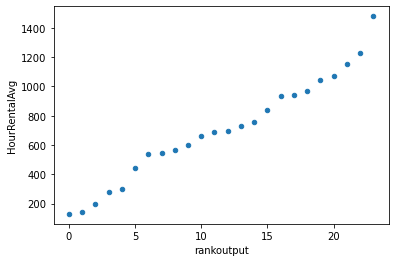

In [8]:
#Redo
#X_train, X_test, y_train, y_test

#Get the mean for each hour in the training set
HourRentalAvg = [0]*24
for i in range (0,24):
    HourRentalAvg[i] = X_train[(X_train["Hour"]==i)]["Rented Bike Count"].mean()

#Rank the mean of each hour in the training set
rankoutput = [0] * len(HourRentalAvg)
for i, x in enumerate(sorted(range(len(HourRentalAvg)), key=lambda y: HourRentalAvg[y])):
    rankoutput[x] = i
printif(ShowWork, rankoutput)

#Create list containing matching Ranks for every hour
AvgHourRank = pdBikeData["Hour"].copy()
for i in range (0,len(pdBikeData)):
    AvgHourRank[i] = rankoutput[pdBikeData.iloc[i,5]]
printif(ShowWork, AvgHourRank) 

#combine hourrental avg and rank into a dataframe
zipped = list(zip(HourRentalAvg, rankoutput))
AVGHOUR= pd.DataFrame(zipped, columns = ['HourRentalAvg', 'rankoutput'])
displayif (ShowWork,AVGHOUR)

print("Takeaway here is mostly linear relationship except for peak hour. \nCreate Two Hour Columns: one for rank, one for peak. \nThis may vary depending on the random state.")
displayif(ShowWork, AVGHOUR.plot(x=1, y= 0, kind='scatter'))

pdBikeData.insert(6, 'HourRank', AvgHourRank, allow_duplicates=False)
pdBikeData.insert(7, 'PeakHours', (pdBikeData[["HourRank"]] > 22) *1 , allow_duplicates=False)

In [9]:
display (pdBikeData.head(24))

Date     Rented Bike Count  DayOfWeek  X0  DOWAdjust  Hour  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Spring  Summer  Autumn  Winter  Holiday  Functioning Day
0   1/12/2017         254             3       1   34.364      0       6         0           -5.2            37              2.2              2000                 -17.6                      0.00                 0.0           0.0          0       0       0       1       0            1       
1   1/12/2017         204             3       1   34.364      1       5         0           -5.5            38              0.8              2000                 -17.6                      0.00                 0.0           0.0          0       0       0       1       0            1       
2   1/12/2017         173             3       1   34.364      2       4         0           -6.0            39              1.0              2000                 -17.7                      0.00                 0.0           0.0          0       0       0       1       0            1       
3   1/12/2017         107             3       1   34.364      3       2         0           -6.2            40              0.9              2000                 -17.6                      0.00                 0.0           0.0          0       0       0       1       0            1       
4   1/12/2017          78             3       1   34.364      4       0         0           -6.0            36              2.3              2000                 -18.6                      0.00                 0.0           0.0          0       0       0       1       0            1       
5   1/12/2017         100             3       1   34.364      5       1         0           -6.4            37              1.5              2000                 -18.7                      0.00                 0.0           0.0          0       0       0       1       0            1       
6   1/12/2017         181             3       1   34.364      6       3         0           -6.6            35              1.3              2000                 -19.5                      0.00                 0.0           0.0          0       0       0       1       0            1       
7   1/12/2017         460             3       1   34.364      7       8         0           -7.4            38              0.9              2000                 -19.3                      0.00                 0.0           0.0          0       0       0       1       0            1       
8   1/12/2017         930             3       1   34.364      8      17         0           -7.6            37              1.1              2000                 -19.8                      0.01                 0.0           0.0          0       0       0       1       0            1       
9   1/12/2017         490             3       1   34.364      9      10         0           -6.5            27              0.5              1928                 -22.4                      0.23                 0.0           0.0          0       0       0       1       0            1       
10  1/12/2017         339             3       1   34.364     10       7         0           -3.5            24              1.2              1996                 -21.2                      0.65                 0.0           0.0          0       0       0       1       0            1       
11  1/12/2017         360             3       1   34.364     11       9         0           -0.5            21              1.3              1936                 -20.2                      0.94                 0.0           0.0          0       0       0       1       0            1       
12  1/12/2017         449             3       1   34.364     12      12         0            1.7            23              1.4              2000                 -17.2                      1.11                 0.0          

### Check to see if there is linearity in Seasons for further consolidation
   <li>Possibly consolidate seasons
   <li>Check to see if spring summer autumn winter are different?

In [10]:
#Get the hourly means for each season in the training set
SpringMean = X_train[X_train["Spring"] ==1]["Rented Bike Count"].mean()
SummerMean = X_train[X_train["Summer"] ==1]["Rented Bike Count"].mean()
AutumnMean = X_train[X_train["Autumn"] ==1]["Rented Bike Count"].mean()
WinterMean = X_train[X_train["Winter"] ==1]["Rented Bike Count"].mean()

printif(ShowWork,"SpringMean:" + str(SpringMean) +"\n SummerMean:" + str(SummerMean) +"\n AutumnMean:" + str(AutumnMean) + "\n WinterMean:" + str(WinterMean))

pdBikeData.insert(20, "SeasonalMeanAdj", (pdBikeData["Spring"]*SpringMean + pdBikeData["Summer"]*SummerMean + pdBikeData["Autumn"]*AutumnMean + pdBikeData["Winter"]*WinterMean)/SummerMean)

pdBikeData

SpringMean:721.3258785942492
 SummerMean:1035.8969539857421
 AutumnMean:826.1104613385315
 WinterMean:225.2107744107744


Date     Rented Bike Count  DayOfWeek  X0  DOWAdjust  Hour  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Spring  Summer  Autumn  Winter  SeasonalMeanAdj  Holiday  Functioning Day
0      1/12/2017         254             3       1   34.364      0       6         0           -5.2            37              2.2              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
1      1/12/2017         204             3       1   34.364      1       5         0           -5.5            38              0.8              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
2      1/12/2017         173             3       1   34.364      2       4         0           -6.0            39              1.0              2000                 -17.7                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
3      1/12/2017         107             3       1   34.364      3       2         0           -6.2            40              0.9              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
4      1/12/2017          78             3       1   34.364      4       0         0           -6.0            36              2.3              2000                 -18.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
...          ...                ...        ...  ..        ...   ...       ...        ...              ...          ...               ...               ...                        ...                      ...           ...            ...     ...     ...     ...     ...              ...      ...              ...
8755  30/11/2018        1003             4       1   55.413     19      22         0            4.2            34              2.6              1894                 -10.3                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8756  30/11/2018         764             4       1   55.413     20      20         0            3.4            37              2.3              2000                  -9.9                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8757  30/11/2018         694             4       1   55.413     21      19         0            2.6            39              0.3              1968                  -9.9                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8758  30/11/2018         712             4       1   55.413     22      16         0            2.1            41              1.0              1859                  -9.8                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8759  30/11/2018         584             4       1   55.413     23      11         0            1.9            43              1.3              1909                  -9.3                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       

[8760 rows x 23 columns]

In [11]:
pdBikeData

Date     Rented Bike Count  DayOfWeek  X0  DOWAdjust  Hour  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Spring  Summer  Autumn  Winter  SeasonalMeanAdj  Holiday  Functioning Day
0      1/12/2017         254             3       1   34.364      0       6         0           -5.2            37              2.2              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
1      1/12/2017         204             3       1   34.364      1       5         0           -5.5            38              0.8              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
2      1/12/2017         173             3       1   34.364      2       4         0           -6.0            39              1.0              2000                 -17.7                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
3      1/12/2017         107             3       1   34.364      3       2         0           -6.2            40              0.9              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
4      1/12/2017          78             3       1   34.364      4       0         0           -6.0            36              2.3              2000                 -18.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
...          ...                ...        ...  ..        ...   ...       ...        ...              ...          ...               ...               ...                        ...                      ...           ...            ...     ...     ...     ...     ...              ...      ...              ...
8755  30/11/2018        1003             4       1   55.413     19      22         0            4.2            34              2.6              1894                 -10.3                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8756  30/11/2018         764             4       1   55.413     20      20         0            3.4            37              2.3              2000                  -9.9                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8757  30/11/2018         694             4       1   55.413     21      19         0            2.6            39              0.3              1968                  -9.9                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8758  30/11/2018         712             4       1   55.413     22      16         0            2.1            41              1.0              1859                  -9.8                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8759  30/11/2018         584             4       1   55.413     23      11         0            1.9            43              1.3              1909                  -9.3                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       

[8760 rows x 23 columns]

In [12]:
BeforeDrop=pdBikeData.copy()
BeforeDrop

Date     Rented Bike Count  DayOfWeek  X0  DOWAdjust  Hour  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Spring  Summer  Autumn  Winter  SeasonalMeanAdj  Holiday  Functioning Day
0      1/12/2017         254             3       1   34.364      0       6         0           -5.2            37              2.2              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
1      1/12/2017         204             3       1   34.364      1       5         0           -5.5            38              0.8              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
2      1/12/2017         173             3       1   34.364      2       4         0           -6.0            39              1.0              2000                 -17.7                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
3      1/12/2017         107             3       1   34.364      3       2         0           -6.2            40              0.9              2000                 -17.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
4      1/12/2017          78             3       1   34.364      4       0         0           -6.0            36              2.3              2000                 -18.6                       0.0                 0.0           0.0          0       0       0       1         0.217          0            1       
...          ...                ...        ...  ..        ...   ...       ...        ...              ...          ...               ...               ...                        ...                      ...           ...            ...     ...     ...     ...     ...              ...      ...              ...
8755  30/11/2018        1003             4       1   55.413     19      22         0            4.2            34              2.6              1894                 -10.3                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8756  30/11/2018         764             4       1   55.413     20      20         0            3.4            37              2.3              2000                  -9.9                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8757  30/11/2018         694             4       1   55.413     21      19         0            2.6            39              0.3              1968                  -9.9                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8758  30/11/2018         712             4       1   55.413     22      16         0            2.1            41              1.0              1859                  -9.8                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       
8759  30/11/2018         584             4       1   55.413     23      11         0            1.9            43              1.3              1909                  -9.3                       0.0                 0.0           0.0          0       0       1       0         0.797          0            1       

[8760 rows x 23 columns]

In [13]:
del pdBikeData['Date']
del pdBikeData['DayOfWeek']
del pdBikeData['Hour']
del pdBikeData['Spring']
del pdBikeData['Summer']
del pdBikeData['Autumn']
del pdBikeData['Winter']
pdBikeData

Rented Bike Count  X0  DOWAdjust  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  SeasonalMeanAdj  Holiday  Functioning Day
0            254          1   34.364        6         0           -5.2            37              2.2              2000                 -17.6                       0.0                 0.0           0.0            0.217          0            1       
1            204          1   34.364        5         0           -5.5            38              0.8              2000                 -17.6                       0.0                 0.0           0.0            0.217          0            1       
2            173          1   34.364        4         0           -6.0            39              1.0              2000                 -17.7                       0.0                 0.0           0.0            0.217          0            1       
3            107          1   34.364        2         0           -6.2            40              0.9              2000                 -17.6                       0.0                 0.0           0.0            0.217          0            1       
4             78          1   34.364        0         0           -6.0            36              2.3              2000                 -18.6                       0.0                 0.0           0.0            0.217          0            1       
...                 ...  ..        ...       ...        ...              ...          ...               ...               ...                        ...                      ...           ...            ...              ...      ...              ...
8755        1003          1   55.413       22         0            4.2            34              2.6              1894                 -10.3                       0.0                 0.0           0.0            0.797          0            1       
8756         764          1   55.413       20         0            3.4            37              2.3              2000                  -9.9                       0.0                 0.0           0.0            0.797          0            1       
8757         694          1   55.413       19         0            2.6            39              0.3              1968                  -9.9                       0.0                 0.0           0.0            0.797          0            1       
8758         712          1   55.413       16         0            2.1            41              1.0              1859                  -9.8                       0.0                 0.0           0.0            0.797          0            1       
8759         584          1   55.413       11         0            1.9            43              1.3              1909                  -9.3                       0.0                 0.0           0.0            0.797          0            1       

[8760 rows x 16 columns]

0: DOWAdjust
1: HourRank
2: PeakHours
3: Seasonal Adjust
4: Holiday
5: Functioning Day
6: Rainfall
7: Snowfall

Temperature? (This could be highly correlated with season)

## Visualize The Relationships Between Rentals and NonConverted Variables

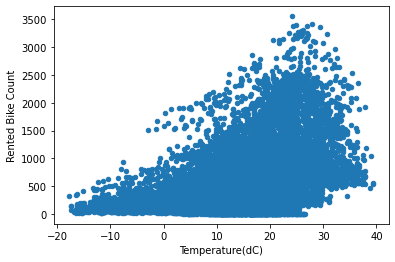

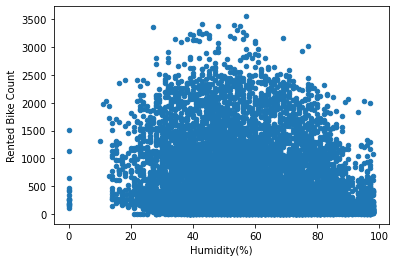

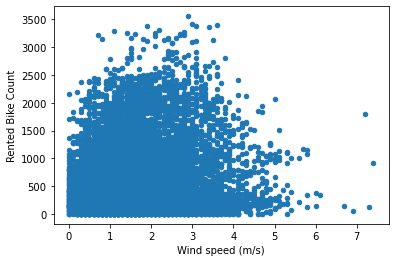

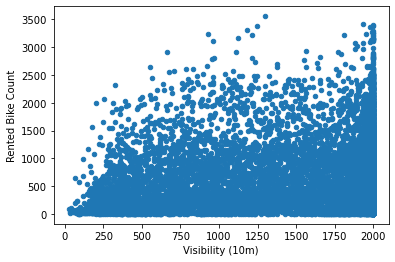

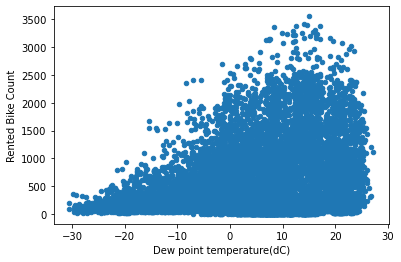

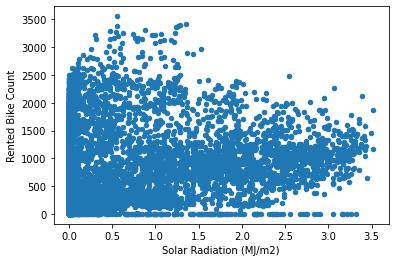

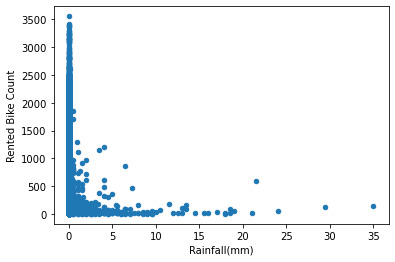

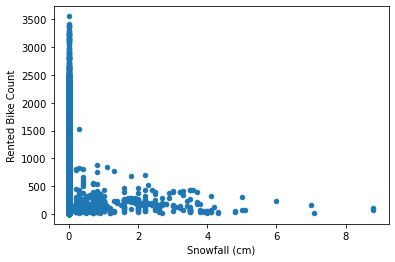

In [14]:
#    Show scatter plots for non binary columns
#for i in range(4,12):
#    pdBikeData.plot(x=i, y= "Rented Bike Count", kind='scatter')

for i in range(5,13):
    pdBikeData.plot(x=i, y= "Rented Bike Count", kind='scatter')

## Final Scaling For Regression Model

In [15]:
#Reset the train set
X_train, X_test, y_train, y_test = train_test_split(pdBikeData, pdBikeData['Rented Bike Count'], test_size = 0.4, random_state=42)

#Scale all olumns that need 
for i in ("DOWAdjust","HourRank","Temperature(dC)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(dC)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"):
    #print(i,temp[i].mean(), temp[i].max(),temp[i].min())
    pdBikeData[i] = (pdBikeData[i] - X_train[i].mean())/(X_train[i].max()-X_train[i].mean())
display(pdBikeData)


Rented Bike Count  X0  DOWAdjust  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  SeasonalMeanAdj  Holiday  Functioning Day
0            254          1    0.627     -0.481       0          -0.696         -0.527           0.082             1.000                -0.954                     -0.2               -0.006        -0.008           0.217          0            1       
1            204          1    0.627     -0.568       0          -0.708         -0.502          -0.165             1.000                -0.954                     -0.2               -0.006        -0.008           0.217          0            1       
2            173          1    0.627     -0.655       0          -0.727         -0.477          -0.130             1.000                -0.958                     -0.2               -0.006        -0.008           0.217          0            1       
3            107          1    0.627     -0.829       0          -0.734         -0.452          -0.148             1.000                -0.954                     -0.2               -0.006        -0.008           0.217          0            1       
4             78          1    0.627     -1.003       0          -0.727         -0.552           0.100             1.000                -0.998                     -0.2               -0.006        -0.008           0.217          0            1       
...                 ...  ..        ...       ...        ...              ...          ...               ...               ...                        ...                      ...           ...            ...              ...      ...              ...
8755        1003          1    1.000      0.913       0          -0.335         -0.602           0.153             0.811                -0.633                     -0.2               -0.006        -0.008           0.797          0            1       
8756         764          1    1.000      0.739       0          -0.366         -0.527           0.100             1.000                -0.615                     -0.2               -0.006        -0.008           0.797          0            1       
8757         694          1    1.000      0.652       0          -0.397         -0.477          -0.254             0.943                -0.615                     -0.2               -0.006        -0.008           0.797          0            1       
8758         712          1    1.000      0.390       0          -0.416         -0.427          -0.130             0.749                -0.611                     -0.2               -0.006        -0.008           0.797          0            1       
8759         584          1    1.000     -0.045       0          -0.424         -0.377          -0.077             0.838                -0.589                     -0.2               -0.006        -0.008           0.797          0            1       

[8760 rows x 16 columns]

Correlation Matrix

In [16]:
CorData = pdBikeData.copy()
CorData.drop(columns = "X0", axis = 1, inplace = True)
corr = CorData.corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

## Update Train Test Split After All Manipulating Is Done

In [17]:
X_train, X_test, y_train, y_test = train_test_split(pdBikeData, pdBikeData['Rented Bike Count'], test_size = 0.4, random_state=42)
display(X_train)


Rented Bike Count  X0  DOWAdjust  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  SeasonalMeanAdj  Holiday  Functioning Day
4938        2094          1   -1.565      1.000       1           0.647         -0.577           0.276             0.653                 0.375                     0.192              -0.006        -0.008           1.000          0            1       
3409         578          1   -1.565     -0.568       0           0.114         -0.477          -0.271             1.000                -0.096                    -0.200              -0.006        -0.008           0.696          0            1       
6691        2468          1    0.076      0.913       0           0.478         -0.076           0.258             1.000                 0.507                    -0.149              -0.006        -0.008           0.797          0            1       
6328        1112          1   -0.701      0.564       0           0.670         -0.126           0.047             0.982                 0.688                     0.420              -0.006        -0.008           1.000          0            1       
1756          33          1   -1.565     -1.003       0          -0.826         -0.677           0.311             1.000                -1.178                    -0.200              -0.006        -0.008           0.217          0            1       
...                 ...  ..        ...       ...        ...              ...          ...               ...               ...                        ...                      ...           ...            ...              ...      ...              ...
5734        1507          1    1.000      0.390       0           0.651          0.399           0.047            -0.423                 0.908                    -0.200              -0.006        -0.008           1.000          0            1       
5191         828          1    0.134     -0.307       0           0.405          0.800          -0.218            -1.769                 0.776                    -0.183               0.015        -0.008           1.000          0            1       
5390         999          1    1.000      0.216       0           0.635          0.099           0.170             0.895                 0.762                     0.410              -0.006        -0.008           1.000          0            1       
860          322          1   -0.701      0.739       0          -0.627         -0.177          -0.112            -0.085                -0.712                    -0.200              -0.006        -0.008           0.217          0            1       
7270        1501          1    0.564      0.390       0           0.244         -0.076          -0.218             1.000                 0.261                    -0.200              -0.006        -0.008           0.797          0            1       

[5256 rows x 16 columns]

In [18]:
print("Mean: ", y_train.mean())
print("Mode: ", y_train.median())

Mean:  704.5266362252663
Mode:  504.0


# -----------------------------------------------------------------------------------------------
# BEGINNING OF ASSIGNMENT 2

In [19]:
# Linear SVC 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm

# GridSearchCV capabilities
from sklearn.model_selection import GridSearchCV

# Sklearn ROC curve and Confusion Matrix capabilities
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc


# Heatmap capabilities
import seaborn as sns

### Introduce Target Variable

#### The meadian value of the training set was choosen to establish a target variable for our classification models

In [20]:
print("The training set median value of Rented Bikes: ", X_train['Rented Bike Count'].median())
pdBikeData.insert(1, 'MedianOrHigher', (pdBikeData[['Rented Bike Count']] >= X_train['Rented Bike Count'].median()) * 1, allow_duplicates=False)

#Resplit the data know that the target variable has been added.
X_train, X_test, y_train, y_test = train_test_split(pdBikeData.iloc[:,3:], pdBikeData['MedianOrHigher'], test_size = 0.4, random_state=42)
print("After updating with the target variable and resplitting, this is what our Train data looks like:")
display(X_train)


The training set median value of Rented Bikes:  504.0
After updating with the target variable and resplitting, this is what our Train data looks like:


DOWAdjust  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  SeasonalMeanAdj  Holiday  Functioning Day
4938   -1.565      1.000       1           0.647         -0.577           0.276             0.653                 0.375                     0.192              -0.006        -0.008           1.000          0            1       
3409   -1.565     -0.568       0           0.114         -0.477          -0.271             1.000                -0.096                    -0.200              -0.006        -0.008           0.696          0            1       
6691    0.076      0.913       0           0.478         -0.076           0.258             1.000                 0.507                    -0.149              -0.006        -0.008           0.797          0            1       
6328   -0.701      0.564       0           0.670         -0.126           0.047             0.982                 0.688                     0.420              -0.006        -0.008           1.000          0            1       
1756   -1.565     -1.003       0          -0.826         -0.677           0.311             1.000                -1.178                    -0.200              -0.006        -0.008           0.217          0            1       
...         ...       ...        ...              ...          ...               ...               ...                        ...                      ...           ...            ...              ...      ...              ...
5734    1.000      0.390       0           0.651          0.399           0.047            -0.423                 0.908                    -0.200              -0.006        -0.008           1.000          0            1       
5191    0.134     -0.307       0           0.405          0.800          -0.218            -1.769                 0.776                    -0.183               0.015        -0.008           1.000          0            1       
5390    1.000      0.216       0           0.635          0.099           0.170             0.895                 0.762                     0.410              -0.006        -0.008           1.000          0            1       
860    -0.701      0.739       0          -0.627         -0.177          -0.112            -0.085                -0.712                    -0.200              -0.006        -0.008           0.217          0            1       
7270    0.564      0.390       0           0.244         -0.076          -0.218             1.000                 0.261                    -0.200              -0.006        -0.008           0.797          0            1       

[5256 rows x 14 columns]

### Split Test sets into Validation and Test sets

In [21]:
#Resplit the data know that the target variable has been added.
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.25, random_state=42)
print("After updating with the target variable and resplitting, this is what our Validation data looks like:")
display(X_val)
print("After updating with the target variable and resplitting, this is what our final test data looks like:")
display(X_test)

After updating with the target variable and resplitting, this is what our Validation data looks like:


DOWAdjust  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  SeasonalMeanAdj  Holiday  Functioning Day
5013    0.076      0.652       0           0.398          0.324          -0.077            -0.523                 0.600                    -0.200              -0.006        -0.008           1.000          0            1       
1334    0.627      0.216       0          -0.896         -0.827           0.100             0.966                -1.354                     0.212              -0.006         0.049           0.217          0            1       
3246   -1.565     -0.742       0          -0.282          0.675          -0.095            -1.192                -0.038                    -0.200              -0.006        -0.008           0.696          0            1       
2431    0.134     -0.307       0          -0.381         -0.126          -0.218            -0.614                -0.426                    -0.200              -0.006        -0.008           0.696          0            1       
1436    0.134      0.739       0          -0.780         -0.427           0.364             1.000                -0.989                    -0.200              -0.006        -0.008           0.217          0            1       
...         ...       ...        ...              ...          ...               ...               ...                        ...                      ...           ...            ...              ...      ...              ...
503     0.627     -0.045       0          -0.554          0.524          -0.201            -1.100                -0.382                    -0.200              -0.006         0.083           0.217          0            1       
8168    0.134      0.477       0          -0.163          0.474          -0.183            -1.620                 0.032                    -0.163              -0.006        -0.008           0.797          0            0       
3071    0.076     -0.045       0          -0.378         -0.477           0.241             1.000                -0.597                    -0.200              -0.006        -0.008           0.696          0            1       
8476    0.134     -1.003       0          -0.324          0.224          -0.148            -0.469                -0.228                    -0.200              -0.006        -0.008           0.797          0            1       
7808    0.134      0.477       0          -0.124         -0.001          -0.201             0.215                -0.100                    -0.125              -0.006        -0.008           0.797          0            1       

[2628 rows x 14 columns]

After updating with the target variable and resplitting, this is what our final test data looks like:


DOWAdjust  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  SeasonalMeanAdj  Holiday  Functioning Day
4597    0.564      0.129       0           0.432         -0.252          -0.095             0.943                 0.366                     0.546              -0.006        -0.008           1.000          0            1       
3891    0.076     -0.829       0           0.087          0.124          -0.218            -1.315                 0.177                    -0.200              -0.006        -0.008           0.696          0            1       
1850    1.000     -0.655       0          -0.654         -0.502          -0.095             0.993                -0.897                    -0.200              -0.006        -0.008           0.217          1            1       
1477    0.076      0.129       0          -0.527         -0.477           0.153             0.738                -0.751                    -0.016              -0.006         0.313           0.217          0            1       
5155    0.076      0.913       0           0.670          0.099          -0.148             1.000                 0.798                     0.021              -0.002        -0.008           1.000          0            1       
...         ...       ...        ...              ...          ...               ...               ...                        ...                      ...           ...            ...              ...      ...              ...
268    -0.701     -1.003       0          -0.942         -0.277           0.064             0.968                -1.086                    -0.200              -0.006        -0.008           0.217          0            1       
7809    0.134     -0.132       0          -0.040         -0.202          -0.112             0.161                -0.104                     0.055              -0.006        -0.008           0.797          0            1       
7594    0.564     -0.394       0          -0.013         -0.202          -0.059             0.487                -0.074                     0.373              -0.006        -0.008           0.797          0            1       
3256   -1.565      0.564       0          -0.036          0.074           0.329            -0.115                 0.023                    -0.006              -0.006        -0.008           0.696          0            1       
4824    0.076     -0.481       0           0.259          0.324           0.047            -0.193                 0.446                    -0.200              -0.006        -0.008           1.000          0            1       

[876 rows x 14 columns]

Define Custom Made Functions 

In [22]:
#TransofrmRBF takes the GridSearchCV fit dataframe and converts the data to 10^ format and adds a time cost variable
def TransformRBF(data=[], CrossVal = 0):
    subset = data.loc[:,['param_C','param_gamma','mean_fit_time', 'mean_score_time','mean_test_score']]
    
    subset['param_C'] = pd.to_numeric(subset['param_C'], errors='coerce')
    subset['param_gamma'] = pd.to_numeric(subset['param_gamma'], errors='coerce')
    #display(subset.head())
    
    subset['Total_Time'] = CrossVal * (subset['mean_fit_time'] + subset['mean_score_time']) 
    subset['Time_Per_Accuracy_Percentage']= subset['mean_fit_time']/(100*subset['mean_test_score'])
    #display(subset.head())
    
    transformedsubset = subset.copy()
    transformedsubset['param_C'] = np.log10(subset.loc[:,'param_C']) 
    transformedsubset['param_gamma'] = np.log10(transformedsubset['param_gamma'])
    
    return transformedsubset

#CostFigure3D allows us to display a dataframe in 3Dimension.  Used for RBF visualization
def CostFigure3D(data=[], Axis=['X','Y','Z'], Title="" , Elev = 0, Azim = 0):
    #display (data)
    #print (data.columns[1])
    #print (data.columns[2])
    #print (data.columns[0])
    Z = data.pivot_table(index=data.columns[0], columns=data.columns[1], values=data.columns[2]).T.values
    X_unique = np.sort(data[data.columns[0]].unique())
    Y_unique = np.sort(data[data.columns[1]].unique())
    X, Y = np.meshgrid(X_unique, Y_unique)
    
    #fig = plt.figure(figsize = (12.2,4.20))
    fig = plt.figure()
    fig.set_figheight(13)
    fig.set_figwidth(12)
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel(Axis[0])
    ax.set_ylabel(Axis[1])
    ax.set_zlabel(Axis[2])
    #ax.scatter3D(x,y,z)
    plt.title(Title)

     # Angle values imported as parameters through function
    elev = Elev
    azim =Azim
    ax.view_init(elev, azim)

    # Plot a basic wireframe.
    ax.plot_wireframe(X, Y, Z, rstride=90, cstride=90)

    ax.plot_surface(X, Y, Z, cmap="winter", lw=0.5, rstride=1, cstride=1, alpha = 0.25)
    ax.contour3D(X, Y, Z, cmap="binary")
    plt.show()
    
#Displays the confusion matrix and ROC Curve
def ShowCMandROC (ToPlot=[], Title="NoTitleGiven"):
    #Train Outcomes
    disp = plot_confusion_matrix(ToPlot,  X_train, y_train, cmap='Blues', values_format='d')
    disp.ax_.set_title(Title +" Training Set")
    disp = plot_roc_curve(ToPlot, X_train, y_train)
    disp.ax_.set_title(Title +" Training Set")

    #Test Outcomes
    disp = plot_confusion_matrix(ToPlot,  X_test, y_test, cmap='Blues', values_format='d')
    disp.ax_.set_title(Title +" Testing Set")
    disp = plot_roc_curve(ToPlot, X_test, y_test)
    disp.ax_.set_title(Title +" Testing Set")
    
#Display the Test Data Results
def ShowTestResults(ToTest=[], Title="NoTitleGiven",AUC_On=False):
    y_pred = ToTest.predict(X_test)
    
    if AUC_On :
        yPred_p = ToTest.predict_proba(X_test)[:,1]

    cm = confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()

    print("TEST DATA RESULTS : ", Title,"\n***************************************")
    print("         Accuracy : ", accuracy_score(y_test,y_pred))
    print("Balanced accuracy : ", balanced_accuracy_score(y_test,y_pred))
    print("        Precision : ", precision_score(y_test,y_pred))
    print("           Recall : ", recall_score(y_test,y_pred))
    if AUC_On: print("              AUC : ", roc_auc_score(y_test,yPred_p))
    print("      Sensitivity : ", (tp/(tp+fn)))
    print("      Specificity : ", (tn/(tn+fp)))

# Assignment 3

In [23]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

### Handmade function similar to GridsearchCV
Allows for the capture of both train and validation data

In [24]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(X_train, X_val, y_val, X_test, y_test, y_train, batch_size_list,epoch_list,node2_size_list,node3_size_list, activation_function):
    
    y_train2= pd.DataFrame(y_train.copy(deep=True))
    y_val2 = pd.DataFrame(y_val.copy(deep=True))
    y_test2= pd.DataFrame(y_test.copy(deep=True))
    
    TrialNumber=0
    
    #SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters'])
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Train_Accuracy', 'Validation_Accuracy' ,
                                            'Epochs', 'Batch_Size',  'Node2_Size',  'Node3_Size','Time_Cost', 
                                            'Test_Accuracy']) 
    
    for node3_trial in node3_size_list:
        for node2_trial in node2_size_list:
            for batch_size_trial in batch_size_list:
                for epochs_trial in epoch_list:
                    TrialNumber+=1
                    stopwatchstart= time.time()

                    # Creating the classifier ANN model
                    classifier = Sequential()
                    classifier.add(Dense(units=node2_trial, input_dim=len(X_train.columns), kernel_initializer='uniform', activation='relu'))
                    classifier.add(Dense(units=node3_trial, kernel_initializer='uniform', activation='relu'))
                    classifier.add(Dense(units=1, kernel_initializer='uniform', activation=activation_function))
                    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


                    #**survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
                    
                    classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
                    
                    #Evaluate Performance
                    TrainScore = classifier.evaluate(X_train, y_train2.MedianOrHigher, verbose = 0)[1] 
                    ValScore = classifier.evaluate(X_val, y_val2.MedianOrHigher, verbose = 0)[1] 
                    TestScore = classifier.evaluate(X_test, y_test2.MedianOrHigher, verbose = 0)[1]
                    
                    
                    stopwatchstop = time.time()
                    processtime = stopwatchstop - stopwatchstart
                    
                    # Fetching the accuracy of the training
                    #**Accuracy = survivalANN_Model.history['accuracy'][-1]

                    # printing the results of the current iteration
                    print(TrialNumber, 'Parameters:','Batch:', batch_size_trial,'-', 
                          'Epochs:',epochs_trial, 'Layer 2:',node2_trial, 'Layer 3:',node3_trial, 'Train Accuracy:', "%.5f"%TrainScore, 'Validation Accuracy:', "%.5f"%ValScore)

                    SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                                    'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial) +'Node2Size'+str(node2_trial)+'Node3Size'+str(node3_trial), 
                                    TrainScore, ValScore, epochs_trial, batch_size_trial, node2_trial, node3_trial, processtime, TestScore ]],
                                    columns=['TrialNumber', 'Parameters', 'Train_Accuracy', 'Validation_Accuracy', 'Epochs', 'Batch_Size',  'Node2_Size',  'Node3_Size','Time_Cost', 'Test_Accuracy' ] ))
    return(SearchResultsData)

### Function to generate plots of accuracy for train and validation

In [25]:
###############################################

def PlotGroups(ResultsData, AlternativeTolerance=.005, TimeTolerance=10 ):
    
    #Designate Line Colors
    LineColor=["black","blue","orange","green", "red", "purple","cyan"]



    generator = len(ResultsData.Node2_Size.unique())
    linespotgenerator = len(ResultsData.Epochs.unique())
    linegenerator = len(ResultsData.Batch_Size.unique())
    maxAccuracy = max(ResultsData.Validation_Accuracy)
    
    
    ResultsData['Group'] = pd.DataFrame((ResultsData.TrialNumber-1)//(len(ResultsData.Epochs.unique())*len(ResultsData.Batch_Size.unique())))
    ResultsData['SubPlotRow'] = pd.DataFrame(ResultsData.Group//generator)
    ResultsData['SubPlotColumn'] = pd.DataFrame(ResultsData.Group%generator)
    ResultsData['LineNumber'] = ((ResultsData.TrialNumber - 1) // linespotgenerator ) % linegenerator +1
    ResultsData['LineSpot'] = (ResultsData.TrialNumber-1) % linespotgenerator +1
    ResultsData['Alternative'] = (ResultsData.Validation_Accuracy > (maxAccuracy-AlternativeTolerance)) & (ResultsData.Time_Cost < TimeTolerance)
    
   
    numrows= len(ResultsData.SubPlotRow.unique())
    numcolumns= len(ResultsData.SubPlotColumn.unique())
    numlines =  len(ResultsData.LineNumber.unique())
    numspots =  len(ResultsData.LineSpot.unique())
    
    
    #display(ResultsData)
    print("Total Rows:", numrows)
    print("Unique Rows: ",ResultsData.SubPlotRow.unique())
    print("Total Columns:", numcolumns)
    print("Unique Columns: ",ResultsData.SubPlotColumn.unique())
    
    from IPython.core.display import display, HTML
    display(HTML("<style>div.output_scroll { height: 45em; }</style>"))

            
    # Show the best parameter
    TopScore = ResultsData.sort_values(by='Validation_Accuracy', ascending=False).head(1)
    styles = [dict(selector="caption",
                    props=[("text-align", "center"),
                           ("font-size", "150%"),
                           ("color", 'green')])]
    display(TopScore.iloc[:,2:10].style.set_caption('<b>Best Performing Parameters</b>').set_table_styles(styles))
    
    # Show the best alternatives
    AltScores = ResultsData[ResultsData.Alternative==True]
    styles = [dict(selector="caption",
                    props=[("text-align", "center"),
                           ("font-size", "150%"),
                           ("color", 'green')])]
    AltScoresTitle = str("<b>Time Friendly Alternatives of Accuracy within " + str(AlternativeTolerance * 100 ) + "% and < " + 
                         str(TimeTolerance) + " seconds to train</b>")
    display(AltScores.iloc[:,2:10].style.set_caption(AltScoresTitle).set_table_styles(styles))

    
    
    #define tick labels to transform plot into grid
    XTickLabels = [0]
    for i in range (0,len(ResultsData.Epochs.unique())):
        XTickLabels.append( ResultsData.Epochs.unique()[i])


    # making subplots
    fig, ax = plt.subplots(numrows,numcolumns, figsize=(6*numrows,6*numcolumns))

    for row in range(0,numrows):
        for column in range(0,numcolumns):
            GroupLines = ResultsData.loc[(ResultsData['SubPlotRow']==row)&(ResultsData['SubPlotColumn']==column)]
            ##print("SanityCheck: Number of observations in GroupLines:", GroupLines.shape[0])
            #display(GroupLines)

            #Indicate winning parameter            
            if max(GroupLines.Validation_Accuracy)==max(TopScore.Validation_Accuracy) : 
                ax[row, column].plot(TopScore.LineSpot,TopScore.Validation_Accuracy,
                                     marker="*",color="darkslategrey",markersize=15, alpha=.5,
                                     label = "Top Performer")
            #Validation Line
            for line in range(1,numlines+1):
                ##print("Sanity Check: Should Print out 4 points")
                ThisLine = GroupLines.loc[GroupLines.LineNumber==line]
                ##display(ThisLine)
                
                ax[row,column].plot(ThisLine.LineSpot, ThisLine.Validation_Accuracy,
                                    label = ("(Val)Batch Size: " + str(ThisLine.Batch_Size.iloc[0])), 
                                    color = LineColor[line])
            #Train Line    
            for line in range(1,numlines+1):
                ##print("Sanity Check: Should Print out 4 points")
                ThisLine = GroupLines.loc[GroupLines.LineNumber==line]
                ##display(ThisLine)
                ax[row,column].plot(ThisLine.LineSpot, ThisLine.Train_Accuracy,
                                    label = ("(Train)Batch Size: " + str(ThisLine.Batch_Size.iloc[0])),
                                    color = LineColor[line], ls=':' )

            #Show alternatives
            #display(GroupLines[GroupLines.Alternative == True])
            ax[row,column].scatter(GroupLines[GroupLines.Alternative == True].LineSpot,
                                GroupLines[GroupLines.Alternative == True].Validation_Accuracy,
                                marker = "*", s=145, color = 'hotpink',
                                label = ("Alternative Candidate"))



            #subplot Title
            ax[row,column].title.set_text("NUMBER OF NODES\n" +
                                          "LAYER 2: " + str(GroupLines.Node2_Size.iloc[0])+ ", "+
                                          "LAYER 3: " + str(GroupLines.Node3_Size.iloc[0]))

            #subplot Xaxis & Yaxis Title
            ax[row,column].set_xlabel("# of Epochs")
            ax[row,column].set_ylabel("Accuracy")

            #subplot Xaxis Width - Number of Epochs
            ax[row,column].set_xlim(.5, numspots + .5) #**

            #subplot Xaxis Tick Labels - Show each Epoch but spread out equally
            ax[row,column].set_xticklabels(XTickLabels)

            #subplot Xaxis Tick Marks - Should see a tickmark for each epoch(the plus 2 creates 2 off plot tickmarks, frames epochs)
            ax[row,column].locator_params(axis='x', nbins=len(GroupLines.Epochs.unique())+1) ##*

            #subplot Yaxis Height - Accuracy Range
            if min(ResultsData.Validation_Accuracy) <.40:
                ax[row,column].set_ylim( .675, max(ResultsData.Validation_Accuracy)+.0025)
            #else:ax[row,column].set_ylim(min(ResultsData.Validation_Accuracy)-.0025, max(ResultsData.Validation_Accuracy)+.0025)    
            else:ax[row,column].set_ylim(.84, max(max(ResultsData.Validation_Accuracy),max(ResultsData.Train_Accuracy))+.0025)    


            #subplot Target - show how close to the best value subplot is
            l1=ax[row,column].axhline(max(ResultsData.Validation_Accuracy),color='darkslategrey',ls='--')
            l1.set_label('Best Threshold')
            
            ax[row,column].legend(loc='lower right', framealpha =1)





    # set the spacing between subplots
    fig.tight_layout()
    #Add axis labels to all subplots
    plt.xlabel("# of Epochs")
    plt.ylabel("Validation_Accuracy")
    
    plt.show()
    
    return()

# TURN ON "RunBigTest" TO PERFORM A LONG TEST

1 Parameters: Batch: 25 - Epochs: 10 Layer 2: 3 Layer 3: 1 Train Accuracy: 0.84247 Validation Accuracy: 0.84817
2 Parameters: Batch: 25 - Epochs: 50 Layer 2: 3 Layer 3: 1 Train Accuracy: 0.49962 Validation Accuracy: 0.50342
3 Parameters: Batch: 25 - Epochs: 100 Layer 2: 3 Layer 3: 1 Train Accuracy: 0.91191 Validation Accuracy: 0.91743
4 Parameters: Batch: 25 - Epochs: 200 Layer 2: 3 Layer 3: 1 Train Accuracy: 0.50038 Validation Accuracy: 0.49658
5 Parameters: Batch: 25 - Epochs: 500 Layer 2: 3 Layer 3: 1 Train Accuracy: 0.50038 Validation Accuracy: 0.49658
6 Parameters: Batch: 25 - Epochs: 1000 Layer 2: 3 Layer 3: 1 Train Accuracy: 0.90088 Validation Accuracy: 0.90449
7 Parameters: Batch: 75 - Epochs: 10 Layer 2: 3 Layer 3: 1 Train Accuracy: 0.82934 Validation Accuracy: 0.84323
8 Parameters: Batch: 75 - Epochs: 50 Layer 2: 3 Layer 3: 1 Train Accuracy: 0.85331 Validation Accuracy: 0.85921
9 Parameters: Batch: 75 - Epochs: 100 Layer 2: 3 Layer 3: 1 Train Accuracy: 0.88356 Validation Accu

73 Parameters: Batch: 150 - Epochs: 10 Layer 2: 7 Layer 3: 1 Train Accuracy: 0.50038 Validation Accuracy: 0.49658
74 Parameters: Batch: 150 - Epochs: 50 Layer 2: 7 Layer 3: 1 Train Accuracy: 0.88851 Validation Accuracy: 0.89384
75 Parameters: Batch: 150 - Epochs: 100 Layer 2: 7 Layer 3: 1 Train Accuracy: 0.85826 Validation Accuracy: 0.86568
76 Parameters: Batch: 150 - Epochs: 200 Layer 2: 7 Layer 3: 1 Train Accuracy: 0.88280 Validation Accuracy: 0.88889
77 Parameters: Batch: 150 - Epochs: 500 Layer 2: 7 Layer 3: 1 Train Accuracy: 0.89707 Validation Accuracy: 0.90068
78 Parameters: Batch: 150 - Epochs: 1000 Layer 2: 7 Layer 3: 1 Train Accuracy: 0.89973 Validation Accuracy: 0.90487
79 Parameters: Batch: 250 - Epochs: 10 Layer 2: 7 Layer 3: 1 Train Accuracy: 0.75704 Validation Accuracy: 0.75723
80 Parameters: Batch: 250 - Epochs: 50 Layer 2: 7 Layer 3: 1 Train Accuracy: 0.84437 Validation Accuracy: 0.85274
81 Parameters: Batch: 250 - Epochs: 100 Layer 2: 7 Layer 3: 1 Train Accuracy: 0.870

144 Parameters: Batch: 250 - Epochs: 1000 Layer 2: 21 Layer 3: 1 Train Accuracy: 0.92808 Validation Accuracy: 0.92428
145 Parameters: Batch: 500 - Epochs: 10 Layer 2: 21 Layer 3: 1 Train Accuracy: 0.73954 Validation Accuracy: 0.73706
146 Parameters: Batch: 500 - Epochs: 50 Layer 2: 21 Layer 3: 1 Train Accuracy: 0.83904 Validation Accuracy: 0.84437
147 Parameters: Batch: 500 - Epochs: 100 Layer 2: 21 Layer 3: 1 Train Accuracy: 0.89973 Validation Accuracy: 0.90487
148 Parameters: Batch: 500 - Epochs: 200 Layer 2: 21 Layer 3: 1 Train Accuracy: 0.92256 Validation Accuracy: 0.92237
149 Parameters: Batch: 500 - Epochs: 500 Layer 2: 21 Layer 3: 1 Train Accuracy: 0.92123 Validation Accuracy: 0.92466
150 Parameters: Batch: 500 - Epochs: 1000 Layer 2: 21 Layer 3: 1 Train Accuracy: 0.50038 Validation Accuracy: 0.49658
151 Parameters: Batch: 25 - Epochs: 10 Layer 2: 3 Layer 3: 3 Train Accuracy: 0.84418 Validation Accuracy: 0.85236
152 Parameters: Batch: 25 - Epochs: 50 Layer 2: 3 Layer 3: 3 Train 

215 Parameters: Batch: 25 - Epochs: 500 Layer 2: 7 Layer 3: 3 Train Accuracy: 0.92694 Validation Accuracy: 0.92504
216 Parameters: Batch: 25 - Epochs: 1000 Layer 2: 7 Layer 3: 3 Train Accuracy: 0.92903 Validation Accuracy: 0.92428
217 Parameters: Batch: 75 - Epochs: 10 Layer 2: 7 Layer 3: 3 Train Accuracy: 0.83657 Validation Accuracy: 0.84817
218 Parameters: Batch: 75 - Epochs: 50 Layer 2: 7 Layer 3: 3 Train Accuracy: 0.90601 Validation Accuracy: 0.90525
219 Parameters: Batch: 75 - Epochs: 100 Layer 2: 7 Layer 3: 3 Train Accuracy: 0.89555 Validation Accuracy: 0.90107
220 Parameters: Batch: 75 - Epochs: 200 Layer 2: 7 Layer 3: 3 Train Accuracy: 0.92123 Validation Accuracy: 0.91971
221 Parameters: Batch: 75 - Epochs: 500 Layer 2: 7 Layer 3: 3 Train Accuracy: 0.92295 Validation Accuracy: 0.91819
222 Parameters: Batch: 75 - Epochs: 1000 Layer 2: 7 Layer 3: 3 Train Accuracy: 0.90506 Validation Accuracy: 0.91058
223 Parameters: Batch: 150 - Epochs: 10 Layer 2: 7 Layer 3: 3 Train Accuracy: 0.

286 Parameters: Batch: 150 - Epochs: 200 Layer 2: 21 Layer 3: 3 Train Accuracy: 0.92333 Validation Accuracy: 0.92047
287 Parameters: Batch: 150 - Epochs: 500 Layer 2: 21 Layer 3: 3 Train Accuracy: 0.92295 Validation Accuracy: 0.92009
288 Parameters: Batch: 150 - Epochs: 1000 Layer 2: 21 Layer 3: 3 Train Accuracy: 0.93113 Validation Accuracy: 0.92618
289 Parameters: Batch: 250 - Epochs: 10 Layer 2: 21 Layer 3: 3 Train Accuracy: 0.83352 Validation Accuracy: 0.84741
290 Parameters: Batch: 250 - Epochs: 50 Layer 2: 21 Layer 3: 3 Train Accuracy: 0.85978 Validation Accuracy: 0.85959
291 Parameters: Batch: 250 - Epochs: 100 Layer 2: 21 Layer 3: 3 Train Accuracy: 0.90696 Validation Accuracy: 0.90639
292 Parameters: Batch: 250 - Epochs: 200 Layer 2: 21 Layer 3: 3 Train Accuracy: 0.91952 Validation Accuracy: 0.91933
293 Parameters: Batch: 250 - Epochs: 500 Layer 2: 21 Layer 3: 3 Train Accuracy: 0.92542 Validation Accuracy: 0.92428
294 Parameters: Batch: 250 - Epochs: 1000 Layer 2: 21 Layer 3: 3 

357 Parameters: Batch: 500 - Epochs: 100 Layer 2: 5 Layer 3: 5 Train Accuracy: 0.86682 Validation Accuracy: 0.86834
358 Parameters: Batch: 500 - Epochs: 200 Layer 2: 5 Layer 3: 5 Train Accuracy: 0.89384 Validation Accuracy: 0.89574
359 Parameters: Batch: 500 - Epochs: 500 Layer 2: 5 Layer 3: 5 Train Accuracy: 0.90449 Validation Accuracy: 0.90601
360 Parameters: Batch: 500 - Epochs: 1000 Layer 2: 5 Layer 3: 5 Train Accuracy: 0.89821 Validation Accuracy: 0.90297
361 Parameters: Batch: 25 - Epochs: 10 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.86986 Validation Accuracy: 0.86644
362 Parameters: Batch: 25 - Epochs: 50 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.92352 Validation Accuracy: 0.91933
363 Parameters: Batch: 25 - Epochs: 100 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.92371 Validation Accuracy: 0.91819
364 Parameters: Batch: 25 - Epochs: 200 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.92428 Validation Accuracy: 0.91781
365 Parameters: Batch: 25 - Epochs: 500 Layer 2: 7 Layer 3: 5 Train Accuracy:

428 Parameters: Batch: 75 - Epochs: 50 Layer 2: 21 Layer 3: 5 Train Accuracy: 0.91286 Validation Accuracy: 0.91020
429 Parameters: Batch: 75 - Epochs: 100 Layer 2: 21 Layer 3: 5 Train Accuracy: 0.92218 Validation Accuracy: 0.92085
430 Parameters: Batch: 75 - Epochs: 200 Layer 2: 21 Layer 3: 5 Train Accuracy: 0.92751 Validation Accuracy: 0.92275
431 Parameters: Batch: 75 - Epochs: 500 Layer 2: 21 Layer 3: 5 Train Accuracy: 0.92580 Validation Accuracy: 0.92161
432 Parameters: Batch: 75 - Epochs: 1000 Layer 2: 21 Layer 3: 5 Train Accuracy: 0.92789 Validation Accuracy: 0.92161
433 Parameters: Batch: 150 - Epochs: 10 Layer 2: 21 Layer 3: 5 Train Accuracy: 0.83809 Validation Accuracy: 0.85008
434 Parameters: Batch: 150 - Epochs: 50 Layer 2: 21 Layer 3: 5 Train Accuracy: 0.90791 Validation Accuracy: 0.90487
435 Parameters: Batch: 150 - Epochs: 100 Layer 2: 21 Layer 3: 5 Train Accuracy: 0.92295 Validation Accuracy: 0.91971
436 Parameters: Batch: 150 - Epochs: 200 Layer 2: 21 Layer 3: 5 Train A

499 Parameters: Batch: 250 - Epochs: 10 Layer 2: 5 Layer 3: 7 Train Accuracy: 0.82078 Validation Accuracy: 0.83676
500 Parameters: Batch: 250 - Epochs: 50 Layer 2: 5 Layer 3: 7 Train Accuracy: 0.84760 Validation Accuracy: 0.85236
501 Parameters: Batch: 250 - Epochs: 100 Layer 2: 5 Layer 3: 7 Train Accuracy: 0.88604 Validation Accuracy: 0.88280
502 Parameters: Batch: 250 - Epochs: 200 Layer 2: 5 Layer 3: 7 Train Accuracy: 0.88185 Validation Accuracy: 0.88775
503 Parameters: Batch: 250 - Epochs: 500 Layer 2: 5 Layer 3: 7 Train Accuracy: 0.92066 Validation Accuracy: 0.92161
504 Parameters: Batch: 250 - Epochs: 1000 Layer 2: 5 Layer 3: 7 Train Accuracy: 0.92314 Validation Accuracy: 0.92047
505 Parameters: Batch: 500 - Epochs: 10 Layer 2: 5 Layer 3: 7 Train Accuracy: 0.72032 Validation Accuracy: 0.72374
506 Parameters: Batch: 500 - Epochs: 50 Layer 2: 5 Layer 3: 7 Train Accuracy: 0.83714 Validation Accuracy: 0.84741
507 Parameters: Batch: 500 - Epochs: 100 Layer 2: 5 Layer 3: 7 Train Accura

570 Parameters: Batch: 500 - Epochs: 1000 Layer 2: 14 Layer 3: 7 Train Accuracy: 0.92523 Validation Accuracy: 0.92237
571 Parameters: Batch: 25 - Epochs: 10 Layer 2: 21 Layer 3: 7 Train Accuracy: 0.87747 Validation Accuracy: 0.87671
572 Parameters: Batch: 25 - Epochs: 50 Layer 2: 21 Layer 3: 7 Train Accuracy: 0.92523 Validation Accuracy: 0.92428
573 Parameters: Batch: 25 - Epochs: 100 Layer 2: 21 Layer 3: 7 Train Accuracy: 0.92390 Validation Accuracy: 0.92161
574 Parameters: Batch: 25 - Epochs: 200 Layer 2: 21 Layer 3: 7 Train Accuracy: 0.92808 Validation Accuracy: 0.92504
575 Parameters: Batch: 25 - Epochs: 500 Layer 2: 21 Layer 3: 7 Train Accuracy: 0.93075 Validation Accuracy: 0.92123
576 Parameters: Batch: 25 - Epochs: 1000 Layer 2: 21 Layer 3: 7 Train Accuracy: 0.93645 Validation Accuracy: 0.92352
577 Parameters: Batch: 75 - Epochs: 10 Layer 2: 21 Layer 3: 7 Train Accuracy: 0.85122 Validation Accuracy: 0.85350
578 Parameters: Batch: 75 - Epochs: 50 Layer 2: 21 Layer 3: 7 Train Accu

641 Parameters: Batch: 75 - Epochs: 500 Layer 2: 5 Layer 3: 14 Train Accuracy: 0.89973 Validation Accuracy: 0.90335
642 Parameters: Batch: 75 - Epochs: 1000 Layer 2: 5 Layer 3: 14 Train Accuracy: 0.90126 Validation Accuracy: 0.90906
643 Parameters: Batch: 150 - Epochs: 10 Layer 2: 5 Layer 3: 14 Train Accuracy: 0.83467 Validation Accuracy: 0.84703
644 Parameters: Batch: 150 - Epochs: 50 Layer 2: 5 Layer 3: 14 Train Accuracy: 0.87481 Validation Accuracy: 0.88014
645 Parameters: Batch: 150 - Epochs: 100 Layer 2: 5 Layer 3: 14 Train Accuracy: 0.89612 Validation Accuracy: 0.89422
646 Parameters: Batch: 150 - Epochs: 200 Layer 2: 5 Layer 3: 14 Train Accuracy: 0.89612 Validation Accuracy: 0.89916
647 Parameters: Batch: 150 - Epochs: 500 Layer 2: 5 Layer 3: 14 Train Accuracy: 0.92256 Validation Accuracy: 0.91857
648 Parameters: Batch: 150 - Epochs: 1000 Layer 2: 5 Layer 3: 14 Train Accuracy: 0.92542 Validation Accuracy: 0.91781
649 Parameters: Batch: 250 - Epochs: 10 Layer 2: 5 Layer 3: 14 Tra

712 Parameters: Batch: 250 - Epochs: 200 Layer 2: 14 Layer 3: 14 Train Accuracy: 0.92371 Validation Accuracy: 0.91667
713 Parameters: Batch: 250 - Epochs: 500 Layer 2: 14 Layer 3: 14 Train Accuracy: 0.92237 Validation Accuracy: 0.92428
714 Parameters: Batch: 250 - Epochs: 1000 Layer 2: 14 Layer 3: 14 Train Accuracy: 0.92542 Validation Accuracy: 0.92161
715 Parameters: Batch: 500 - Epochs: 10 Layer 2: 14 Layer 3: 14 Train Accuracy: 0.81735 Validation Accuracy: 0.83067
716 Parameters: Batch: 500 - Epochs: 50 Layer 2: 14 Layer 3: 14 Train Accuracy: 0.87804 Validation Accuracy: 0.88090
717 Parameters: Batch: 500 - Epochs: 100 Layer 2: 14 Layer 3: 14 Train Accuracy: 0.92218 Validation Accuracy: 0.91895
718 Parameters: Batch: 500 - Epochs: 200 Layer 2: 14 Layer 3: 14 Train Accuracy: 0.92352 Validation Accuracy: 0.92199
719 Parameters: Batch: 500 - Epochs: 500 Layer 2: 14 Layer 3: 14 Train Accuracy: 0.92237 Validation Accuracy: 0.92047
720 Parameters: Batch: 500 - Epochs: 1000 Layer 2: 14 Lay

Text(0.5, 1.0, 'Accuracy Results For All Trial Combinations: \n    Batch Sizes: [25, 75, 150, 250, 500]    # Epochs: [10, 50, 100, 200, 500, 1000]    Layer 2 Nodes:[3, 5, 7, 14, 21]    Layer 3 Nodes:[1, 3, 5, 7, 14]')

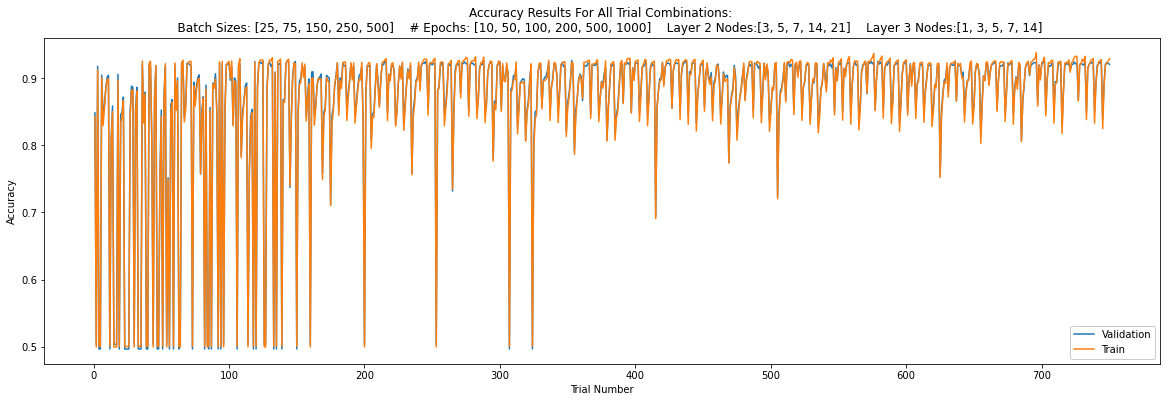

In [26]:
RunBigTest=True


if RunBigTest:
 
    #Define Hyperparameters to transfer 
    batch_size_list=[25,75,150,250,500]
    epoch_list=[10,50,100,200,500,1000]
    node2_size_list=[3,5,7,len(X_train.columns),21]
    node3_size_list = [1,3,5,7,len(X_train.columns)]
    
    #activation_function = ['tanh']
    activation_function = 'sigmoid'
    
else: #LITTLE TEST

    #Define Hyperparameters to transfer 
    batch_size_list=[250,500]
    epoch_list=[10,50]
    node2_size_list=[7,len(X_train.columns)]
    node3_size_list = [1,7]
    
    #activation_function = ['tanh']
    activation_function = 'sigmoid'
    
Start = datetime.now()    
# Calling the function
ResultsData=FunctionFindBestParams(X_train, X_val, y_val, X_test, y_test, y_train, batch_size_list,epoch_list,node2_size_list,node3_size_list,activation_function)

Stop = datetime.now()
print("\n\nTotal Run Time: ", Stop-Start)

# Visualizing the results as One visualization
plt.figure(figsize=(20,6))
plt.plot(ResultsData.TrialNumber, ResultsData.Validation_Accuracy, label = "Validation")
plt.plot(ResultsData.TrialNumber, ResultsData.Train_Accuracy, label = "Train")
#plt.plot(ResultsData.TrialNumber, ResultsData.Test_Accuracy, label = "Test")

# Set Axis Labels
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")

#Designate lefend location
plt.legend(loc='lower right', framealpha =1)

#Create Title
TitleString = str("Accuracy Results For All Trial Combinations: "+ '\n'
          "    Batch Sizes: "+ str(batch_size_list)+
          "    # Epochs: "+ str(epoch_list)+
          "    Layer 2 Nodes:"+ str(node2_size_list)+
          "    Layer 3 Nodes:"+ str(node3_size_list) )
plt.title(TitleString)



### Same plot as above but may be better suited for large test runs

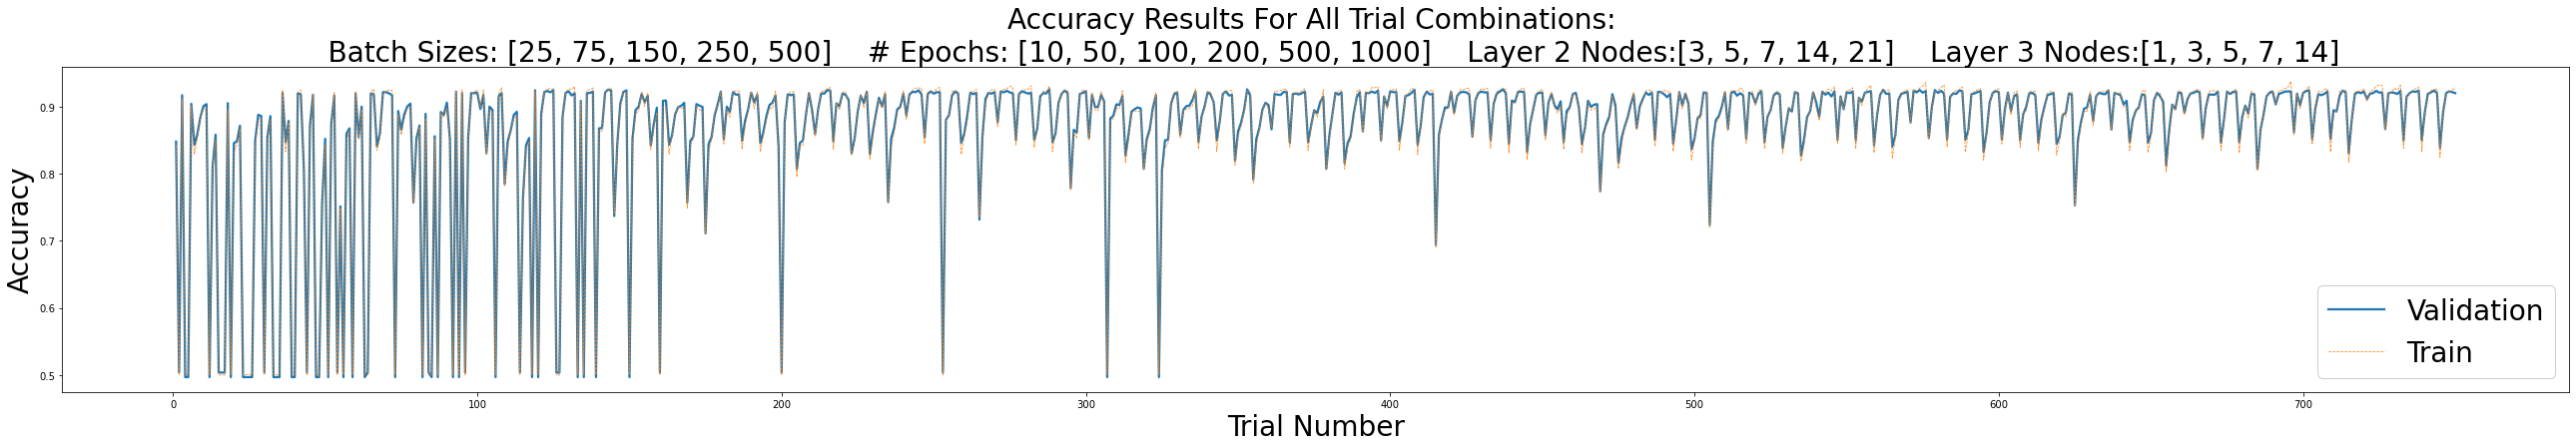

In [27]:
# Visualizing the results as One visualization
plt.figure(figsize=(45,6))
plt.plot(ResultsData.TrialNumber, ResultsData.Validation_Accuracy, label = "Validation", linewidth = 2.25)
plt.plot(ResultsData.TrialNumber, ResultsData.Train_Accuracy, label = "Train",ls='--', linewidth = .75)
#plt.plot(ResultsData.TrialNumber, ResultsData.Test_Accuracy, label = "Test")

# Set Axis Labels
plt.xlabel("Trial Number", fontsize =28)
plt.ylabel("Accuracy", fontsize = 28)

#Designate lefend location
plt.legend(loc='lower right', framealpha =1, fontsize =28)

#Create Title
TitleString = str("Accuracy Results For All Trial Combinations: "+ '\n'
          "    Batch Sizes: "+ str(batch_size_list)+
          "    # Epochs: "+ str(epoch_list)+
          "    Layer 2 Nodes:"+ str(node2_size_list)+
          "    Layer 3 Nodes:"+ str(node3_size_list) )
plt.title(TitleString, fontsize =28)

plt.show()

### Create grouped plots to show how accurate the training and validation was

Total Rows: 5
Unique Rows:  [0 1 2 3 4]
Total Columns: 5
Unique Columns:  [0 1 2 3 4]


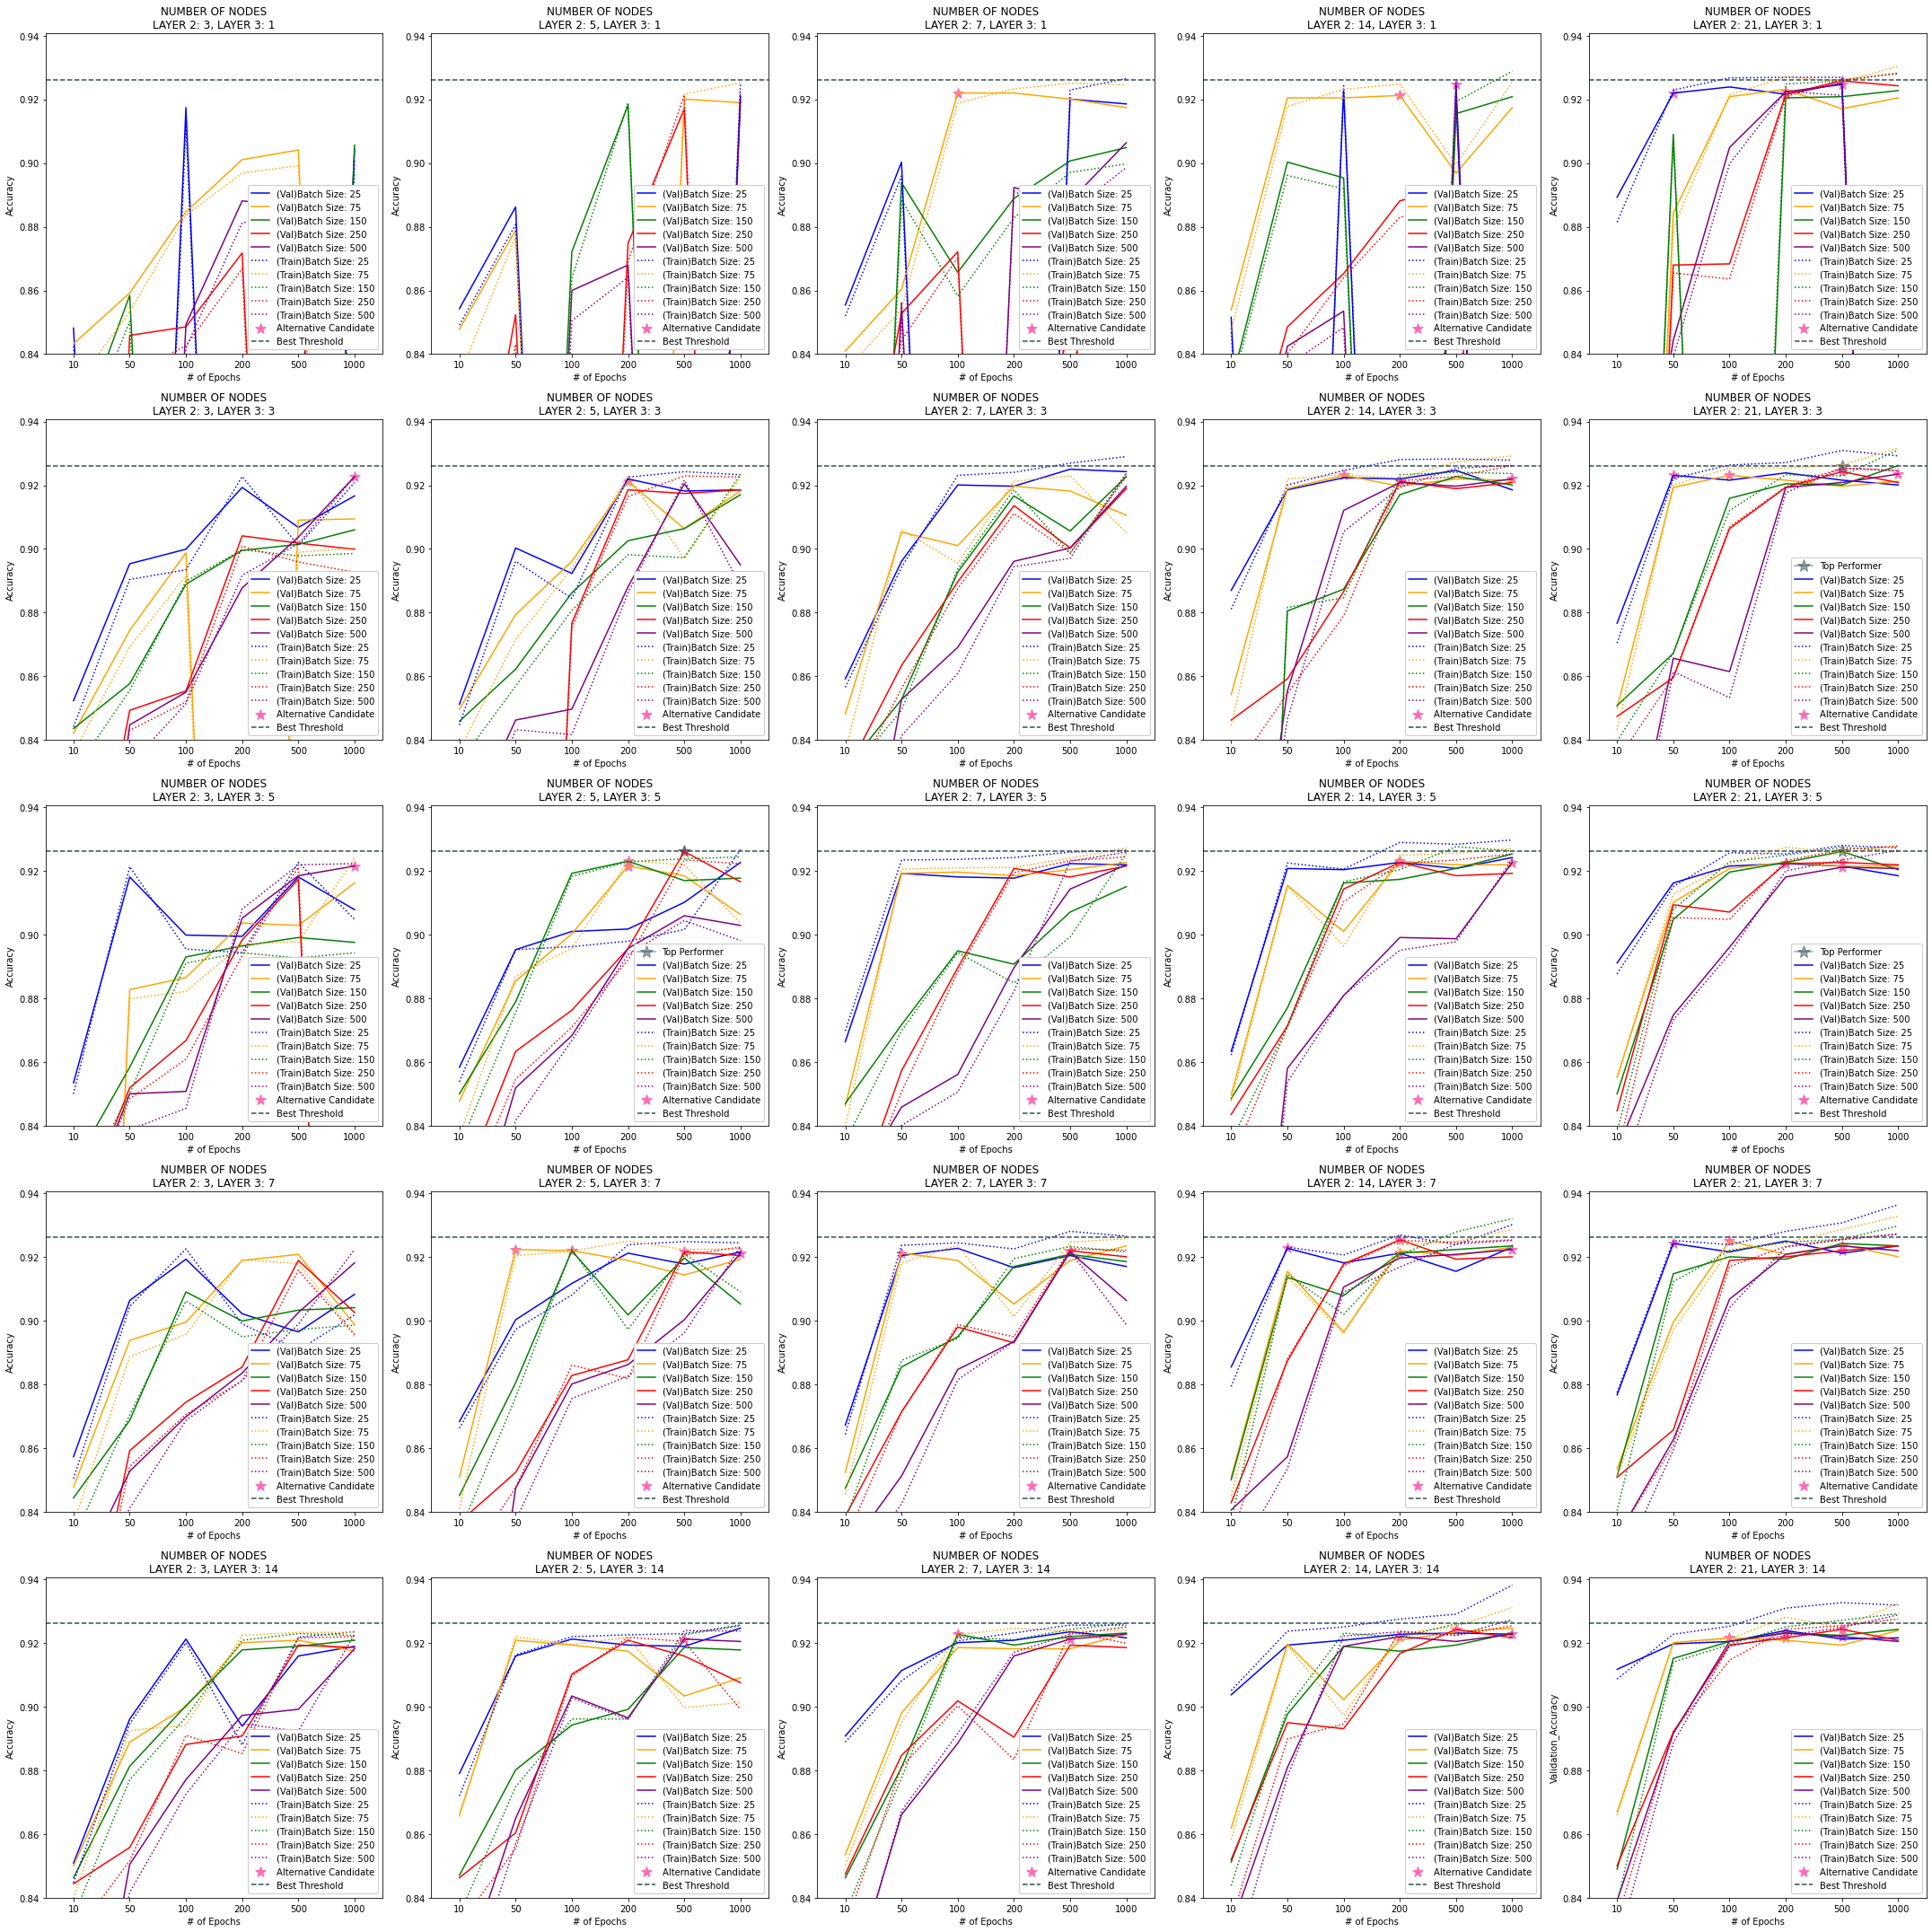

()

In [28]:
#Visualizing the results as SubPlots

AlternativeTolerance =.005
TimeTolerance = 10

PlotGroups(ResultsData, AlternativeTolerance, TimeTolerance )


# Time Cost Visualizations

In [29]:
###############################################

def PlotTimeCostGroups(ResultsData, AlternativeTolerance=.005, TimeTolerance=10 ):


    generator = len(ResultsData.Node2_Size.unique())
    linespotgenerator = len(ResultsData.Epochs.unique())
    linegenerator = len(ResultsData.Batch_Size.unique())
    maxAccuracy = max(ResultsData.Validation_Accuracy)


    ResultsData['Group'] = pd.DataFrame((ResultsData.TrialNumber-1)//(len(ResultsData.Epochs.unique())*len(ResultsData.Batch_Size.unique())))
    ResultsData['SubPlotRow'] = pd.DataFrame(ResultsData.Group//generator)
    ResultsData['SubPlotColumn'] = pd.DataFrame(ResultsData.Group%generator)
    ResultsData['LineNumber'] = ((ResultsData.TrialNumber - 1) // linespotgenerator ) % linegenerator +1
    ResultsData['LineSpot'] = (ResultsData.TrialNumber-1) % linespotgenerator +1
    ResultsData['Alternative'] = (ResultsData.Validation_Accuracy > (maxAccuracy-AlternativeTolerance)) & (ResultsData.Time_Cost < TimeTolerance)


    numrows= len(ResultsData.SubPlotRow.unique())
    numcolumns= len(ResultsData.SubPlotColumn.unique())
    numlines =  len(ResultsData.LineNumber.unique())
    numspots =  len(ResultsData.LineSpot.unique())
    
    #display(ResultsData)
    #print("Total Rows:", numrows)
    #print("Unique Rows: ",ResultsData.SubPlotRow.unique())
    #print("Total Columns:", numcolumns)
    #print("Unique Columns: ",ResultsData.SubPlotColumn.unique())
    
    from IPython.core.display import display, HTML
    display(HTML("<style>div.output_scroll { height: 45em; }</style>"))

    TopScore = ResultsData.sort_values(by='Validation_Accuracy', ascending=False).head(1)
    print("The Best Performer Was:")
    display(TopScore)

    print("Time Friendly Alternatives of Accuracy within ",AlternativeTolerance," and less than ",TimeTolerance," seconds to train")
    display(ResultsData[ResultsData.Alternative==True])

    #define tick labels to transform plot into grid
    XTickLabels = [0]
    
    for i in range (0,len(ResultsData.Epochs.unique())):
        XTickLabels.append( ResultsData.Epochs.unique()[i])


    # making subplots
    fig, ax = plt.subplots(numrows,numcolumns, figsize=(5*numrows,5*numcolumns))

    for row in range(0,numrows):
        for column in range(0,numcolumns):
            GroupLines = ResultsData.loc[(ResultsData['SubPlotRow']==row)&(ResultsData['SubPlotColumn']==column)]
            ##print("SanityCheck: Number of observations in GroupLines:", GroupLines.shape[0])
            #display(GroupLines)

            #Indicate winning parameter            
            if max(GroupLines.Validation_Accuracy)==max(TopScore.Validation_Accuracy) : 
                ax[row, column].plot(TopScore.LineSpot,TopScore.Time_Cost,
                                     marker="*",color='black',markersize=15, alpha=.5,
                                     label = "Top Performer")
            for line in range(1,numlines+1):
                ##print("Sanity Check: Should Print out 4 points")
                ThisLine = GroupLines.loc[GroupLines.LineNumber==line]
                ##display(ThisLine)
                ax[row,column].plot(ThisLine.LineSpot, ThisLine.Time_Cost,
                                    label = (" Batch Size: " + str(ThisLine.Batch_Size.iloc[0])) )

            #Show alternatives
            #display(GroupLines[GroupLines.Alternative == True])
            ax[row,column].scatter(GroupLines[GroupLines.Alternative == True].LineSpot,
                                GroupLines[GroupLines.Alternative == True].Time_Cost,
                                marker = "*", s=145, color = 'green',
                                label = ("Alternative Candidate"))



            #subplot Title
            ax[row,column].title.set_text("NUMBER OF NODES\n" +
                                          "LAYER 2: " + str(GroupLines.Node2_Size.iloc[0])+ ", "+
                                          "LAYER 3: " + str(GroupLines.Node3_Size.iloc[0]))

            #subplot Xaxis & Yaxis Title
            ax[row,column].set_xlabel("# of Epochs")
            ax[row,column].set_ylabel("Seconds")

            #subplot Xaxis Width - Number of Epochs
            ax[row,column].set_xlim(.5, numspots + .5) #**

            #subplot Xaxis Tick Labels - Show each Epoch but spread out equally
            ax[row,column].set_xticklabels(XTickLabels)

            #subplot Xaxis Tick Marks - Should see a tickmark for each epoch(the plus 2 creates 2 off plot tickmarks, frames epochs)
            ax[row,column].locator_params(axis='x', nbins=len(GroupLines.Epochs.unique())+1) ##*

            #subplot Yaxis Height - Accuracy Range
            ax[row,column].set_ylim( 0, max(ResultsData.Time_Cost)+5)
             #if min(ResultsData.Accuracy) <.85:
#                ax[row,column].set_ylim( .875, max(ResultsData.Accuracy)+.0025)
#            else:ax[row,column].set_ylim(min(ResultsData.Accuracy)-.0025, max(ResultsData.Accuracy)+.0025)    


            #subplot Target - show how close to the best value subplot is
            #l1=ax[row,column].axhline(ResultsData.Time_Cost[ResultsData["Validation_Accuracy"] == max(ResultsData.Validation_Accuracy)].iloc[0],
            #                          color='black',ls='--')
            l1=ax[row,column].axhline(TopScore.Time_Cost.iloc[0], color='black',ls='--')
            TopScore
            l1.set_label('Best Threshold')
            
            #Locate Legend on all subplots and set transparency
            ax[row,column].legend(loc='upper left', framealpha =1)





    # set the spacing between subplots
    fig.tight_layout()
    #Add axis labels to all subplots
    #plt.xlabel("# of Epochs")
    #plt.ylabel("Accuracy")
    
    plt.show()
    
    return()

### Create grouped plots showing how long each batch size took to train 

The Best Performer Was:


TrialNumber                  Parameters                  Train_Accuracy Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size Time_Cost Test_Accuracy Group SubPlotRow SubPlotColumn LineNumber LineSpot  Alternative
0      437     batch_size150-epoch500Node2Size21Node3Size5      0.928             0.926         500      150        21          5       13.447       0.917      14       2            4           3         5        False

Time Friendly Alternatives of Accuracy within  0.005  and less than  10  seconds to train


TrialNumber                   Parameters                  Train_Accuracy Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size Time_Cost Test_Accuracy Group SubPlotRow SubPlotColumn LineNumber LineSpot  Alternative
0        69        batch_size75-epoch100Node2Size7Node3Size1      0.919             0.922         100       75         7          1        5.572       0.913       2       0            2           2         3        True    
0       100       batch_size75-epoch200Node2Size14Node3Size1      0.925             0.921         200       75        14          1        8.469        0.91       3       0            3           2         4        True    
0       119      batch_size500-epoch500Node2Size14Node3Size1      0.923             0.925         500      500        14          1        4.206       0.911       3       0            3           5         5        True    
0       122        batch_size25-epoch50Node2Size21Node3Size1      0.923             0.922          50       25        21          1        7.382       0.916       4       0            4           1         2        True    
0       142      batch_size250-epoch200Node2Size21Node3Size1      0.921             0.922         200      250        21          1        3.726       0.913       4       0            4           4         4        True    
..         ...                                           ...            ...                 ...    ...        ...        ...        ...       ...           ...   ...        ...           ...        ...      ...          ...
0       736     batch_size150-epoch200Node2Size21Node3Size14      0.925             0.923         200      150        21         14        5.737       0.913      24       4            4           3         4        True    
0       742     batch_size250-epoch200Node2Size21Node3Size14      0.924             0.922         200      250        21         14        4.162        0.91      24       4            4           4         4        True    
0       743     batch_size250-epoch500Node2Size21Node3Size14      0.925             0.924         500      250        21         14        8.797       0.911      24       4            4           4         5        True    
0       748     batch_size500-epoch200Node2Size21Node3Size14      0.922             0.923         200      500        21         14        2.741       0.911      24       4            4           5         4        True    
0       749     batch_size500-epoch500Node2Size21Node3Size14      0.925             0.922         500      500        21         14        5.726       0.911      24       4            4           5         5        True    

[56 rows x 16 columns]

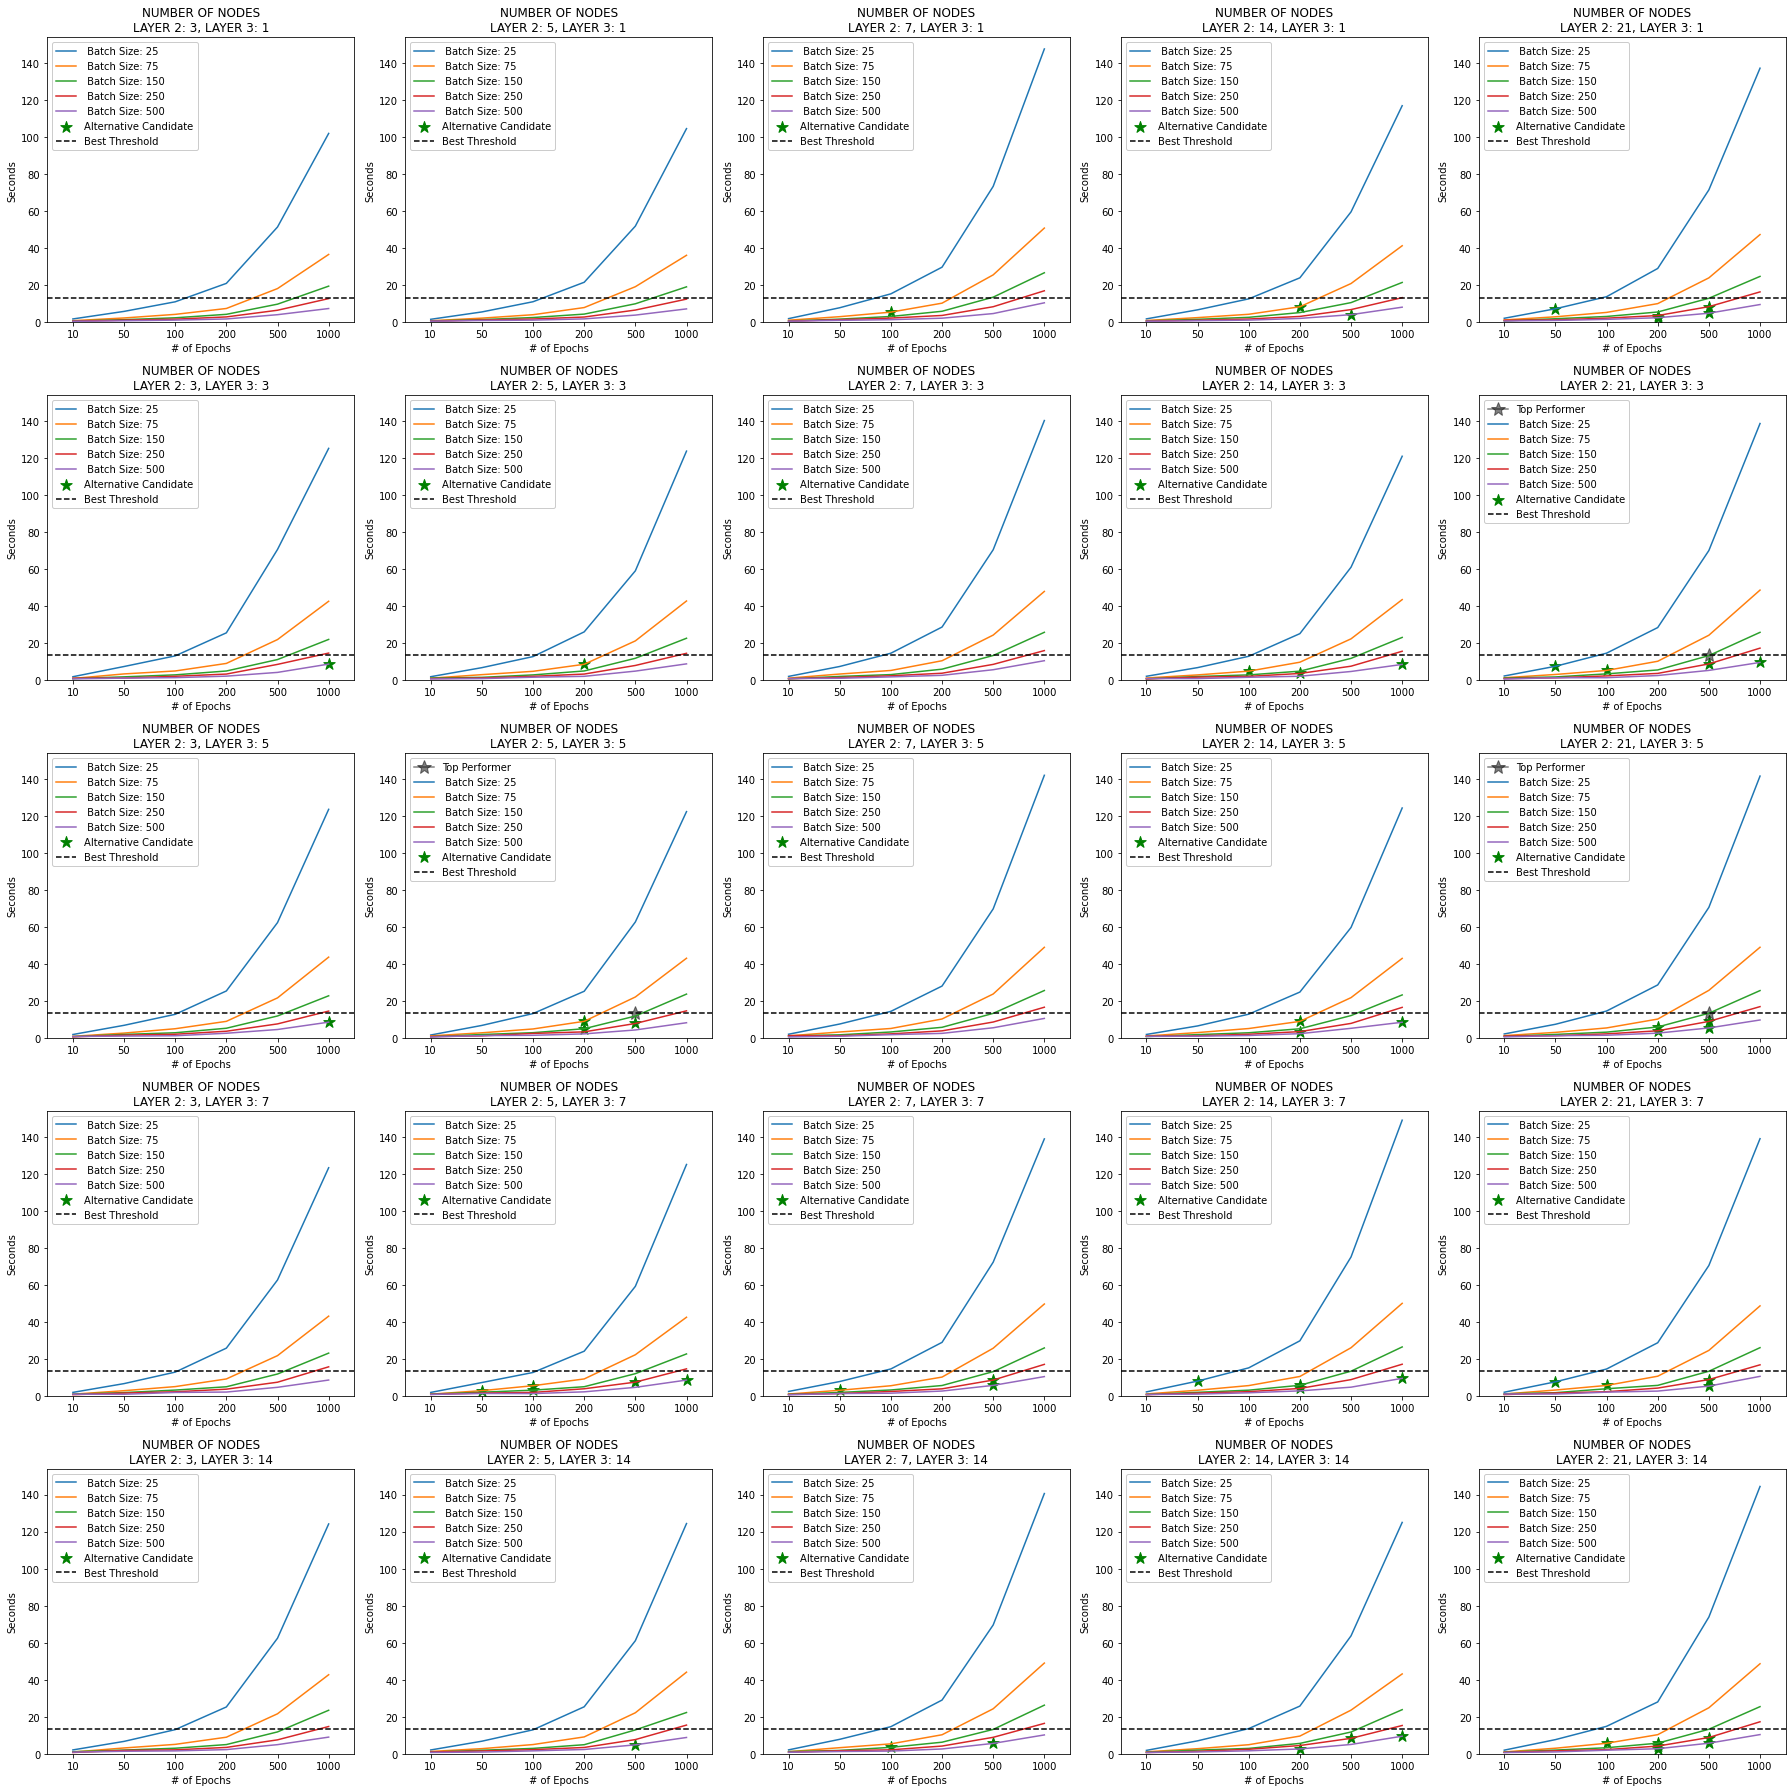

()

In [30]:
PlotTimeCostGroups(ResultsData, AlternativeTolerance, TimeTolerance )

# Ensemble of Alternatives

### Ensemble Function to create ensemble learners in an effort to improve accuracy

In [31]:
def CreateEnsembleClassifier(Alternatives, X_train, y_train, X_val, y_val, X_test, y_test):
    
    #Create Copies of original data for manipulation
    Alternatives=  Alternatives.copy(deep=True)
    y_train2= pd.DataFrame(y_train.copy(deep=True))
    y_val2 = pd.DataFrame(y_val.copy(deep=True))
    y_test2= pd.DataFrame(y_test.copy(deep=True))
    
    #Modify Predictions to include Ensemble
    for i in range (0, Alternatives.shape[0]):
        ColumnName=("Alternative"+ str(i))
        y_test2.insert(loc = i +1, column = ColumnName, value  = 0)
        y_val2.insert(loc = i +1, column = ColumnName, value  = 0)
        y_train2.insert(loc = i +1, column = ColumnName, value  = 0)
        
    y_test2.insert(loc = i+ 2, column = "EnsembleAverage", value= 0 )
    y_test2.insert(loc = i+ 3, column = "EnsemblePrediction", value= 0 )
    y_test2.insert(loc = i+ 4, column = "CorrectPrediction", value= 0 )
    y_val2.insert(loc = i+ 2, column = "EnsembleAverage", value= 0 )
    y_val2.insert(loc = i+ 3, column = "EnsemblePrediction", value= 0 )
    y_val2.insert(loc = i+ 4, column = "CorrectPrediction", value= 0 )
    y_train2.insert(loc = i+ 2, column = "EnsembleAverage", value= 0 )
    y_train2.insert(loc = i+ 3, column = "EnsemblePrediction", value= 0 )
    y_train2.insert(loc = i+ 4, column = "CorrectPrediction", value= 0 )
    
    
    
    
    ##*EnsembleANN_Model=[]
    ##*Accuracy=[]
    
    #**Should be able to eliminate this chunk
    #Create a storage dataframe for predicted test values
    #ColumnNames=[]
    #for i in range (0, Alternatives.shape[0]):
    #    ColumnNames.append("Alternative"+ str(i))
    #PredictedOutcomes=pd.DataFrame(columns=[ColumnNames])
    #y_test.append(ColumnNames)
    #**

    
    for ClassifierNumber in range(0,Alternatives.shape[0]):
        #identify Current Alternative to allow for updating modified prediction dataframes
        CurrentAlternative = "Alternative" + str(ClassifierNumber)
    
        stopwatchstart= time.time()
        
        # ReCreating the classifier ANN model
        classifier = Sequential()
        classifier.add(Dense(units=Alternatives.Node2_Size.iloc[ClassifierNumber], input_dim=len(X_train.columns), kernel_initializer='uniform', activation='relu'))
        classifier.add(Dense(units=Alternatives.Node3_Size.iloc[ClassifierNumber], kernel_initializer='uniform', activation='relu'))
        classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
        classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        #**Should be able to eliminate this chunk
        ##*EnsembleANN_Model=classifier.fit(X_train,y_train, batch_size=int(Alternatives.Batch_Size.iloc[ClassifierNumber]) , 
        ##*                                        epochs=int(Alternatives.Epochs.iloc[ClassifierNumber]), 
        ##*                                        verbose=0)#, 
        ##*                                        #validation_data = (X_test, y_test)))
        #**
        
        classifier.fit(X_train,y_train, batch_size=int(Alternatives.Batch_Size.iloc[ClassifierNumber]) , 
                                                epochs=int(Alternatives.Epochs.iloc[ClassifierNumber]), 
                                                verbose=0)
        
        
        #Evaluate Training Data
        TrainScore = classifier.evaluate(X_train, y_train2.MedianOrHigher, verbose = 0) 
        #*print('Train loss:', TrainScore[0]) 
        #*print('Train accuracy:', TrainScore[1])
        
        #Evaluate Validation Data
        ValScore = classifier.evaluate(X_val, y_val2.MedianOrHigher, verbose = 0) 
        #*print('Train loss:', ValScore[0]) 
        #*print('Train accuracy:', ValScore[1])
        
        #Evaluate Testing Data
        TestScore = classifier.evaluate(X_test, y_test2.MedianOrHigher, verbose = 0) 
        #*print('Test loss:', TestScore[0]) 
        #*print('Test accuracy:', TestScore[1])
        
        #Add Prediction Outcome to Modified Prediction Dataframes
        y_train2[CurrentAlternative] = classifier.predict(X_train)
        y_val2[CurrentAlternative] = classifier.predict(X_val)
        y_test2[CurrentAlternative] = classifier.predict(X_test)
        
        
        
        
        
        #B
        
        #PredictedOutcomes.loc[:,CurrentAlternative]=(classifier.predict(X_test))
                                 
        stopwatchstop = time.time()
        processtime = stopwatchstop - stopwatchstart

        # Fetching the accuracy of the training
       
        ##*Accuracy.append(EnsembleANN_Model.history['accuracy'][-1])
        
        #print(Accuracy)

        # printing the results of the current iteration
        #*print("Alternative ", ClassifierNumber, ' Parameters:',
        #*      'batch_size:', Alternatives.Batch_Size.iloc[ClassifierNumber],'-', 
        #*      'epochs:',Alternatives.Epochs.iloc[ClassifierNumber], 
        #*      'node2_size:',Alternatives.Node2_Size.iloc[ClassifierNumber], 
        #*      'node3_size:',Alternatives.Node3_Size.iloc[ClassifierNumber], 
        #*      'Train Accuracy:', TrainScore[1],
        #*      'Validation Accuracy:', ValScore[1],
        #*      'Test Accuracy:', TestScore[1])

   
    #Update Ensemble Values in Modified Prediction Dataframes
    # get average of ensembles --- Make sure there are an odd # of classifiers, drop the first alternative if not
    if (Alternatives.shape[0]%2 >0):
        y_train2.EnsembleAverage = (y_train2.sum(axis = 1)-y_train2.MedianOrHigher)/(Alternatives.shape[0])
        y_val2.EnsembleAverage = (y_val2.sum(axis = 1)-y_val2.MedianOrHigher)/(Alternatives.shape[0])
        y_test2.EnsembleAverage = (y_test2.sum(axis = 1)-y_test2.MedianOrHigher)/(Alternatives.shape[0])
    else:
        y_train2.EnsembleAverage = (y_train2.sum(axis = 1) - y_train2.MedianOrHigher - y_train2.Alternative0)/(Alternatives.shape[0]-1)
        y_val2.EnsembleAverage = (y_val2.sum(axis = 1) - y_val2.MedianOrHigher - y_val2.Alternative0)/(Alternatives.shape[0]-1)
        y_test2.EnsembleAverage = (y_test2.sum(axis = 1) - y_test2.MedianOrHigher - y_test2.Alternative0)/(Alternatives.shape[0]-1)            
    # make ensemble prediction
    y_train2.EnsemblePrediction = (y_train2.EnsembleAverage>=.5)*1
    y_val2.EnsemblePrediction = (y_val2.EnsembleAverage>=.5)*1
    y_test2.EnsemblePrediction = (y_test2.EnsembleAverage>=.5)*1
    #Indicate Correct Prediction
    y_train2.CorrectPrediction = (y_train2.EnsemblePrediction==y_train2.MedianOrHigher)
    y_val2.CorrectPrediction = (y_val2.EnsemblePrediction==y_val2.MedianOrHigher) 
    y_test2.CorrectPrediction = (y_test2.EnsemblePrediction==y_test2.MedianOrHigher)
    
    #DISPLAY RESULTS FROM ENSEMBLE METHODS
    #display(y_train2)
    print("Train Ensemble Accuracy:", y_train2.CorrectPrediction.sum(axis=0)/y_train2.shape[0])
    print("Train Confuision Matrix:\n",confusion_matrix(y_train2.MedianOrHigher, y_train2.EnsemblePrediction))
    
    #display(y_val2)
    print("Validation Ensemble Accuracy:", y_val2.CorrectPrediction.sum(axis=0)/y_val2.shape[0])
    print("Validation Confuision Matrix:\n",confusion_matrix(y_val2.MedianOrHigher, y_val2.EnsemblePrediction))
    
    #display(y_test2)
    print("Test Ensemble Accuracy:", y_test2.CorrectPrediction.sum(axis=0)/y_test2.shape[0])
    print("Test Confuision Matrix:\n",confusion_matrix(y_test2.MedianOrHigher, y_test2.EnsemblePrediction))
    
    return()

### Use Previously Identified Alternatives to create ensemble 
Drop the last alternative if ensemble count is even

In [32]:
#Pull Alternatives for Ensemble
Alternatives = ResultsData[ResultsData.Alternative==True].copy()
#display(Alternatives)

#Reduce Alternatives dataframe to relevant parameters
Alternatives = Alternatives[["Epochs", "Batch_Size", "Node2_Size", "Node3_Size"]]

print("We will build an ensemble out of these hyperparameters:")
Alternatives


We will build an ensemble out of these hyperparameters:


Epochs Batch_Size Node2_Size Node3_Size
0    100       75         7          1    
0    200       75        14          1    
0    500      500        14          1    
0     50       25        21          1    
0    200      250        21          1    
..    ...        ...        ...        ...
0    200      150        21         14    
0    200      250        21         14    
0    500      250        21         14    
0    200      500        21         14    
0    500      500        21         14    

[56 rows x 4 columns]

In [33]:
CreateEnsembleClassifier(Alternatives, X_train, y_train, X_val, y_val, X_test, y_test)

28/28 [==============================] - 0s 849us/step


28/28 [==============================] - 0s 705us/step
Train Ensemble Accuracy: 0.9235159817351598
Train Confuision Matrix:
 [[2416  210]
 [ 192 2438]]
Validation Ensemble Accuracy: 0.9227549467275494
Validation Confuision Matrix:
 [[1227   96]
 [ 107 1198]]
Test Ensemble Accuracy: 0.9143835616438356
Test Confuision Matrix:
 [[386  39]
 [ 36 415]]


()

### ReRun Ensemble approach by picking poor learners

In [34]:
PoorLearners = ResultsData[ResultsData.Validation_Accuracy>.60 ].copy()
PoorLearners = PoorLearners[PoorLearners.Validation_Accuracy<.80]
CreateEnsembleClassifier(PoorLearners, X_train, y_train, X_val, y_val, X_test, y_test)

28/28 [==============================] - 0s 961us/step
Train Ensemble Accuracy: 0.8177321156773212
Train Confuision Matrix:
 [[2292  334]
 [ 624 2006]]
Validation Ensemble Accuracy: 0.821537290715373
Validation Confuision Matrix:
 [[1168  155]
 [ 314  991]]
Test Ensemble Accuracy: 0.7990867579908676
Test Confuision Matrix:
 [[376  49]
 [127 324]]


()

### This next window is meant to show how costly a batch size of 25 can be when you run a big test
If you run a model without a batch size of 25, then it will show 0%

In [35]:
#ResultsData[[ResultsData.Batch_Size==25]].Time_Cost.sum()
print( "Batch Size 25 Time Cost : ", "%.0f"%ResultsData[ResultsData.Batch_Size==25].Time_Cost.sum() , "seconds" )
print( "Total Time Cost         :  " "%.0f"%ResultsData.Time_Cost.sum() , "seconds" )
print( "Batch Size 25 Time Cost As Percentage of Total Time Cost: " ,
      "%.4f"%(100 * ResultsData[ResultsData.Batch_Size==25].Time_Cost.sum()/ResultsData.Time_Cost.sum()) , "%" )

Batch Size 25 Time Cost :  6115 seconds
Total Time Cost         :  10777 seconds
Batch Size 25 Time Cost As Percentage of Total Time Cost:  56.7401 %


### Save data to a file by setting conditions to True

In [36]:
NewFileCreate = False
AppendExistingFile = False

if NewFileCreate == True:
    ResultsData.to_csv(r'C:\Users\robli\OneDrive - The University of Texas at Dallas\MBA\5th Semester\6341 Applied Machine Learning\Assignments\Assignment 3\Results Ouput\AllData.csv', 
                       index = False)
if AppendExistingFile==True:
        ResultsData.to_csv(r'C:\Users\robli\OneDrive - The University of Texas at Dallas\MBA\5th Semester\6341 Applied Machine Learning\Assignments\Assignment 3\Results Ouput\AllData.csv', 
                       index = False, mode = 'a', header=False)
    

# Test Tanh activation function

In [37]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParams2(X_train, X_val, y_val, X_test, y_test, y_train, batch_size_list,epoch_list,node2_size_list,node3_size_list, activation_function):
    print(y_val)
    
    print(activation_function)
    
    y_train2= pd.DataFrame(y_train.copy(deep=True))
    y_val2 = pd.DataFrame(y_val.copy(deep=True))
    y_test2= pd.DataFrame(y_test.copy(deep=True))
    
    TrialNumber=0
    
    #SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters'])
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Train_Accuracy', 'Validation_Accuracy' ,
                                            'Epochs', 'Batch_Size',  'Node2_Size',  'Node3_Size','Time_Cost', 
                                            'Test_Accuracy']) 
    
    for node3_trial in node3_size_list:
        for node2_trial in node2_size_list:
            for batch_size_trial in batch_size_list:
                for epochs_trial in epoch_list:
                    TrialNumber+=1
                    stopwatchstart= time.time()

                    # Creating the classifier ANN model
                    classifier = Sequential()
                    classifier.add(Dense(units=node2_trial, input_dim=len(X_train.columns), kernel_initializer='uniform', activation='relu'))
                    classifier.add(Dense(units=node3_trial, kernel_initializer='uniform', activation='relu'))
                    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='tanh'))
                    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


                    #**survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
                    
                    classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
                    
                    #Evaluate Performance
                    TrainScore = classifier.evaluate(X_train, y_train2.MedianOrHigher, verbose = 0)[1] 
                    ValScore = classifier.evaluate(X_val, y_val2.MedianOrHigher, verbose = 0)[1] 
                    TestScore = classifier.evaluate(X_test, y_test2.MedianOrHigher, verbose = 0)[1]
                    
                    
                    stopwatchstop = time.time()
                    processtime = stopwatchstop - stopwatchstart
                    
                    # Fetching the accuracy of the training
                    #**Accuracy = survivalANN_Model.history['accuracy'][-1]

                    # printing the results of the current iteration
                    print(TrialNumber, 'Parameters:','Batch:', batch_size_trial,'-', 
                          'Epochs:',epochs_trial, 'Layer 2:',node2_trial, 'Layer 3:',node3_trial, 'Train Accuracy:', "%.5f"%TrainScore, 'Validation Accuracy:', "%.5f"%ValScore)

                    SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                                    'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial) +'Node2Size'+str(node2_trial)+'Node3Size'+str(node3_trial), 
                                    TrainScore, ValScore, epochs_trial, batch_size_trial, node2_trial, node3_trial, processtime, TestScore ]],
                                    columns=['TrialNumber', 'Parameters', 'Train_Accuracy', 'Validation_Accuracy', 'Epochs', 'Batch_Size',  'Node2_Size',  'Node3_Size','Time_Cost', 'Test_Accuracy' ] ))
    return(SearchResultsData)

### Now run with activation function = 'tanh'

1 Parameters: Batch: 75 - Epochs: 200 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.90126 Validation Accuracy: 0.90715
2 Parameters: Batch: 75 - Epochs: 500 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.49962 Validation Accuracy: 0.50342
3 Parameters: Batch: 75 - Epochs: 1000 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.92447 Validation Accuracy: 0.92237
4 Parameters: Batch: 150 - Epochs: 200 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.88584 Validation Accuracy: 0.89041
5 Parameters: Batch: 150 - Epochs: 500 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.49962 Validation Accuracy: 0.50342
6 Parameters: Batch: 150 - Epochs: 1000 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.92542 Validation Accuracy: 0.91857
7 Parameters: Batch: 250 - Epochs: 200 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.90963 Validation Accuracy: 0.91362
8 Parameters: Batch: 250 - Epochs: 500 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.91191 Validation Accuracy: 0.91438
9 Parameters: Batch: 250 - Epochs: 1000 Layer 2: 7 Layer 3: 5 Train Accuracy: 0.92428 Val

72 Parameters: Batch: 500 - Epochs: 1000 Layer 2: 21 Layer 3: 7 Train Accuracy: 0.92161 Validation Accuracy: 0.91971
73 Parameters: Batch: 75 - Epochs: 200 Layer 2: 7 Layer 3: 14 Train Accuracy: 0.92085 Validation Accuracy: 0.91857
74 Parameters: Batch: 75 - Epochs: 500 Layer 2: 7 Layer 3: 14 Train Accuracy: 0.91914 Validation Accuracy: 0.91514
75 Parameters: Batch: 75 - Epochs: 1000 Layer 2: 7 Layer 3: 14 Train Accuracy: 0.92656 Validation Accuracy: 0.91895
76 Parameters: Batch: 150 - Epochs: 200 Layer 2: 7 Layer 3: 14 Train Accuracy: 0.89498 Validation Accuracy: 0.90068
77 Parameters: Batch: 150 - Epochs: 500 Layer 2: 7 Layer 3: 14 Train Accuracy: 0.49962 Validation Accuracy: 0.50342
78 Parameters: Batch: 150 - Epochs: 1000 Layer 2: 7 Layer 3: 14 Train Accuracy: 0.92599 Validation Accuracy: 0.92123
79 Parameters: Batch: 250 - Epochs: 200 Layer 2: 7 Layer 3: 14 Train Accuracy: 0.89155 Validation Accuracy: 0.89536
80 Parameters: Batch: 250 - Epochs: 500 Layer 2: 7 Layer 3: 14 Train Acc

Text(0.5, 1.0, 'Accuracy Results For All Trial Combinations: \n    Batch Sizes: [75, 150, 250, 500]    # Epochs: [200, 500, 1000]    Layer 2 Nodes:[7, 14, 21]    Layer 3 Nodes:[5, 7, 14]')

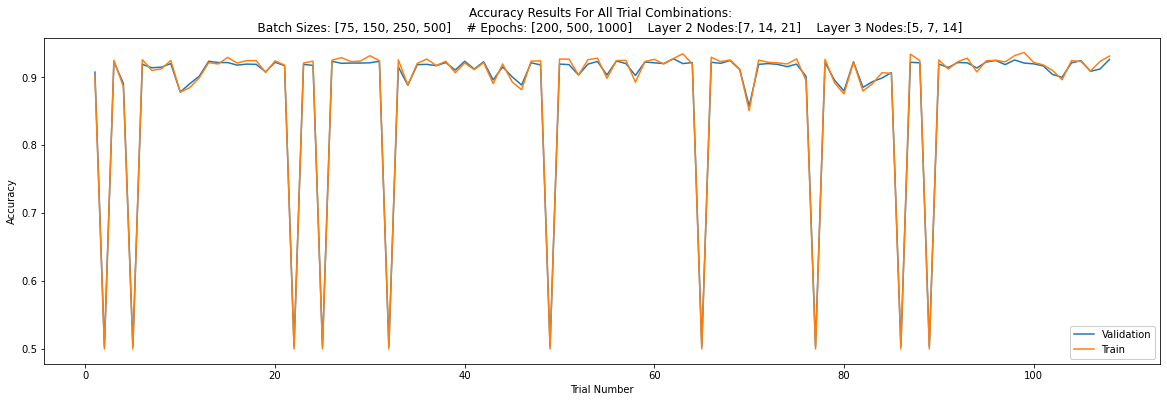

In [38]:
RunBigTest=False


if RunBigTest:
 
    #Define Hyperparameters to transfer 
    batch_size_list=[25,75,150,250,500]
    epoch_list=[10,50,100,200,500,1000]
    node2_size_list=[3,5,7,len(X_train.columns),21]
    node3_size_list = [1,3,5,7,len(X_train.columns)]
    
    activation_function = ['tanh']
    #activation_function = 'sigmoid'
    
else: #LITTLE TEST

    #Define Hyperparameters to transfer 
    batch_size_list=[75,150,250,500]
    epoch_list=[200,500,1000]
    node2_size_list=[7,len(X_train.columns),21]
    node3_size_list = [5,7,len(X_train.columns)]
    
    activation_function = 'tanh'
    #activation_function = 'sigmoid'
    
Start = datetime.now()    
# Calling the function
ResultsDataTanH=FunctionFindBestParams(X_train, X_val, y_val, X_test, y_test, y_train, batch_size_list,epoch_list,node2_size_list,node3_size_list,activation_function)

Stop = datetime.now()
print("\n\nTotal Run Time: ", Stop-Start)

# Visualizing the results as One visualization
plt.figure(figsize=(20,6))
plt.plot(ResultsDataTanH.TrialNumber, ResultsDataTanH.Validation_Accuracy, label = "Validation")
plt.plot(ResultsDataTanH.TrialNumber, ResultsDataTanH.Train_Accuracy, label = "Train")
#plt.plot(ResultsData.TrialNumber, ResultsData.Test_Accuracy, label = "Test")

# Set Axis Labels
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")

#Designate lefend location
plt.legend(loc='lower right', framealpha =1)

#Create Title
TitleString = str("Accuracy Results For All Trial Combinations: "+ '\n'
          "    Batch Sizes: "+ str(batch_size_list)+
          "    # Epochs: "+ str(epoch_list)+
          "    Layer 2 Nodes:"+ str(node2_size_list)+
          "    Layer 3 Nodes:"+ str(node3_size_list) )
plt.title(TitleString)


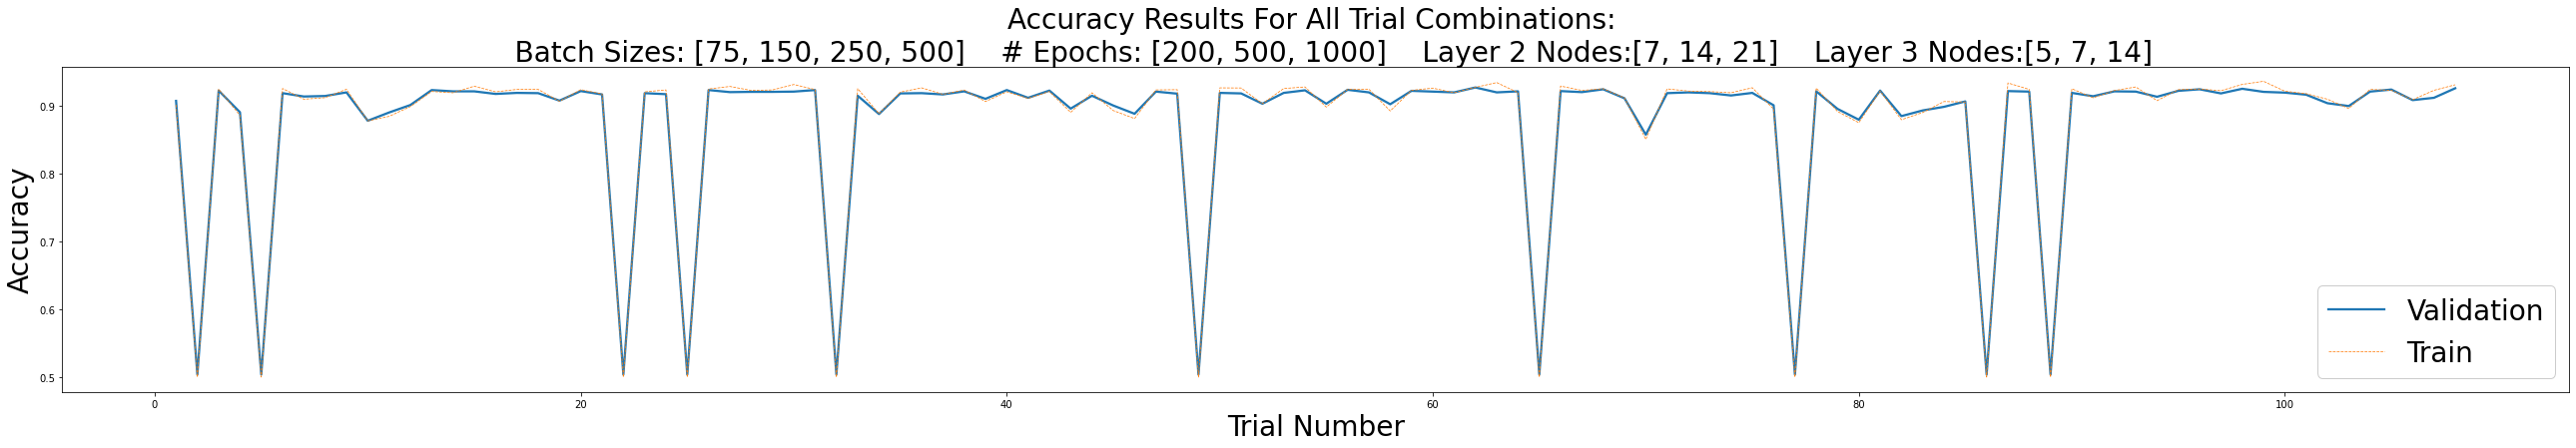

In [39]:
# Visualizing the results as One visualization
plt.figure(figsize=(45,6))
plt.plot(ResultsDataTanH.TrialNumber, ResultsDataTanH.Validation_Accuracy, label = "Validation", linewidth = 2.25)
plt.plot(ResultsDataTanH.TrialNumber, ResultsDataTanH.Train_Accuracy, label = "Train",ls='--', linewidth = .75)
#plt.plot(ResultsData.TrialNumber, ResultsData.Test_Accuracy, label = "Test")

# Set Axis Labels
plt.xlabel("Trial Number", fontsize =28)
plt.ylabel("Accuracy", fontsize = 28)

#Designate lefend location
plt.legend(loc='lower right', framealpha =1, fontsize =28)

#Create Title
TitleString = str("Accuracy Results For All Trial Combinations: "+ '\n'
          "    Batch Sizes: "+ str(batch_size_list)+
          "    # Epochs: "+ str(epoch_list)+
          "    Layer 2 Nodes:"+ str(node2_size_list)+
          "    Layer 3 Nodes:"+ str(node3_size_list) )
plt.title(TitleString, fontsize =28)

plt.show()

Total Rows: 3
Unique Rows:  [0 1 2]
Total Columns: 3
Unique Columns:  [0 1 2]


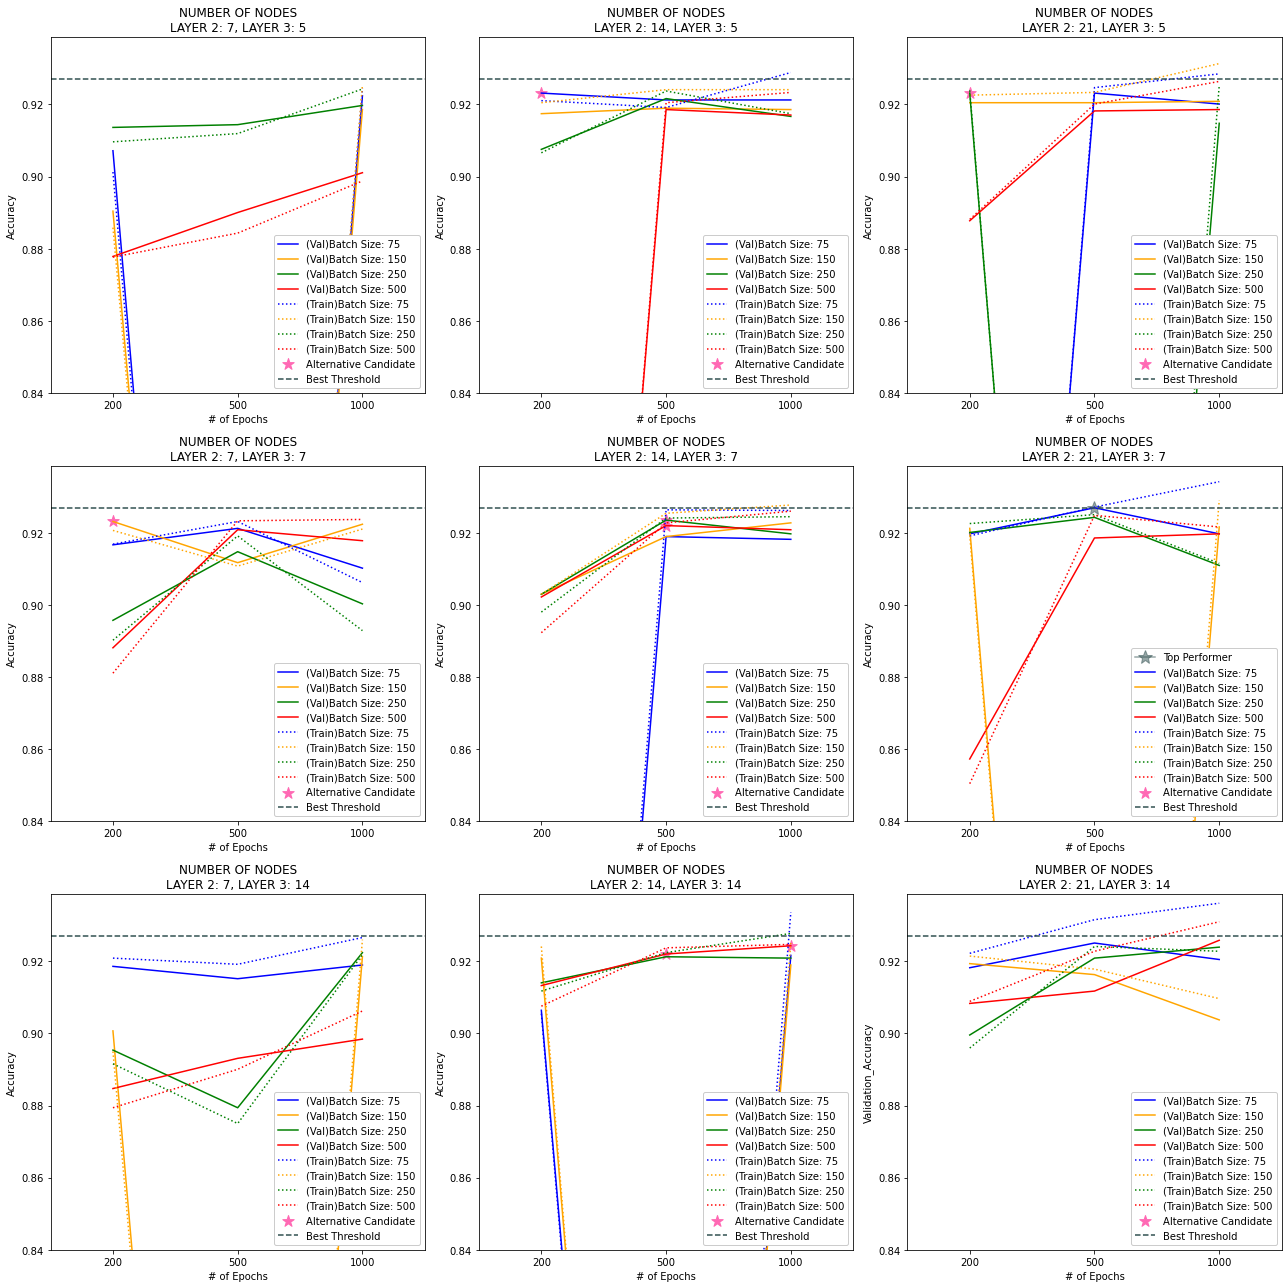

()

In [40]:
#Visualizing the results as SubPlots

AlternativeTolerance =.005
TimeTolerance = 10

PlotGroups(ResultsDataTanH, AlternativeTolerance, TimeTolerance )

The Best Performer Was:


TrialNumber                  Parameters                 Train_Accuracy Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size Time_Cost Test_Accuracy Group SubPlotRow SubPlotColumn LineNumber LineSpot  Alternative
0      62      batch_size75-epoch500Node2Size21Node3Size7      0.927             0.927         500      75         21          7       49.722       0.91        5       1            2           1         2        False

Time Friendly Alternatives of Accuracy within  0.005  and less than  10  seconds to train


TrialNumber                   Parameters                   Train_Accuracy Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size Time_Cost Test_Accuracy Group SubPlotRow SubPlotColumn LineNumber LineSpot  Alternative
0      13         batch_size75-epoch200Node2Size14Node3Size5      0.921             0.923         200       75        14          5        9.728        0.91       1       0            1           1         1        True    
0      31        batch_size250-epoch200Node2Size21Node3Size5      0.924             0.923         200      250        21          5        4.355       0.909       2       0            2           3         1        True    
0      40         batch_size150-epoch200Node2Size7Node3Size7      0.921             0.923         200      150         7          7        5.688        0.91       3       1            0           2         1        True    
0      56        batch_size250-epoch500Node2Size14Node3Size7      0.924             0.924         500      250        14          7        8.991        0.91       4       1            1           3         2        True    
0      59        batch_size500-epoch500Node2Size14Node3Size7      0.923             0.922         500      500        14          7        5.691       0.912       4       1            1           4         2        True    
0      95       batch_size500-epoch500Node2Size14Node3Size14      0.924             0.922         500      500        14         14        5.824       0.913       7       2            1           4         2        True    
0      96      batch_size500-epoch1000Node2Size14Node3Size14      0.925             0.924        1000      500        14         14        9.408       0.914       7       2            1           4         3        True

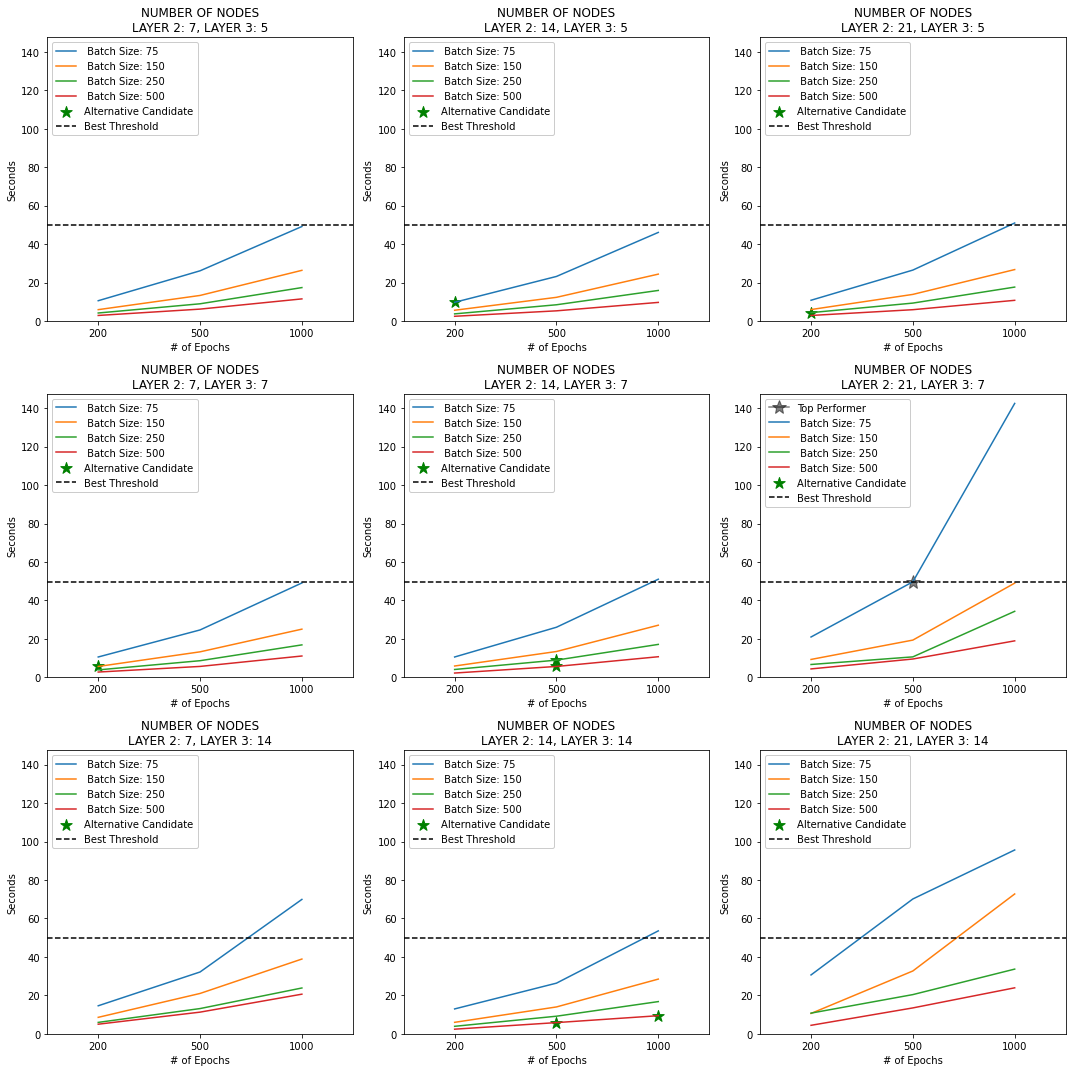

()

In [41]:
PlotTimeCostGroups(ResultsDataTanH, AlternativeTolerance, TimeTolerance )

In [42]:
NewFileCreate = False
AppendExistingFile = False

if NewFileCreate == True:
    ResultsDataTanH.to_csv(r'C:\Users\robli\OneDrive - The University of Texas at Dallas\MBA\5th Semester\6341 Applied Machine Learning\Assignments\Assignment 3\Results Ouput\TanHData.csv', 
                       index = False)
if AppendExistingFile==True:
        ResultsDataTanH.to_csv(r'C:\Users\robli\OneDrive - The University of Texas at Dallas\MBA\5th Semester\6341 Applied Machine Learning\Assignments\Assignment 3\Results Ouput\TanHData.csv', 
                       index = False, mode = 'a', header=False)

# K-fold Cross Validation Wrapper
https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/

In [43]:
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# import the libraries 
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [44]:
kfold_X_train =[X_train.copy(), X_val.copy()]
kfold_X_train = pd.concat(kfold_X_train)
display (kfold_X_train)

kfold_y_train =[y_train.copy(), y_val.copy()]
kfold_y_train = pd.concat(kfold_y_train)
display (kfold_y_train)

DOWAdjust  HourRank  PeakHours  Temperature(dC)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  Dew point temperature(dC)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  SeasonalMeanAdj  Holiday  Functioning Day
4938   -1.565      1.000       1           0.647         -0.577           0.276             0.653                 0.375                     0.192              -0.006        -0.008           1.000          0            1       
3409   -1.565     -0.568       0           0.114         -0.477          -0.271             1.000                -0.096                    -0.200              -0.006        -0.008           0.696          0            1       
6691    0.076      0.913       0           0.478         -0.076           0.258             1.000                 0.507                    -0.149              -0.006        -0.008           0.797          0            1       
6328   -0.701      0.564       0           0.670         -0.126           0.047             0.982                 0.688                     0.420              -0.006        -0.008           1.000          0            1       
1756   -1.565     -1.003       0          -0.826         -0.677           0.311             1.000                -1.178                    -0.200              -0.006        -0.008           0.217          0            1       
...         ...       ...        ...              ...          ...               ...               ...                        ...                      ...           ...            ...              ...      ...              ...
503     0.627     -0.045       0          -0.554          0.524          -0.201            -1.100                -0.382                    -0.200              -0.006         0.083           0.217          0            1       
8168    0.134      0.477       0          -0.163          0.474          -0.183            -1.620                 0.032                    -0.163              -0.006        -0.008           0.797          0            0       
3071    0.076     -0.045       0          -0.378         -0.477           0.241             1.000                -0.597                    -0.200              -0.006        -0.008           0.696          0            1       
8476    0.134     -1.003       0          -0.324          0.224          -0.148            -0.469                -0.228                    -0.200              -0.006        -0.008           0.797          0            1       
7808    0.134      0.477       0          -0.124         -0.001          -0.201             0.215                -0.100                    -0.125              -0.006        -0.008           0.797          0            1       

[7884 rows x 14 columns]

4938    1
3409    1
6691    1
6328    1
1756    0
       ..
503     0
8168    0
3071    0
8476    0
7808    1
Name: MedianOrHigher, Length: 7884, dtype: int32

https://www.geeksforgeeks.org/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/

In [45]:
# import the libraries 
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [46]:
def build_clf2(Layer2,Layer3,activation_function):
    
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(tf.keras.layers.Dense(units=Layer2, input_dim=14, kernel_initializer='uniform', activation='relu'))
    classifier.add(tf.keras.layers.Dense(units=Layer3, kernel_initializer='uniform', activation='relu'))
    classifier.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation=activation_function))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #classifier = Sequential()
    #classifier.add(Dense(units=node2_trial, input_dim=len(X_train.columns), kernel_initializer='uniform', activation='relu'))
    #classifier.add(Dense(units=node3_trial, kernel_initializer='uniform', activation='relu'))
    #classifier.add(Dense(units=1, kernel_initializer='uniform', activation=activation_function))
    #classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return classifier

In [47]:
#Declare and Build Model    
model=KerasClassifier(build_fn=build_clf2)

#Allow for early stopping!
callback = tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=1e-2,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

#Establish Hyperparameters
params={'batch_size':[25,75,150,250,500], 
        'epochs':[10,50,100,200,500,1000],
        'Layer2':[3,5,7,len(X_train.columns),21],
        'Layer3':[1,3,5,7,len(X_train.columns)], 
        'activation_function':['sigmoid']
        }


#Start stopwatch for total gridsearch process length
stopwatchstart = time.time()

#Establish GridSearchCV 
gs=GridSearchCV(estimator=model, param_grid=params, cv=5,refit = True, verbose = 0)

# now fit the dataset to the GridSearchCV object. 
#gs = gs.fit(kfold_X_train, kfold_y_train, validation_data = [X_test,y_test])
gs = gs.fit(kfold_X_train, kfold_y_train, verbose=0, callbacks=[callback])

#classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)


#Show how long entire gridsearch took
stopwatchstop = time.time()
print("Total Run Time: ", stopwatchstop - stopwatchstart)

#Show quick summary
best_params=gs.best_params_
accuracy=gs.best_score_

64/64 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4898
Epoch 21: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4788
Epoch 21: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.9080
Epoch 21: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4788
Epoch 62: early stopping
64/64 [==============================] - 0s 973us/step - loss: 0.2644 - accuracy: 0.8814
Epoch 59: early stopping
64/64 [==============================] - 0s 896us/step - loss: 0.2840 - accuracy: 0.8865
Epoch 21: early stopping
64/64 [==============================] - 0s 929us/step - loss: 0.6932 - accuracy: 0.4978
Epoch 56: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2242 - accuracy: 0.9086
Epoch 21: early stopping
64/64 [==============================] - 0s 828us/step - loss: 0.6938 - accuracy: 0.4788
Epoch 21:

11/11 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9283
Epoch 130: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8903
Epoch 21: early stopping
11/11 [==============================] - 0s 956us/step - loss: 0.6931 - accuracy: 0.5029
Epoch 168: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.9119
Epoch 21: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4978
Epoch 21: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4898
Epoch 21: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4788
Epoch 148: early stopping
11/11 [==============================] - 0s 925us/step - loss: 0.2713 - accuracy: 0.8782
Epoch 21: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4851
Epoch 142:

64/64 [==============================] - 0s 1ms/step - loss: 0.2338 - accuracy: 0.8947
Epoch 76: early stopping
64/64 [==============================] - 0s 880us/step - loss: 0.2419 - accuracy: 0.8954
Epoch 91: early stopping
64/64 [==============================] - 0s 965us/step - loss: 0.2261 - accuracy: 0.9157
Epoch 72: early stopping
64/64 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.8871
Epoch 76: early stopping
64/64 [==============================] - 0s 695us/step - loss: 0.2250 - accuracy: 0.9112
Epoch 58: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2354 - accuracy: 0.8979
Epoch 95: early stopping
64/64 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9252
Epoch 55: early stopping
64/64 [==============================] - 0s 866us/step - loss: 0.2815 - accuracy: 0.8922
Epoch 65: early stopping
64/64 [==============================] - 0s 775us/step - loss: 0.2139 - accuracy: 0.9138
Epoch 5

11/11 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.8814
Epoch 105: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.8991
Epoch 154: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.8884
Epoch 119: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.8916
Epoch 21: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4851
Epoch 143: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8757
Epoch 148: early stopping
7/7 [==============================] - 0s 3ms/step - loss: 0.2402 - accuracy: 0.9067
Epoch 156: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.8897
Epoch 109: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2728 - accuracy: 0.8795
Epoch 124: early stopping


64/64 [==============================] - 0s 1ms/step - loss: 0.2303 - accuracy: 0.8954
Epoch 21: early stopping
64/64 [==============================] - 0s 787us/step - loss: 0.6932 - accuracy: 0.4971
Epoch 73: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0.9112
Epoch 86: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9131
Epoch 60: early stopping
64/64 [==============================] - 0s 872us/step - loss: 0.2274 - accuracy: 0.9036
Epoch 57: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2672 - accuracy: 0.8852
Epoch 65: early stopping
64/64 [==============================] - 0s 901us/step - loss: 0.2399 - accuracy: 0.8941
Epoch 52: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.8865
Epoch 89: early stopping
64/64 [==============================] - 0s 747us/step - loss: 0.2147 - accuracy: 0.9138
Epoch 50:

7/7 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.8802
Epoch 100: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.8991
Epoch 103: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.8878
Epoch 146: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.8903
Epoch 117: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8979
Epoch 120: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.8738
Epoch 163: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2152 - accuracy: 0.9201
Epoch 116: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.8903
Epoch 113: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2682 - accuracy: 0.8789
Epoch 170: early stopping
7

22/22 [==============================] - 0s 931us/step - loss: 0.2552 - accuracy: 0.8928
Epoch 71: early stopping
22/22 [==============================] - 0s 857us/step - loss: 0.2547 - accuracy: 0.8865
Epoch 78: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2565 - accuracy: 0.8998
Epoch 64: early stopping
22/22 [==============================] - 0s 975us/step - loss: 0.2762 - accuracy: 0.8782
Epoch 85: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2330 - accuracy: 0.8966
Epoch 93: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.8922
Epoch 75: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2466 - accuracy: 0.8954
Epoch 105: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.9125
Epoch 87: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.8928
Epoch 77: 

7/7 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8909
Epoch 91: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.8890
Epoch 105: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.8935
Epoch 140: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2632 - accuracy: 0.8821
Epoch 112: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2404 - accuracy: 0.8959
Epoch 103: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.8916
Epoch 151: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9264
Epoch 149: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2617 - accuracy: 0.8979
Epoch 146: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.8821
Epoch 125: early stopping
4/

22/22 [==============================] - 0s 1ms/step - loss: 0.2482 - accuracy: 0.8916
Epoch 60: early stopping
22/22 [==============================] - 0s 955us/step - loss: 0.2469 - accuracy: 0.8954
Epoch 64: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2525 - accuracy: 0.8928
Epoch 76: early stopping
22/22 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8859
Epoch 67: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.9067
Epoch 57: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2417 - accuracy: 0.8916
Epoch 56: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.8992
Epoch 77: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2523 - accuracy: 0.8985
Epoch 69: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2771 - accuracy: 0.8789
Epoch 103: earl

4/4 [==============================] - 0s 4ms/step - loss: 0.2664 - accuracy: 0.9055
Epoch 148: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.8859
Epoch 102: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8744
Epoch 123: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.8865
Epoch 110: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8802
Epoch 112: early stopping
4/4 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.9004
Epoch 112: early stopping
4/4 [==============================] - 0s 4ms/step - loss: 0.2501 - accuracy: 0.8884
Epoch 113: early stopping
4/4 [==============================] - 0s 3ms/step - loss: 0.2432 - accuracy: 0.8922
Epoch 133: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.8973
Epoch 141: early stopping
4

22/22 [==============================] - 0s 1ms/step - loss: 0.2455 - accuracy: 0.8966
Epoch 21: early stopping
22/22 [==============================] - 0s 900us/step - loss: 0.6939 - accuracy: 0.4788
Epoch 21: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4971
Epoch 95: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.8878
Epoch 114: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2214 - accuracy: 0.9144
Epoch 87: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.8928
Epoch 103: early stopping
22/22 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8808
Epoch 105: early stopping
22/22 [==============================] - 0s 921us/step - loss: 0.2052 - accuracy: 0.9239
Epoch 108: early stopping
22/22 [==============================] - 0s 918us/step - loss: 0.2236 - accuracy: 0.9131
Epoch 1

4/4 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8624
Epoch 21: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4971
Epoch 21: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8535
Epoch 21: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4898
Epoch 21: early stopping
4/4 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4788
Epoch 194: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.8903
Epoch 21: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.8959
Epoch 21: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4788
Epoch 227: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.9125
Epoch 241: early stopping
4/4 [==

Epoch 73: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2525 - accuracy: 0.8859
Epoch 91: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2568 - accuracy: 0.8953
Epoch 132: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2110 - accuracy: 0.9182
Epoch 109: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.8941
Epoch 131: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2302 - accuracy: 0.9150
Epoch 100: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.8827
Epoch 102: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.9080
Epoch 126: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9201
Epoch 103: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2125 - ac

4/4 [==============================] - 0s 4ms/step - loss: 0.2564 - accuracy: 0.8966
Epoch 164: early stopping
4/4 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9055
Epoch 21: early stopping
4/4 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4898
Epoch 172: early stopping
4/4 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.9093
Epoch 191: early stopping
4/4 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8770
Epoch 193: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.8903
Epoch 145: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2900 - accuracy: 0.8757
Epoch 220: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2719 - accuracy: 0.8864
Epoch 46: early stopping
64/64 [==============================] - 0s 809us/step - loss: 0.2074 - accuracy: 0.9181
Epoch 57: early stoppin

11/11 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.9144
Epoch 78: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.8808
Epoch 82: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.8902
Epoch 89: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.9169
Epoch 83: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.8878
Epoch 88: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8973
Epoch 91: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.9131
Epoch 150: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2024 - accuracy: 0.9283
Epoch 86: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2756 - accuracy: 0.8814
Epoch 135: early

64/64 [==============================] - 0s 708us/step - loss: 0.1998 - accuracy: 0.9245
Epoch 66: early stopping
64/64 [==============================] - 0s 926us/step - loss: 0.2011 - accuracy: 0.9195
Epoch 48: early stopping
64/64 [==============================] - 0s 978us/step - loss: 0.2414 - accuracy: 0.8903
Epoch 57: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2493 - accuracy: 0.9030
Epoch 47: early stopping
64/64 [==============================] - 0s 755us/step - loss: 0.2123 - accuracy: 0.9163
Epoch 67: early stopping
64/64 [==============================] - 0s 952us/step - loss: 0.1889 - accuracy: 0.9220
Epoch 48: early stopping
64/64 [==============================] - 0s 991us/step - loss: 0.2370 - accuracy: 0.8935
Epoch 77: early stopping
64/64 [==============================] - 0s 987us/step - loss: 0.2050 - accuracy: 0.9245
Epoch 70: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2277 - accuracy: 0.9176
Epo

11/11 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9112
Epoch 82: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2566 - accuracy: 0.8840
Epoch 111: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.9296
Epoch 109: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2049 - accuracy: 0.9188
Epoch 74: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.8763
Epoch 92: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9150
Epoch 70: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.8846
Epoch 87: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8769
Epoch 83: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2475 - accuracy: 0.8884
Epoch 82: early sto

64/64 [==============================] - 0s 890us/step - loss: 0.2281 - accuracy: 0.8972
Epoch 40: early stopping
64/64 [==============================] - 0s 964us/step - loss: 0.2323 - accuracy: 0.8928
Epoch 55: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.1994 - accuracy: 0.9220
Epoch 46: early stopping
64/64 [==============================] - 0s 964us/step - loss: 0.2271 - accuracy: 0.9112
Epoch 65: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9169
Epoch 55: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.9086
Epoch 63: early stopping
64/64 [==============================] - 0s 869us/step - loss: 0.2052 - accuracy: 0.9176
Epoch 81: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.1992 - accuracy: 0.9201
Epoch 43: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2307 - accuracy: 0.9138
Epoch 69:

7/7 [==============================] - 0s 1ms/step - loss: 0.2044 - accuracy: 0.9264
Epoch 93: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.9271
Epoch 74: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2735 - accuracy: 0.8884
Epoch 83: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.8763
Epoch 100: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.1960 - accuracy: 0.9264
Epoch 85: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.8789
Epoch 105: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.8922
Epoch 128: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9169
Epoch 90: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2184 - accuracy: 0.9169
Epoch 104: early stopping
7/7 [=

64/64 [==============================] - 0s 928us/step - loss: 0.2595 - accuracy: 0.8890
Epoch 21: early stopping
64/64 [==============================] - 0s 854us/step - loss: 0.6932 - accuracy: 0.4898
Epoch 79: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.1993 - accuracy: 0.9220
Epoch 99: early stopping
64/64 [==============================] - 0s 788us/step - loss: 0.2064 - accuracy: 0.9220
Epoch 61: early stopping
64/64 [==============================] - 0s 932us/step - loss: 0.2724 - accuracy: 0.8960
Epoch 73: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2531 - accuracy: 0.8954
Epoch 72: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8643
Epoch 21: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2728 - accuracy: 0.8802
Epoch 98: early stopping
22/22 [==============================] - 0s 988us/step - loss: 0.2128 - accuracy: 0.9188
Epoch 8

7/7 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8744
Epoch 21: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4788
Epoch 140: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2744 - accuracy: 0.8782
Epoch 147: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8865
Epoch 160: early stopping
7/7 [==============================] - 0s 3ms/step - loss: 0.2897 - accuracy: 0.8770
Epoch 21: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4898
Epoch 168: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2163 - accuracy: 0.9182
Epoch 144: early stopping
7/7 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9214
Epoch 159: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0.9131
Epoch 137: early stopping
7/7

22/22 [==============================] - 0s 1ms/step - loss: 0.2840 - accuracy: 0.8776
Epoch 21: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4898
Epoch 80: early stopping
22/22 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.8884
Epoch 64: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2404 - accuracy: 0.8922
Epoch 75: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2573 - accuracy: 0.8897
Epoch 60: early stopping
22/22 [==============================] - 0s 854us/step - loss: 0.2241 - accuracy: 0.9112
Epoch 79: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2013 - accuracy: 0.9214
Epoch 87: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2657 - accuracy: 0.8814
Epoch 93: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.9138
Epoch 116: earl

7/7 [==============================] - 0s 1ms/step - loss: 0.2452 - accuracy: 0.8897
Epoch 143: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2748 - accuracy: 0.8782
Epoch 118: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2549 - accuracy: 0.8960
Epoch 115: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.9100
Epoch 200: early stopping
4/4 [==============================] - 0s 4ms/step - loss: 0.3581 - accuracy: 0.8648
Epoch 21: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4788
Epoch 182: early stopping
4/4 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.9125
Epoch 155: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.8808
Epoch 158: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9016
Epoch 160: early stopping
4/

22/22 [==============================] - 0s 1ms/step - loss: 0.2051 - accuracy: 0.9214
Epoch 84: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.9201
Epoch 84: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9112
Epoch 84: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2157 - accuracy: 0.9201
Epoch 58: early stopping
22/22 [==============================] - 0s 993us/step - loss: 0.2398 - accuracy: 0.8940
Epoch 95: early stopping
22/22 [==============================] - 0s 920us/step - loss: 0.2504 - accuracy: 0.8897
Epoch 75: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2036 - accuracy: 0.9207
Epoch 87: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.9106
Epoch 77: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.9163
Epoch 113: ea

4/4 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8953
Epoch 122: early stopping
4/4 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.8935
Epoch 137: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.8966
Epoch 122: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.8871
Epoch 140: early stopping
4/4 [==============================] - 0s 5ms/step - loss: 0.2727 - accuracy: 0.8947
Epoch 114: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.8884
Epoch 135: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9201
Epoch 163: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9055
Epoch 139: early stopping
4/4 [==============================] - 0s 910us/step - loss: 0.2204 - accuracy: 0.9125
Epoch 158: early stopping

22/22 [==============================] - 0s 961us/step - loss: 0.2033 - accuracy: 0.9214
Epoch 57: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.8789
Epoch 103: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0.9182
Epoch 52: early stopping
22/22 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.8795
Epoch 64: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2136 - accuracy: 0.9119
Epoch 96: early stopping
11/11 [==============================] - 0s 979us/step - loss: 0.1959 - accuracy: 0.9245
Epoch 82: early stopping
11/11 [==============================] - 0s 852us/step - loss: 0.2055 - accuracy: 0.9213
Epoch 123: early stopping
11/11 [==============================] - 0s 827us/step - loss: 0.2052 - accuracy: 0.9176
Epoch 81: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 0.9252
Epoch 1

4/4 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9074
Epoch 140: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2021 - accuracy: 0.9258
Epoch 133: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8909
Epoch 134: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9207
Epoch 140: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9157
Epoch 116: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.8795
Epoch 175: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9220
Epoch 171: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.9214
Epoch 133: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9214
Epoch 142: early stopping
4

11/11 [==============================] - 0s 1ms/step - loss: 0.2209 - accuracy: 0.9118
Epoch 72: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9176
Epoch 98: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9258
Epoch 72: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2298 - accuracy: 0.9112
Epoch 99: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.9150
Epoch 57: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9086
Epoch 80: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2383 - accuracy: 0.8922
Epoch 71: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9220
Epoch 72: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.8973
Epoch 66: early s

4/4 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9144
Epoch 122: early stopping
4/4 [==============================] - 0s 3ms/step - loss: 0.2079 - accuracy: 0.9214
Epoch 116: early stopping
4/4 [==============================] - 0s 4ms/step - loss: 0.2547 - accuracy: 0.9011
Epoch 119: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.9100
Epoch 101: early stopping
64/64 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.8979
Epoch 48: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 0.9239
Epoch 21: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.2583 - accuracy: 0.8865
Epoch 21: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4898
Epoch 52: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.1959 - accuracy: 0.9220
Epoch 55: early stopp

11/11 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 0.8978
Epoch 115: early stopping
11/11 [==============================] - 0s 929us/step - loss: 0.2785 - accuracy: 0.8795
Epoch 110: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2134 - accuracy: 0.9252
Epoch 115: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9081
Epoch 109: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8789
Epoch 108: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.8947
Epoch 127: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.8814
Epoch 21: early stopping
11/11 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4971
Epoch 127: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2969 - accuracy: 0.8852
Epoch 13

64/64 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.8973
Epoch 46: early stopping
64/64 [==============================] - 0s 916us/step - loss: 0.2529 - accuracy: 0.8909
Epoch 48: early stopping
64/64 [==============================] - 0s 1ms/step - loss: 0.1980 - accuracy: 0.9270
Epoch 91: early stopping
64/64 [==============================] - 0s 712us/step - loss: 0.1993 - accuracy: 0.9226
Epoch 59: early stopping
64/64 [==============================] - 0s 963us/step - loss: 0.1934 - accuracy: 0.9271
Epoch 39: early stopping
64/64 [==============================] - 0s 724us/step - loss: 0.2591 - accuracy: 0.9004
Epoch 67: early stopping
64/64 [==============================] - 0s 838us/step - loss: 0.2086 - accuracy: 0.9201
Epoch 50: early stopping
64/64 [==============================] - 0s 721us/step - loss: 0.1966 - accuracy: 0.9220
Epoch 63: early stopping
64/64 [==============================] - 0s 789us/step - loss: 0.1967 - accuracy: 0.9245
Epo

11/11 [==============================] - 0s 986us/step - loss: 0.2574 - accuracy: 0.8979
Epoch 96: early stopping
11/11 [==============================] - 0s 944us/step - loss: 0.2518 - accuracy: 0.8865
Epoch 87: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.1969 - accuracy: 0.9264
Epoch 116: early stopping
11/11 [==============================] - 0s 897us/step - loss: 0.2446 - accuracy: 0.8979
Epoch 111: early stopping
11/11 [==============================] - 0s 998us/step - loss: 0.2092 - accuracy: 0.9214
Epoch 95: early stopping
11/11 [==============================] - 0s 920us/step - loss: 0.2196 - accuracy: 0.9138
Epoch 121: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2128 - accuracy: 0.9207
Epoch 123: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2351 - accuracy: 0.9181
Epoch 123: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9195
Epoch 

64/64 [==============================] - 0s 723us/step - loss: 0.2126 - accuracy: 0.9188
Epoch 59: early stopping
64/64 [==============================] - 0s 663us/step - loss: 0.1865 - accuracy: 0.9264
Epoch 71: early stopping
64/64 [==============================] - 0s 685us/step - loss: 0.1955 - accuracy: 0.9214
Epoch 54: early stopping
64/64 [==============================] - 0s 712us/step - loss: 0.1999 - accuracy: 0.9239
Epoch 53: early stopping
64/64 [==============================] - 0s 696us/step - loss: 0.2277 - accuracy: 0.9138
Epoch 70: early stopping
64/64 [==============================] - 0s 657us/step - loss: 0.2113 - accuracy: 0.9157
Epoch 56: early stopping
64/64 [==============================] - 0s 665us/step - loss: 0.1937 - accuracy: 0.9213
Epoch 43: early stopping
64/64 [==============================] - 0s 715us/step - loss: 0.1969 - accuracy: 0.9277
Epoch 61: early stopping
64/64 [==============================] - 0s 670us/step - loss: 0.1985 - accuracy: 0.9271

7/7 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.9067
Epoch 94: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2160 - accuracy: 0.9150
Epoch 94: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.9296
Epoch 105: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2081 - accuracy: 0.9182
Epoch 113: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2095 - accuracy: 0.9220
Epoch 118: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2207 - accuracy: 0.9169
Epoch 107: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2169 - accuracy: 0.9119
Epoch 107: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.1974 - accuracy: 0.9264
Epoch 97: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2061 - accuracy: 0.9176
Epoch 103: early stopping
7/7 

64/64 [==============================] - 0s 692us/step - loss: 0.1969 - accuracy: 0.9252
Epoch 48: early stopping
64/64 [==============================] - 0s 723us/step - loss: 0.2253 - accuracy: 0.9150
Epoch 54: early stopping
64/64 [==============================] - 0s 678us/step - loss: 0.2140 - accuracy: 0.9157
Epoch 56: early stopping
64/64 [==============================] - 0s 735us/step - loss: 0.1922 - accuracy: 0.9258
Epoch 50: early stopping
64/64 [==============================] - 0s 742us/step - loss: 0.2002 - accuracy: 0.9163
Epoch 41: early stopping
64/64 [==============================] - 0s 724us/step - loss: 0.2062 - accuracy: 0.9188
Epoch 60: early stopping
64/64 [==============================] - 0s 705us/step - loss: 0.2455 - accuracy: 0.9150
Epoch 53: early stopping
64/64 [==============================] - 0s 684us/step - loss: 0.2133 - accuracy: 0.9182
Epoch 46: early stopping
22/22 [==============================] - 0s 858us/step - loss: 0.2288 - accuracy: 0.9004

7/7 [==============================] - 0s 1ms/step - loss: 0.2198 - accuracy: 0.9258
Epoch 85: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2382 - accuracy: 0.9081
Epoch 89: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2559 - accuracy: 0.9048
Epoch 110: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9220
Epoch 119: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2084 - accuracy: 0.9252
Epoch 94: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2203 - accuracy: 0.9106
Epoch 137: early stopping
7/7 [==============================] - 0s 997us/step - loss: 0.2295 - accuracy: 0.9163
Epoch 89: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.1923 - accuracy: 0.9258
Epoch 97: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2023 - accuracy: 0.9207
Epoch 101: early stopping
7/7 

22/22 [==============================] - 0s 854us/step - loss: 0.2016 - accuracy: 0.9220
Epoch 50: early stopping
22/22 [==============================] - 0s 902us/step - loss: 0.1959 - accuracy: 0.9296
Epoch 48: early stopping
22/22 [==============================] - 0s 857us/step - loss: 0.2009 - accuracy: 0.9163
Epoch 61: early stopping
22/22 [==============================] - 0s 942us/step - loss: 0.1967 - accuracy: 0.9252
Epoch 79: early stopping
22/22 [==============================] - 0s 824us/step - loss: 0.2256 - accuracy: 0.9176
Epoch 54: early stopping
22/22 [==============================] - 0s 951us/step - loss: 0.2131 - accuracy: 0.9169
Epoch 51: early stopping
22/22 [==============================] - 0s 866us/step - loss: 0.1939 - accuracy: 0.9264
Epoch 63: early stopping
22/22 [==============================] - 0s 812us/step - loss: 0.2072 - accuracy: 0.9131
Epoch 72: early stopping
22/22 [==============================] - 0s 977us/step - loss: 0.1966 - accuracy: 0.9245

7/7 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9106
Epoch 75: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9232
Epoch 92: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.1975 - accuracy: 0.9169
Epoch 86: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2064 - accuracy: 0.9258
Epoch 85: early stopping
7/7 [==============================] - 0s 997us/step - loss: 0.2265 - accuracy: 0.9182
Epoch 87: early stopping
7/7 [==============================] - 0s 997us/step - loss: 0.2148 - accuracy: 0.9157
Epoch 78: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2011 - accuracy: 0.9245
Epoch 89: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.9169
Epoch 97: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2065 - accuracy: 0.9252
Epoch 80: early stopping
7/7 [=

22/22 [==============================] - 0s 757us/step - loss: 0.2211 - accuracy: 0.9176
Epoch 21: early stopping
22/22 [==============================] - 0s 778us/step - loss: 0.6932 - accuracy: 0.4898
Epoch 93: early stopping
22/22 [==============================] - 0s 855us/step - loss: 0.2012 - accuracy: 0.9207
Epoch 78: early stopping
22/22 [==============================] - 0s 922us/step - loss: 0.2664 - accuracy: 0.8814
Epoch 87: early stopping
22/22 [==============================] - 0s 837us/step - loss: 0.2754 - accuracy: 0.8966
Epoch 21: early stopping
22/22 [==============================] - 0s 916us/step - loss: 0.6932 - accuracy: 0.4978
Epoch 75: early stopping
22/22 [==============================] - 0s 823us/step - loss: 0.1969 - accuracy: 0.9226
Epoch 76: early stopping
22/22 [==============================] - 0s 926us/step - loss: 0.2000 - accuracy: 0.9226
Epoch 86: early stopping
22/22 [==============================] - 0s 962us/step - loss: 0.2070 - accuracy: 0.9207

7/7 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4788
Epoch 149: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2510 - accuracy: 0.8916
Epoch 142: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2298 - accuracy: 0.9144
Epoch 134: early stopping
7/7 [==============================] - 0s 1ms/step - loss: 0.2262 - accuracy: 0.9125
Epoch 21: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8586
Epoch 21: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4851
Epoch 21: early stopping
4/4 [==============================] - 0s 997us/step - loss: 0.2561 - accuracy: 0.9030
Epoch 21: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5029
Epoch 184: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.9144
Epoch 188: early stopping
4/4

22/22 [==============================] - 0s 949us/step - loss: 0.1998 - accuracy: 0.9233
Epoch 76: early stopping
22/22 [==============================] - 0s 895us/step - loss: 0.2000 - accuracy: 0.9214
Epoch 79: early stopping
22/22 [==============================] - 0s 854us/step - loss: 0.2222 - accuracy: 0.9138
Epoch 93: early stopping
22/22 [==============================] - 0s 878us/step - loss: 0.2225 - accuracy: 0.9131
Epoch 60: early stopping
22/22 [==============================] - 0s 748us/step - loss: 0.1915 - accuracy: 0.9277
Epoch 78: early stopping
22/22 [==============================] - 0s 903us/step - loss: 0.1987 - accuracy: 0.9182
Epoch 74: early stopping
22/22 [==============================] - 0s 876us/step - loss: 0.2067 - accuracy: 0.9233
Epoch 73: early stopping
22/22 [==============================] - 0s 916us/step - loss: 0.2234 - accuracy: 0.9144
Epoch 75: early stopping
22/22 [==============================] - 0s 916us/step - loss: 0.2077 - accuracy: 0.9226

4/4 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.9201
Epoch 141: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2098 - accuracy: 0.9131
Epoch 138: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.9201
Epoch 144: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9081
Epoch 127: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2485 - accuracy: 0.8871
Epoch 197: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9283
Epoch 118: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2688 - accuracy: 0.8852
Epoch 188: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9226
Epoch 152: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2280 - accuracy: 0.9112
Epoch 114: early stopping
4

22/22 [==============================] - 0s 998us/step - loss: 0.2095 - accuracy: 0.9207
Epoch 57: early stopping
22/22 [==============================] - 0s 943us/step - loss: 0.1944 - accuracy: 0.9220
Epoch 68: early stopping
22/22 [==============================] - 0s 792us/step - loss: 0.2031 - accuracy: 0.9195
Epoch 67: early stopping
22/22 [==============================] - 0s 802us/step - loss: 0.2112 - accuracy: 0.9226
Epoch 55: early stopping
22/22 [==============================] - 0s 840us/step - loss: 0.2284 - accuracy: 0.9138
Epoch 83: early stopping
22/22 [==============================] - 0s 808us/step - loss: 0.2169 - accuracy: 0.9138
Epoch 75: early stopping
11/11 [==============================] - 0s 935us/step - loss: 0.2007 - accuracy: 0.9245
Epoch 99: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9169
Epoch 74: early stopping
11/11 [==============================] - 0s 808us/step - loss: 0.2053 - accuracy: 0.9220
E

4/4 [==============================] - 0s 1ms/step - loss: 0.2117 - accuracy: 0.9201
Epoch 137: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.9093
Epoch 139: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9245
Epoch 122: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.9125
Epoch 120: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9125
Epoch 135: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9232
Epoch 110: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9150
Epoch 119: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2037 - accuracy: 0.9245
Epoch 130: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2329 - accuracy: 0.9131
Epoch 127: early stopping
4

11/11 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.9226
Epoch 83: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2087 - accuracy: 0.9138
Epoch 73: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.1983 - accuracy: 0.9233
Epoch 64: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2298 - accuracy: 0.9106
Epoch 84: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2156 - accuracy: 0.9157
Epoch 63: early stopping
11/11 [==============================] - 0s 798us/step - loss: 0.1967 - accuracy: 0.9226
Epoch 80: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.1981 - accuracy: 0.9207
Epoch 71: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2086 - accuracy: 0.9214
Epoch 70: early stopping
11/11 [==============================] - 0s 998us/step - loss: 0.2231 - accuracy: 0.9138
Epoch 77: ear

4/4 [==============================] - 0s 1ms/step - loss: 0.2080 - accuracy: 0.9226
Epoch 145: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.9087
Epoch 120: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2153 - accuracy: 0.9138
Epoch 122: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9270
Epoch 120: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9131
Epoch 109: early stopping
4/4 [==============================] - 0s 1ms/step - loss: 0.2126 - accuracy: 0.9182
Epoch 119: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9150
Epoch 112: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9106
Epoch 104: early stopping
64/64 [==============================] - 0s 732us/step - loss: 0.2111 - accuracy: 0.9220
Epoch 42: early stoppin

11/11 [==============================] - 0s 1ms/step - loss: 0.1972 - accuracy: 0.9258
Epoch 65: early stopping
11/11 [==============================] - 0s 997us/step - loss: 0.2014 - accuracy: 0.9169
Epoch 67: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.9258
Epoch 66: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2144 - accuracy: 0.9182
Epoch 64: early stopping
11/11 [==============================] - 0s 991us/step - loss: 0.2105 - accuracy: 0.9163
Epoch 67: early stopping
11/11 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.9093
Epoch 73: early stopping
11/11 [==============================] - 0s 997us/step - loss: 0.1985 - accuracy: 0.9214
Epoch 58: early stopping
11/11 [==============================] - 0s 901us/step - loss: 0.1974 - accuracy: 0.9245
Epoch 75: early stopping
11/11 [==============================] - 0s 897us/step - loss: 0.2160 - accuracy: 0.9144
Epoch 7

4/4 [==============================] - 0s 1ms/step - loss: 0.2192 - accuracy: 0.9138
Epoch 111: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9157
Epoch 98: early stopping
4/4 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9245
Epoch 57: early stopping
Total Run Time:  16835.962955236435


In [48]:
display(best_params,accuracy)

CvResults = pd.DataFrame(gs.cv_results_)
display(CvResults.head(200))

{'Layer2': 21,
 'Layer3': 5,
 'activation_function': 'sigmoid',
 'batch_size': 25,
 'epochs': 200}

0.9228819012641907

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_Layer2 param_Layer3 param_activation_function param_batch_size param_epochs                       params                        split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score
0        2.319          0.212          0.186            0.027           3            1                sigmoid                 25             10      {'Layer2': 3, 'Layer3': 1, 'activation_functio...        0.841              0.833              0.848              0.834              0.490             0.769            0.140            673      
1        7.788          2.905          0.162            0.014           3            1                sigmoid                 25             50      {'Layer2': 3, 'Layer3': 1, 'activation_functio...        0.479              0.503              0.900              0.884              0.908             0.735            0.200            697      
2        8.907          3.684          0.184            0.016           3            1                sigmoid                 25            100      {'Layer2': 3, 'Layer3': 1, 'activation_functio...        0.479              0.881              0.886              0.498              0.909             0.731            0.198            703      
3        8.197          4.181          0.166            0.013           3            1                sigmoid                 25            200      {'Layer2': 3, 'Layer3': 1, 'activation_functio...        0.479              0.503              0.900              0.498              0.897             0.655            0.199            725      
4       10.736          5.388          0.175            0.015           3            1                sigmoid                 25            500      {'Layer2': 3, 'Layer3': 1, 'activation_functio...        0.893              0.503              0.916              0.498              0.898             0.742            0.197            684      
..             ...           ...              ...             ...          ...          ...                       ...              ...          ...                                                ...                ...                ...                ...                ...                ...              ...             ...              ...
195      4.198          0.545          0.129            0.005           5            3                sigmoid                150            200      {'Layer2': 5, 'Layer3': 3, 'activation_functio...        0.918              0.894              0.915              0.883              0.908             0.904            0.013            320      
196      4.259          0.722          0.118            0.004           5            3                sigmoid                150            500      {'Layer2': 5, 'Layer3': 3, 'activation_functio...        0.920              0.920              0.892              0.878              0.923             0.907            0.018            281      
197      4.311          1.655          0.125            0.005           5            3                sigmoid                150           1000      {'Layer2': 5, 'Layer3': 3, 'activation_functio...        0.917              0.503              0.914              0.910              0.911             0.831            0.164            586      
198      0.557          0.035          0.112            0.010           5            3                sigmoid                250             10      {'Layer2': 5, 'Layer3': 3, 'activation_functio...        0.809              0.820              0.783              0.803              0.810             0.805            0.012            643      
199      1.416          0.067          0.108            0.006           5            3                sigmoid                250             50      {'Layer2': 5, 'Layer3': 3, 'activation_functio...        0.854          

In [49]:
#Display the Test Data Results
def ShowTestResults(ToTest=[], X_test=[], y_test=[],Title="NoTitleGiven",AUC_On=False):
#def ShowTestResults(ToTest=[], Title="NoTitleGiven",AUC_On=False):
    y_pred = ToTest.predict(X_test)
    
    if AUC_On :
        yPred_p = ToTest.predict_proba(X_test)[:,1]

    cm = confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()

    print("TEST DATA RESULTS : ", Title,"\n***************************************")
    print("         Accuracy : ", accuracy_score(y_test,y_pred))
    print("Balanced accuracy : ", balanced_accuracy_score(y_test,y_pred))
    print("        Precision : ", precision_score(y_test,y_pred))
    print("           Recall : ", recall_score(y_test,y_pred))
    if AUC_On: print("              AUC : ", roc_auc_score(y_test,yPred_p))
    print("      Sensitivity : ", (tp/(tp+fn)))
    print("      Specificity : ", (tn/(tn+fp)))
    
ShowTestResults(gs, X_test, y_test,Title="Sigmoid ANN CV=5 \n \t\t     Epoch: 500\n \t\t     Batch: 25 \n \t\t     HiddenLayer2: 21 \n \t\t     HiddenLayer3: 3", AUC_On = True)
#ShowTestResults(gs, Title="RBF SVM CV=10", AUC_On = True)

28/28 [==============================] - 0s 701us/step
TEST DATA RESULTS :  Sigmoid ANN CV=5 
 		     Epoch: 500
 		     Batch: 25 
 		     HiddenLayer2: 21 
 		     HiddenLayer3: 3 
***************************************
         Accuracy :  0.9235159817351598
Balanced accuracy :  0.922872049041346
        Precision :  0.9102564102564102
           Recall :  0.9445676274944568
              AUC :  0.9694117647058824
      Sensitivity :  0.9445676274944568
      Specificity :  0.9011764705882352


In [50]:
TransformedCvResults = CvResults.copy()
TransformedCvResults.insert(0, "TrialNumber", TransformedCvResults.index + 1)
TransformedCvResults.columns = ['TrialNumber','Time_Cost','Drop1','mean_score_time','Drop2','Node2_Size','Node3_Size',
                                'drop3', 'Batch_Size','Epochs','Parameters', 'drop4','drop5','drop6','drop7','drop8','Validation_Accuracy', 'drop9', 'drop10']
TransformedCvResults.Time_Cost = (TransformedCvResults.Time_Cost + TransformedCvResults.mean_score_time)*5

TransformedCvResults.drop([ 'Drop1', 'Drop2', 'drop3','drop4', 'drop5', 'drop6', 'drop7', 'drop8',  'drop9', 'drop10'], inplace=True, axis =1)
TransformedCvResults=TransformedCvResults[['TrialNumber','Parameters','Validation_Accuracy','Epochs','Batch_Size',
                                          'Node2_Size','Node3_Size','Time_Cost']]
TransformedCvResults.insert(2,"Train_Accuracy",TransformedCvResults.Validation_Accuracy)
TransformedCvResults.insert(9,"Test_Accuracy",TransformedCvResults.Validation_Accuracy)
TransformedCvResults.sort_values(by = ["Epochs","Batch_Size","Node2_Size","Node3_Size"])
TransformedCvResults

TrialNumber                     Parameters                      Train_Accuracy  Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size  Time_Cost  Test_Accuracy
0          1      {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.769             0.769           10       25         3          1       12.523        0.769    
1          2      {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.735             0.735           50       25         3          1       39.746        0.735    
2          3      {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.731             0.731          100       25         3          1       45.453        0.731    
3          4      {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.655             0.655          200       25         3          1       41.815        0.655    
4          5      {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.742             0.742          500       25         3          1       54.557        0.742    
..           ...                                                ...             ...                  ...    ...        ...        ...        ...        ...            ...
745      746      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.898             0.898           50      500        21         14        5.987        0.898    
746      747      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.918             0.918          100      500        21         14        9.982        0.918    
747      748      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.918             0.918          200      500        21         14       10.704        0.918    
748      749      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.916             0.916          500      500        21         14        9.952        0.916    
749      750      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.919             0.919         1000      500        21         14       10.804        0.919    

[750 rows x 10 columns]

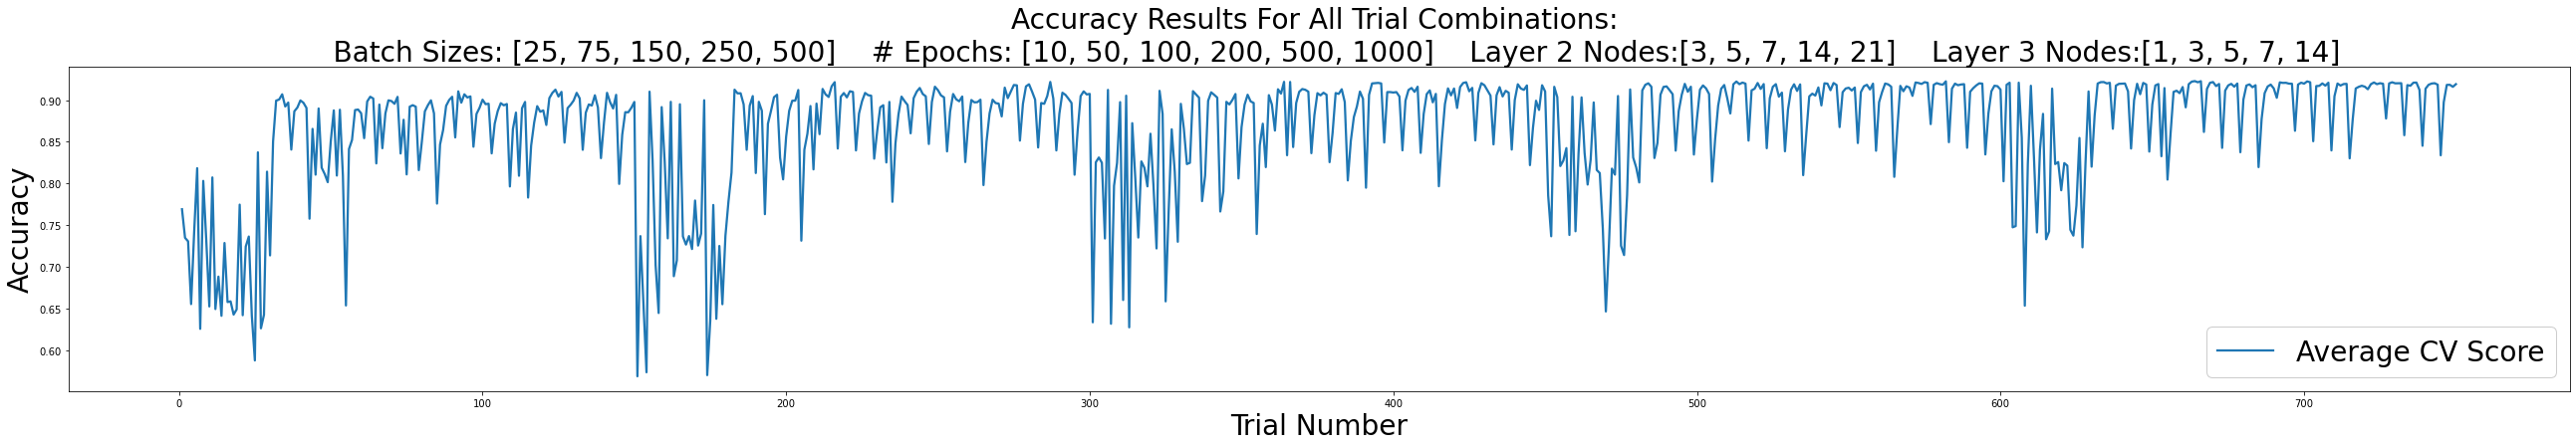

In [51]:
# Visualizing the results as One visualization
plt.figure(figsize=(45,6))
plt.plot(TransformedCvResults.TrialNumber, TransformedCvResults.Validation_Accuracy, label = "Average CV Score", linewidth = 2.25)
#plt.plot(TransformedCvResults.TrialNumber, TransformedCvResults.Train_Accuracy, label = "Train",ls='--', linewidth = .75)
#plt.plot(ResultsData.TrialNumber, ResultsData.Test_Accuracy, label = "Test")

# Set Axis Labels
plt.xlabel("Trial Number", fontsize =28)
plt.ylabel("Accuracy", fontsize =28)

#Designate lefend location
plt.legend(loc='lower right', framealpha =1, fontsize =28)

#Create Title
TitleString = str("Accuracy Results For All Trial Combinations: "+ '\n'
          "    Batch Sizes: "+ str(list(params.values())[0])+
          "    # Epochs: "+ str(list(params.values())[1])+
          "    Layer 2 Nodes:"+ str(list(params.values())[2])+
          "    Layer 3 Nodes:"+ str(list(params.values())[3]) )
plt.title(TitleString, fontsize =28)

plt.show()


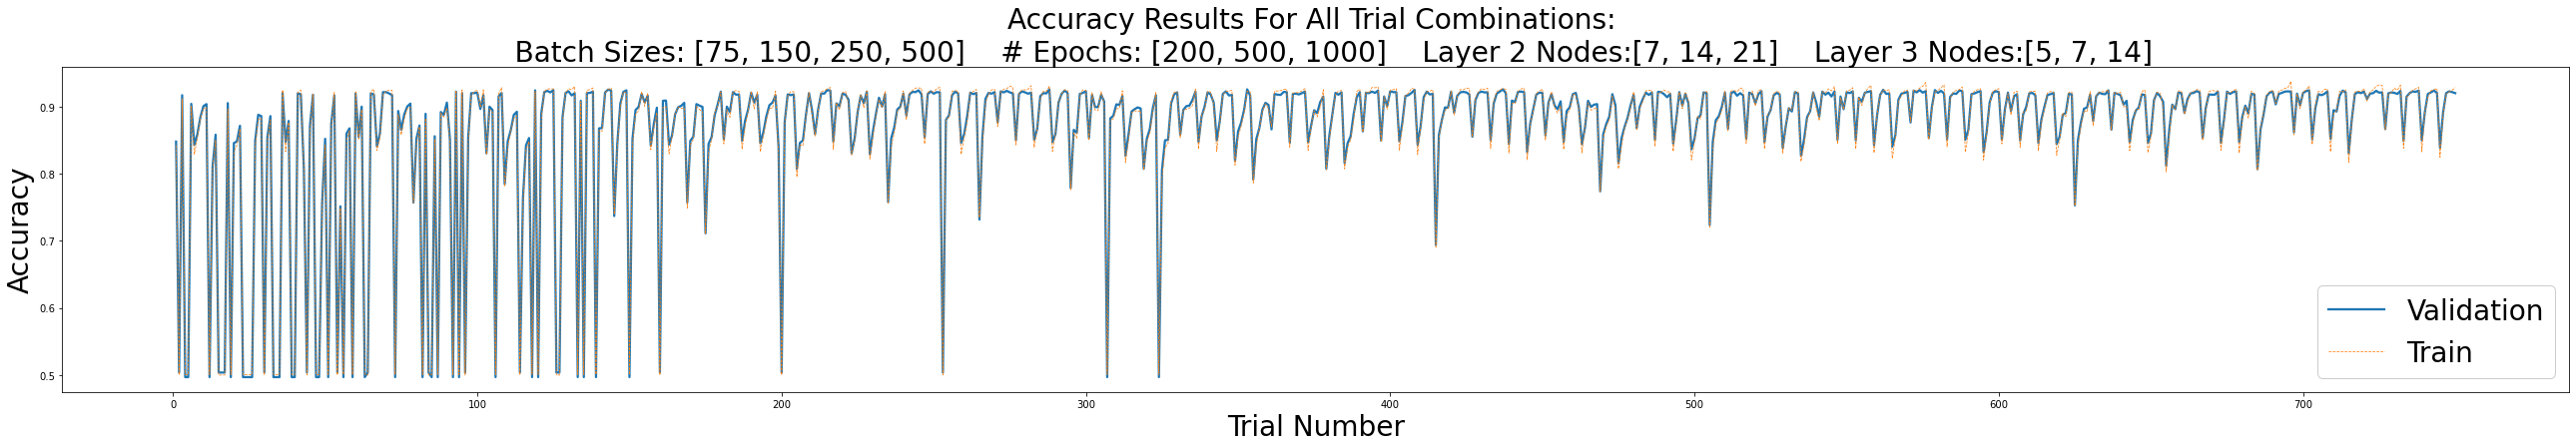

In [52]:
# Visualizing the results as One visualization
plt.figure(figsize=(45,6))
plt.plot(ResultsData.TrialNumber, ResultsData.Validation_Accuracy, label = "Validation", linewidth = 2.25)
plt.plot(ResultsData.TrialNumber, ResultsData.Train_Accuracy, label = "Train",ls='--', linewidth = .75)
#plt.plot(ResultsData.TrialNumber, ResultsData.Test_Accuracy, label = "Test")

# Set Axis Labels
plt.xlabel("Trial Number", fontsize =28)
plt.ylabel("Accuracy", fontsize = 28)

#Designate lefend location
plt.legend(loc='lower right', framealpha =1, fontsize =28)

#Create Title
TitleString = str("Accuracy Results For All Trial Combinations: "+ '\n'
          "    Batch Sizes: "+ str(batch_size_list)+
          "    # Epochs: "+ str(epoch_list)+
          "    Layer 2 Nodes:"+ str(node2_size_list)+
          "    Layer 3 Nodes:"+ str(node3_size_list) )
plt.title(TitleString, fontsize =28)

plt.show()

Total Rows: 5
Unique Rows:  [0 1 2 3 4]
Total Columns: 5
Unique Columns:  [0 1 2 3 4]


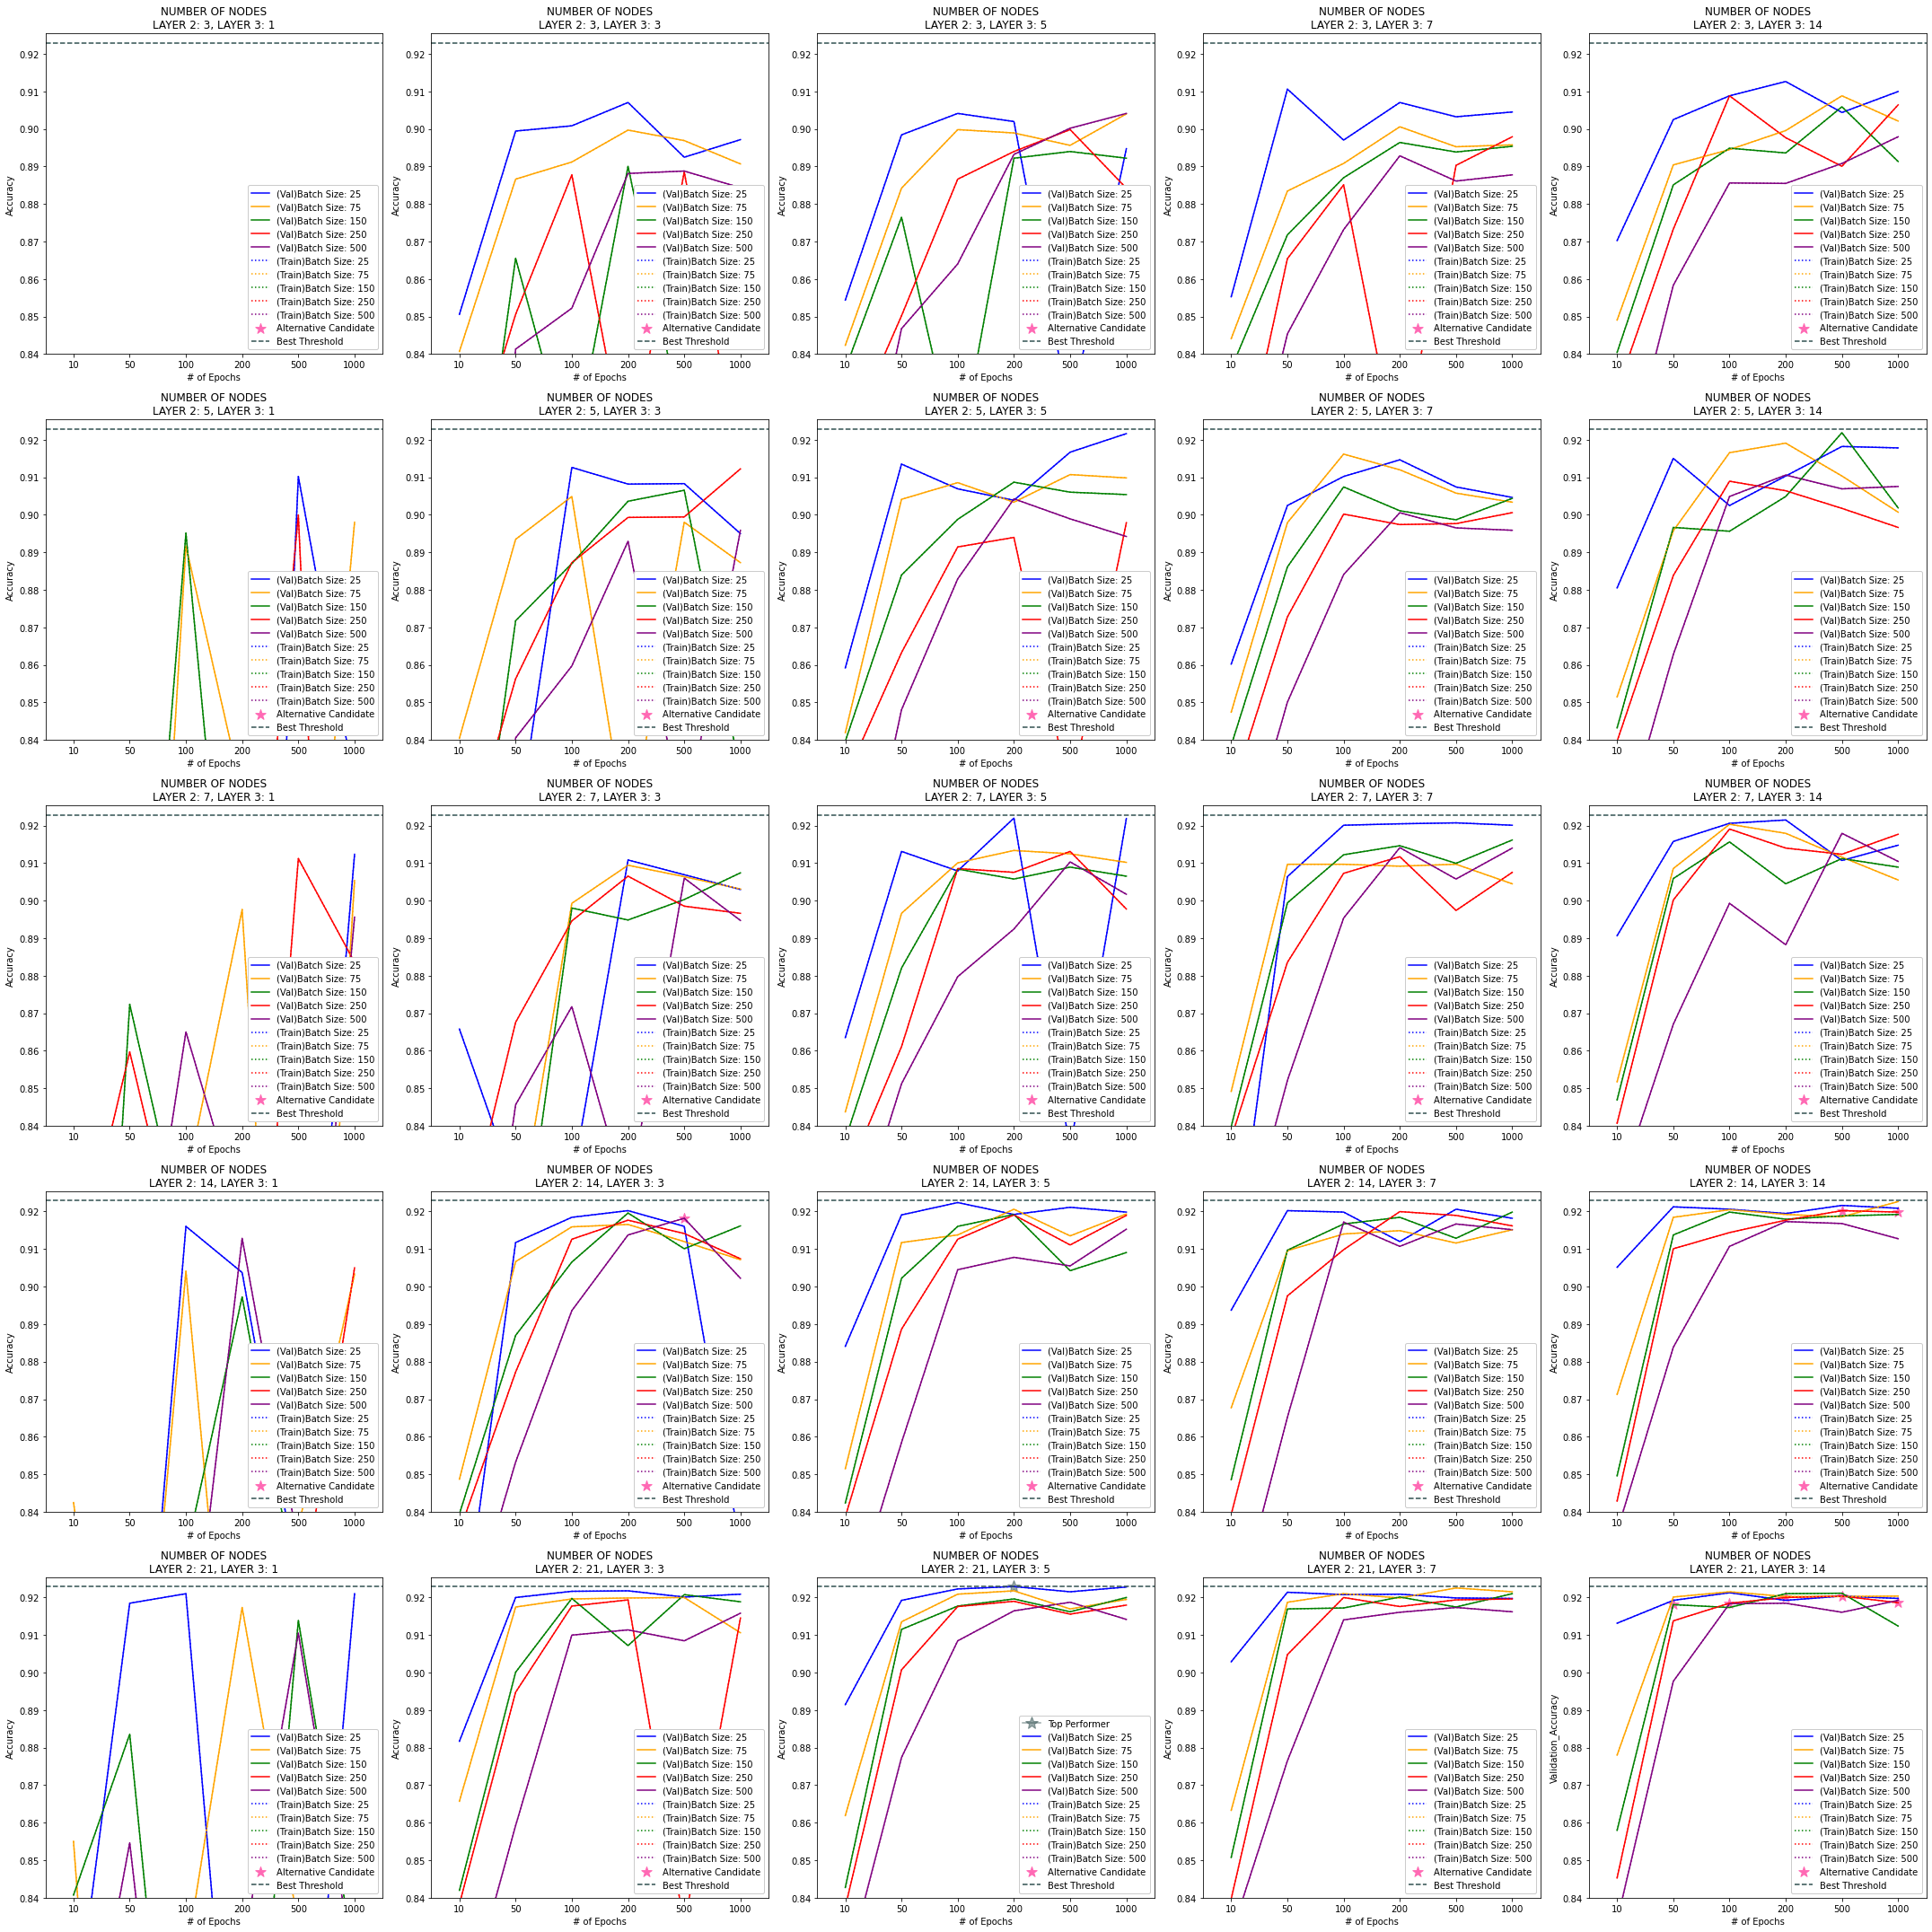

()

In [53]:
#Visualizing the results as SubPlots

AlternativeTolerance =.005
TimeTolerance = 10

PlotGroups(TransformedCvResults, AlternativeTolerance, TimeTolerance )

In [54]:
TransformedCvResults.head(31)

TrialNumber                     Parameters                      Train_Accuracy  Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size  Time_Cost  Test_Accuracy  Group  SubPlotRow  SubPlotColumn  LineNumber  LineSpot  Alternative
0        1       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.769             0.769           10       25         3          1       12.523        0.769        0         0            0             1          1        False   
1        2       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.735             0.735           50       25         3          1       39.746        0.735        0         0            0             1          2        False   
2        3       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.731             0.731          100       25         3          1       45.453        0.731        0         0            0             1          3        False   
3        4       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.655             0.655          200       25         3          1       41.815        0.655        0         0            0             1          4        False   
4        5       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.742             0.742          500       25         3          1       54.557        0.742        0         0            0             1          5        False   
5        6       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.818             0.818         1000       25         3          1       58.855        0.818        0         0            0             1          6        False   
6        7       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.626             0.626           10       75         3          1        5.741        0.626        0         0            0             2          1        False   
7        8       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.803             0.803           50       75         3          1       20.147        0.803        0         0            0             2          2        False   
8        9       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.731             0.731          100       75         3          1       25.682        0.731        0         0            0             2          3        False   
9       10       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.652             0.652          200       75         3          1       19.843        0.652        0         0            0             2          4        False   
10      11       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.807             0.807          500       75         3          1       33.292        0.807        0         0            0             2          5        False   
11      12       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.649             0.649         1000       75         3          1       19.893        0.649        0         0            0             2          6        False   
12      13       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.688             0.688           10      150         3          1        4.961        0.688        0         0            0             3          1        False   
13      14       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.641             0.641           50      150         3          1        9.033        0.641        0         0            0             3          2        False   
14      15       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.729             0.729          100      150         3          1       13.172        0.729        0         0            0             3          3        False   
15      16       {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.658             0.658          200      150         3          1       15.081        0.658        0      

In [55]:
display (TransformedCvResults)

TrialNumber                     Parameters                      Train_Accuracy  Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size  Time_Cost  Test_Accuracy  Group  SubPlotRow  SubPlotColumn  LineNumber  LineSpot  Alternative
0          1      {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.769             0.769           10       25         3          1       12.523        0.769        0         0            0             1          1        False   
1          2      {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.735             0.735           50       25         3          1       39.746        0.735        0         0            0             1          2        False   
2          3      {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.731             0.731          100       25         3          1       45.453        0.731        0         0            0             1          3        False   
3          4      {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.655             0.655          200       25         3          1       41.815        0.655        0         0            0             1          4        False   
4          5      {'Layer2': 3, 'Layer3': 1, 'activation_functio...       0.742             0.742          500       25         3          1       54.557        0.742        0         0            0             1          5        False   
..           ...                                                ...             ...                  ...    ...        ...        ...        ...        ...            ...    ...         ...            ...         ...       ...          ...
745      746      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.898             0.898           50      500        21         14        5.987        0.898       24         4            4             5          2        False   
746      747      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.918             0.918          100      500        21         14        9.982        0.918       24         4            4             5          3         True   
747      748      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.918             0.918          200      500        21         14       10.704        0.918       24         4            4             5          4        False   
748      749      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.916             0.916          500      500        21         14        9.952        0.916       24         4            4             5          5        False   
749      750      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.919             0.919         1000      500        21         14       10.804        0.919       24         4            4             5          6        False   

[750 rows x 16 columns]

In [56]:
NewFileCreate = False
AppendExistingFile = False

if NewFileCreate == True:
    ResultsData.to_csv(r'C:\Users\robli\OneDrive - The University of Texas at Dallas\MBA\5th Semester\6341 Applied Machine Learning\Assignments\Assignment 3\Results Ouput\BigDataGridSearch.csv', 
                       index = False)
if AppendExistingFile==True:
        ResultsData.to_csv(r'C:\Users\robli\OneDrive - The University of Texas at Dallas\MBA\5th Semester\6341 Applied Machine Learning\Assignments\Assignment 3\Results Ouput\AllData.csv', 
                       index = False, mode = 'a', header=False)

In [57]:
NewFileCreate = True
AppendExistingFile = False

date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
filename = f"BigDataGridSearch_{date}.csv"
print(filename)
#if NewFileCreate == True:
#    ResultsData.to_csv(r'C:\Users\robli\OneDrive - The University of Texas at Dallas\MBA\5th Semester\6341 Applied Machine Learning\Assignments\Assignment 3\Results Ouput\'+filename, 
#                       index = False)
if AppendExistingFile==True:
        ResultsData.to_csv(r'C:\Users\robli\OneDrive - The University of Texas at Dallas\MBA\5th Semester\6341 Applied Machine Learning\Assignments\Assignment 3\Results Ouput\AllData.csv', 
                       index = False, mode = 'a', header=False)

BigDataGridSearch_2022_07_24-07:49:27_PM.csv


In [58]:
from datetime import datetime

date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
print(f"filename_{date}")

filename_2022_07_24-07:49:27_PM


# Error vs Clock Time

In [59]:
###############################################

def PlotTimePerAccuracyCostGroups(ResultsData, AlternativeTolerance=.005, TimeTolerance=10 ):


    generator = len(ResultsData.Node2_Size.unique())
    linespotgenerator = len(ResultsData.Epochs.unique())
    linegenerator = len(ResultsData.Batch_Size.unique())
    maxAccuracy = max(ResultsData.Validation_Accuracy)


    ResultsData['Group'] = pd.DataFrame((ResultsData.TrialNumber-1)//
                                        (len(ResultsData.Epochs.unique())*len(ResultsData.Batch_Size.unique())))
    ResultsData['SubPlotRow'] = pd.DataFrame(ResultsData.Group//generator)
    ResultsData['SubPlotColumn'] = pd.DataFrame(ResultsData.Group%generator)
    ResultsData['LineNumber'] = ((ResultsData.TrialNumber - 1) // linespotgenerator ) % linegenerator +1
    ResultsData['LineSpot'] = (ResultsData.TrialNumber-1) % linespotgenerator +1
    ResultsData['Alternative'] = (ResultsData.Validation_Accuracy > 
                                  (maxAccuracy-AlternativeTolerance)) & (ResultsData.Time_Cost < TimeTolerance)


    numrows= len(ResultsData.SubPlotRow.unique())
    numcolumns= len(ResultsData.SubPlotColumn.unique())
    numlines =  len(ResultsData.LineNumber.unique())
    numspots =  len(ResultsData.LineSpot.unique())
    
    #display(ResultsData)
    #print("Total Rows:", numrows)
    #print("Unique Rows: ",ResultsData.SubPlotRow.unique())
    #print("Total Columns:", numcolumns)
    #print("Unique Columns: ",ResultsData.SubPlotColumn.unique())
    
    from IPython.core.display import display, HTML
    display(HTML("<style>div.output_scroll { height: 45em; }</style>"))

    TopScore = ResultsData.sort_values(by='Validation_Accuracy', ascending=False).head(1)
    print("The Best Performer Was:")
    display(TopScore)

    print("Time Friendly Alternatives of Accuracy within ",AlternativeTolerance," and less than ",TimeTolerance," seconds to train")
    display(ResultsData[ResultsData.Alternative==True])

    #define tick labels to transform plot into grid
    XTickLabels = [0]
    
    for i in range (0,len(ResultsData.Epochs.unique())):
        XTickLabels.append( ResultsData.Epochs.unique()[i])


    # making subplots
    fig, ax = plt.subplots(numrows,numcolumns, figsize=(5*numrows,5*numcolumns))

    for row in range(0,numrows):
        for column in range(0,numcolumns):
            GroupLines = ResultsData.loc[(ResultsData['SubPlotRow']==row)&(ResultsData['SubPlotColumn']==column)]
            ##print("SanityCheck: Number of observations in GroupLines:", GroupLines.shape[0])
            #display(GroupLines)

            #Indicate winning parameter            
            if max(GroupLines.Validation_Accuracy)==max(TopScore.Validation_Accuracy) : 
                ax[row, column].plot(TopScore.LineSpot,TopScore.TimePerAccuracy,
                                     marker="*",color='black',markersize=15, alpha=.5,
                                     label = "Top Performer")
            for line in range(1,numlines+1):
                ##print("Sanity Check: Should Print out 4 points")
                ThisLine = GroupLines.loc[GroupLines.LineNumber==line]
                ##display(ThisLine)
                ax[row,column].plot(ThisLine.LineSpot, ThisLine.TimePerAccuracy,
                                    label = (" Batch Size: " + str(ThisLine.Batch_Size.iloc[0])) )

            #Show alternatives
            #display(GroupLines[GroupLines.Alternative == True])
            ax[row,column].scatter(GroupLines[GroupLines.Alternative == True].LineSpot,
                                GroupLines[GroupLines.Alternative == True].TimePerAccuracy,
                                marker = "*", s=145, color = 'green',
                                label = ("Alternative Candidate"))



            #subplot Title
            ax[row,column].title.set_text("NUMBER OF NODES\n" +
                                          "LAYER 2: " + str(GroupLines.Node2_Size.iloc[0])+ ", "+
                                          "LAYER 3: " + str(GroupLines.Node3_Size.iloc[0]))

            #subplot Xaxis & Yaxis Title
            ax[row,column].set_xlabel("# of Epochs")
            ax[row,column].set_ylabel("Seconds")

            #subplot Xaxis Width - Number of Epochs
            ax[row,column].set_xlim(.5, numspots + .5) #**

            #subplot Xaxis Tick Labels - Show each Epoch but spread out equally
            ax[row,column].set_xticklabels(XTickLabels)

            #subplot Xaxis Tick Marks - Should see a tickmark for each epoch(the plus 2 creates 2 off plot tickmarks, frames epochs)
            ax[row,column].locator_params(axis='x', nbins=len(GroupLines.Epochs.unique())+1) ##*

            #subplot Yaxis Height - Accuracy Range
            ax[row,column].set_ylim( 0, max(ResultsData.TimePerAccuracy)+.0025)
             #if min(ResultsData.Accuracy) <.85:
#                ax[row,column].set_ylim( .875, max(ResultsData.Accuracy)+.0025)
#            else:ax[row,column].set_ylim(min(ResultsData.Accuracy)-.0025, max(ResultsData.Accuracy)+.0025)    


            #subplot Target - show how close to the best value subplot is
            #l1=ax[row,column].axhline(ResultsData.TimePerAccuracy[ResultsData["Validation_Accuracy"] == max(ResultsData.Validation_Accuracy)].iloc[0],
            #                          color='black',ls='--')
            l1=ax[row,column].axhline(TopScore.TimePerAccuracy.iloc[0], color='black',ls='--')
            TopScore
            l1.set_label('Best Threshold')
            
            #Locate Legend on all subplots and set transparency
            ax[row,column].legend(loc='upper left', framealpha =1)





    # set the spacing between subplots
    fig.tight_layout()
    #Add axis labels to all subplots
    #plt.xlabel("# of Epochs")
    #plt.ylabel("Accuracy")
    
    plt.show()
    
    return()

## Non CV Time per Accuracy

The Best Performer Was:


TrialNumber                  Parameters                  Train_Accuracy Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size Time_Cost Test_Accuracy TimePerAccuracy Group SubPlotRow SubPlotColumn LineNumber LineSpot  Alternative
0      437     batch_size150-epoch500Node2Size21Node3Size5      0.928             0.926         500      150        21          5       13.447       0.917          0.145       14       2            4           3         5        False

Time Friendly Alternatives of Accuracy within  0.005  and less than  10  seconds to train


TrialNumber                   Parameters                  Train_Accuracy Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size Time_Cost Test_Accuracy TimePerAccuracy Group SubPlotRow SubPlotColumn LineNumber LineSpot  Alternative
0        69        batch_size75-epoch100Node2Size7Node3Size1      0.919             0.922         100       75         7          1        5.572       0.913           0.06        2       0            2           2         3        True    
0       100       batch_size75-epoch200Node2Size14Node3Size1      0.925             0.921         200       75        14          1        8.469        0.91          0.092        3       0            3           2         4        True    
0       119      batch_size500-epoch500Node2Size14Node3Size1      0.923             0.925         500      500        14          1        4.206       0.911          0.045        3       0            3           5         5        True    
0       122        batch_size25-epoch50Node2Size21Node3Size1      0.923             0.922          50       25        21          1        7.382       0.916           0.08        4       0            4           1         2        True    
0       142      batch_size250-epoch200Node2Size21Node3Size1      0.921             0.922         200      250        21          1        3.726       0.913           0.04        4       0            4           4         4        True    
..         ...                                           ...            ...                 ...    ...        ...        ...        ...       ...           ...             ...   ...        ...           ...        ...      ...          ...
0       736     batch_size150-epoch200Node2Size21Node3Size14      0.925             0.923         200      150        21         14        5.737       0.913          0.062       24       4            4           3         4        True    
0       742     batch_size250-epoch200Node2Size21Node3Size14      0.924             0.922         200      250        21         14        4.162        0.91          0.045       24       4            4           4         4        True    
0       743     batch_size250-epoch500Node2Size21Node3Size14      0.925             0.924         500      250        21         14        8.797       0.911          0.095       24       4            4           4         5        True    
0       748     batch_size500-epoch200Node2Size21Node3Size14      0.922             0.923         200      500        21         14        2.741       0.911           0.03       24       4            4           5         4        True    
0       749     batch_size500-epoch500Node2Size21Node3Size14      0.925             0.922         500      500        21         14        5.726       0.911          0.062       24       4            4           5         5        True    

[56 rows x 17 columns]

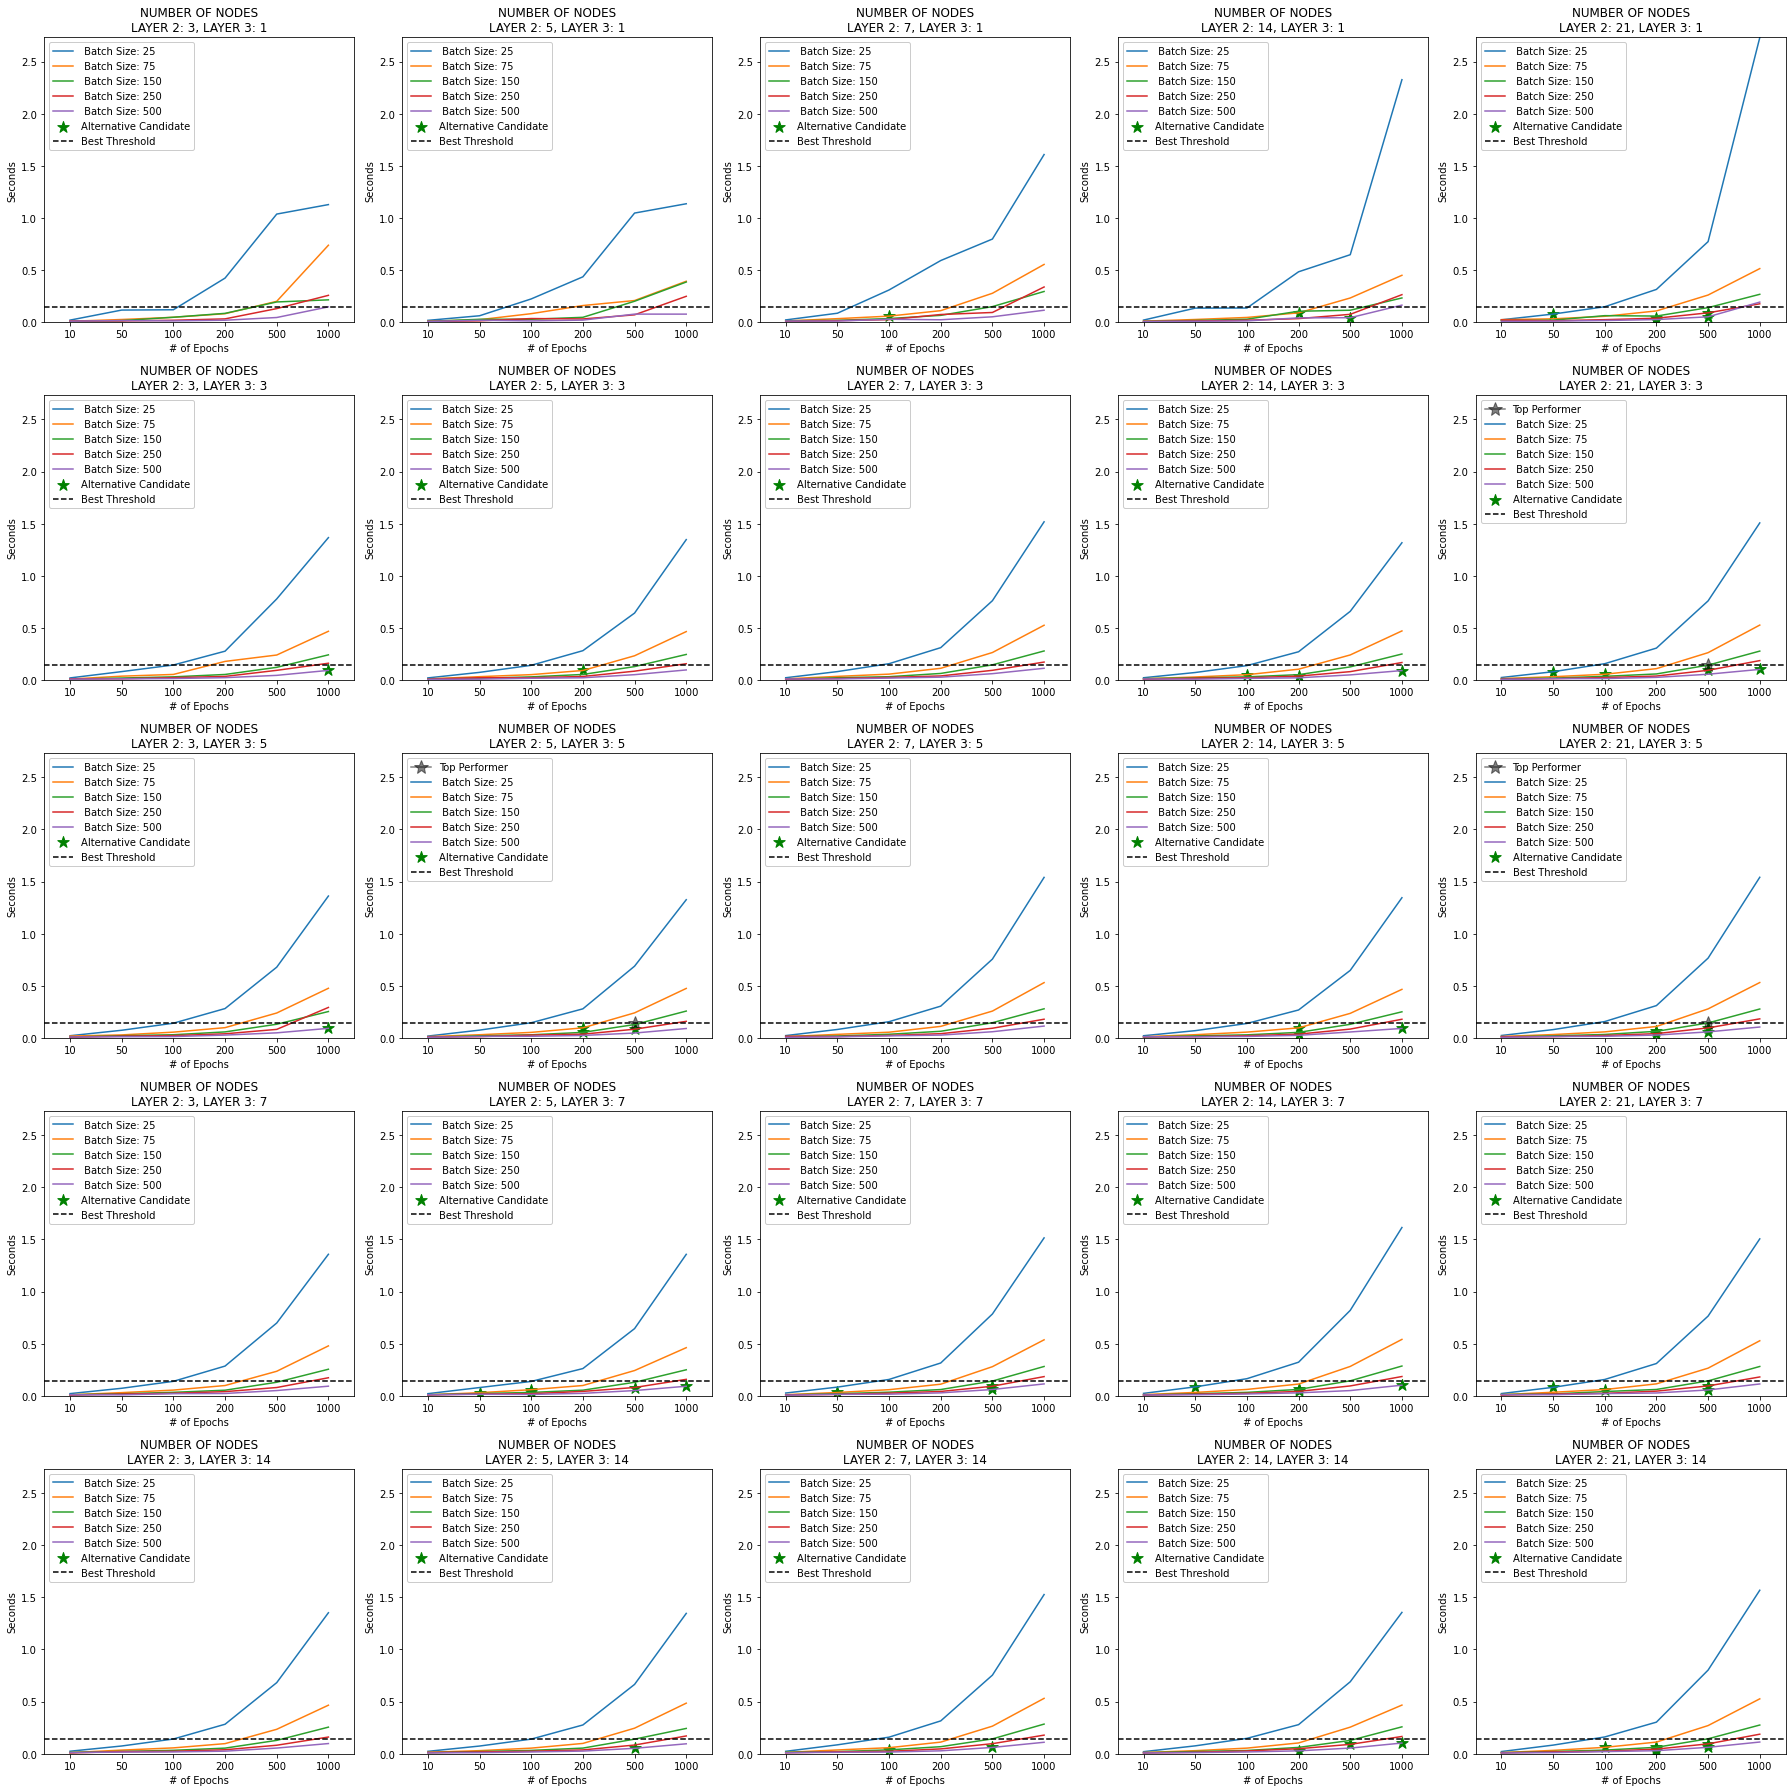

()

In [60]:
TransformedNonCvResults2 = ResultsData.copy()
TransformedNonCvResults2.insert(10,"TimePerAccuracy",TransformedNonCvResults2.Time_Cost/(100*TransformedNonCvResults2.Validation_Accuracy))
#TransformedNonCvResults2
PlotTimePerAccuracyCostGroups(TransformedNonCvResults2)

## TanH NonCV TimePerAccuracy

The Best Performer Was:


TrialNumber                  Parameters                 Train_Accuracy Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size Time_Cost Test_Accuracy TimePerAccuracy Group SubPlotRow SubPlotColumn LineNumber LineSpot  Alternative
0      62      batch_size75-epoch500Node2Size21Node3Size7      0.927             0.927         500      75         21          7       49.722       0.91           0.536        5       1            2           1         2        False

Time Friendly Alternatives of Accuracy within  0.005  and less than  10  seconds to train


TrialNumber                   Parameters                   Train_Accuracy Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size Time_Cost Test_Accuracy TimePerAccuracy Group SubPlotRow SubPlotColumn LineNumber LineSpot  Alternative
0      13         batch_size75-epoch200Node2Size14Node3Size5      0.921             0.923         200       75        14          5        9.728        0.91          0.105        1       0            1           1         1        True    
0      31        batch_size250-epoch200Node2Size21Node3Size5      0.924             0.923         200      250        21          5        4.355       0.909          0.047        2       0            2           3         1        True    
0      40         batch_size150-epoch200Node2Size7Node3Size7      0.921             0.923         200      150         7          7        5.688        0.91          0.062        3       1            0           2         1        True    
0      56        batch_size250-epoch500Node2Size14Node3Size7      0.924             0.924         500      250        14          7        8.991        0.91          0.097        4       1            1           3         2        True    
0      59        batch_size500-epoch500Node2Size14Node3Size7      0.923             0.922         500      500        14          7        5.691       0.912          0.062        4       1            1           4         2        True    
0      95       batch_size500-epoch500Node2Size14Node3Size14      0.924             0.922         500      500        14         14        5.824       0.913          0.063        7       2            1           4         2        True    
0      96      batch_size500-epoch1000Node2Size14Node3Size14      0.925             0.924        1000      500        14         14        9.408       0.914          0.102        7       2            1           4         3        True

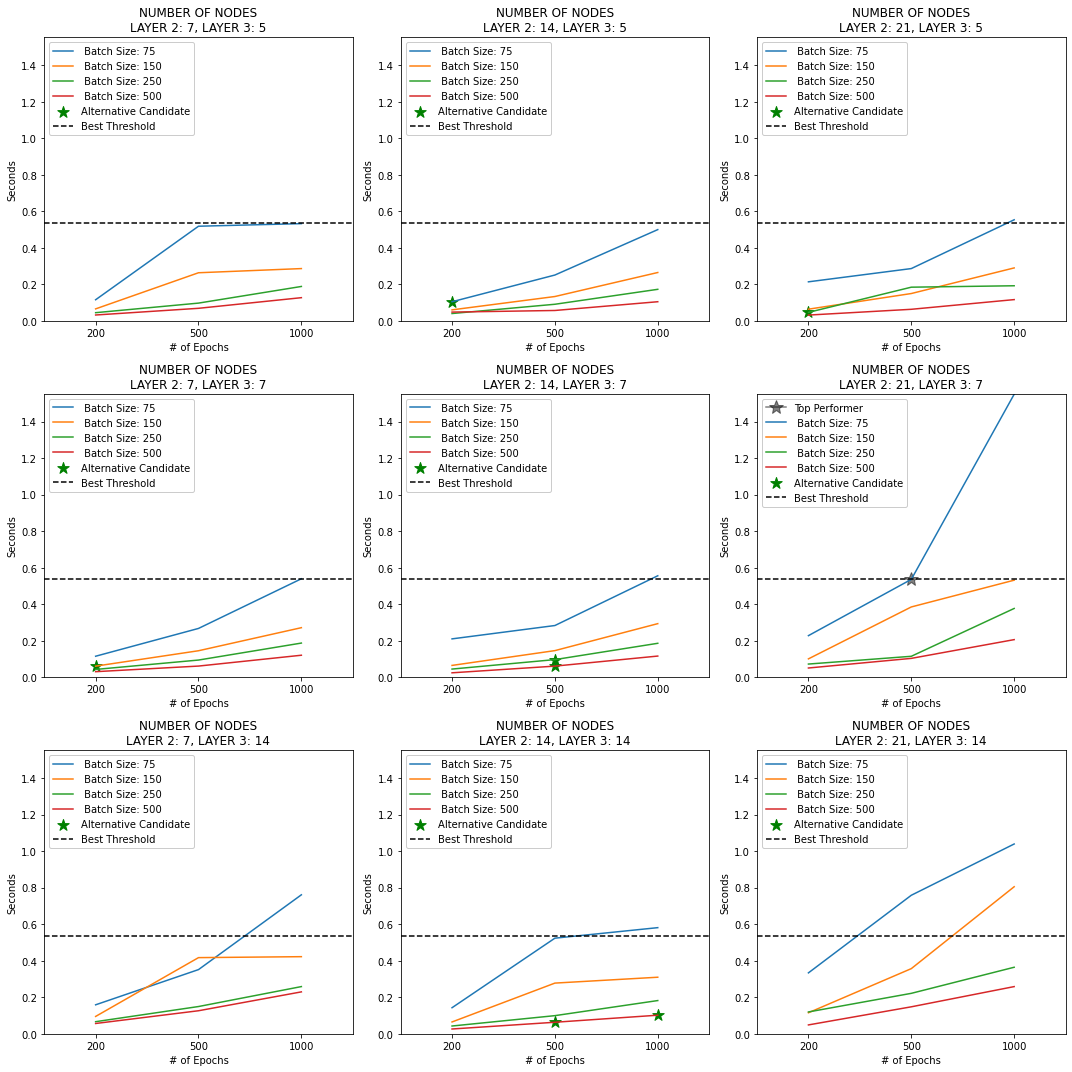

()

In [61]:
TransformedTanHResults2 = ResultsDataTanH.copy()
TransformedTanHResults2.insert(10,"TimePerAccuracy",TransformedTanHResults2.Time_Cost/(100*TransformedTanHResults2.Validation_Accuracy))
#TransformedTanHResults2
PlotTimePerAccuracyCostGroups(TransformedTanHResults2)

## CV Time per Accuracy

The Best Performer Was:


TrialNumber                     Parameters                      Train_Accuracy  Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size  Time_Cost  Test_Accuracy  TimePerAccuracy  Group  SubPlotRow  SubPlotColumn  LineNumber  LineSpot  Alternative
663      664      {'Layer2': 21, 'Layer3': 5, 'activation_functi...       0.923             0.923          200      25         21          5       40.589        0.923           0.44         22         4            2             1          4        False

Time Friendly Alternatives of Accuracy within  0.005  and less than  10  seconds to train


TrialNumber                     Parameters                      Train_Accuracy  Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size  Time_Cost  Test_Accuracy  TimePerAccuracy  Group  SubPlotRow  SubPlotColumn  LineNumber  LineSpot  Alternative
508      509      {'Layer2': 14, 'Layer3': 3, 'activation_functi...       0.918             0.918          500      500        14          3        9.539        0.918           0.104        16         3            1             5          5        True    
592      593      {'Layer2': 14, 'Layer3': 14, 'activation_funct...       0.920             0.920          500      250        14         14        9.143        0.920           0.099        19         3            4             4          5        True    
593      594      {'Layer2': 14, 'Layer3': 14, 'activation_funct...       0.920             0.920         1000      250        14         14        9.406        0.920           0.102        19         3            4             4          6        True    
733      734      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.918             0.918           50      150        21         14        8.761        0.918           0.095        24         4            4             3          2        True    
741      742      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.920             0.920          200      250        21         14        8.960        0.920           0.097        24         4            4             4          4        True    
742      743      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.920             0.920          500      250        21         14        8.967        0.920           0.097        24         4            4             4          5        True    
743      744      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.919             0.919         1000      250        21         14        9.412        0.919           0.102        24         4            4             4          6        True    
746      747      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.918             0.918          100      500        21         14        9.982        0.918           0.109        24         4            4             5          3        True

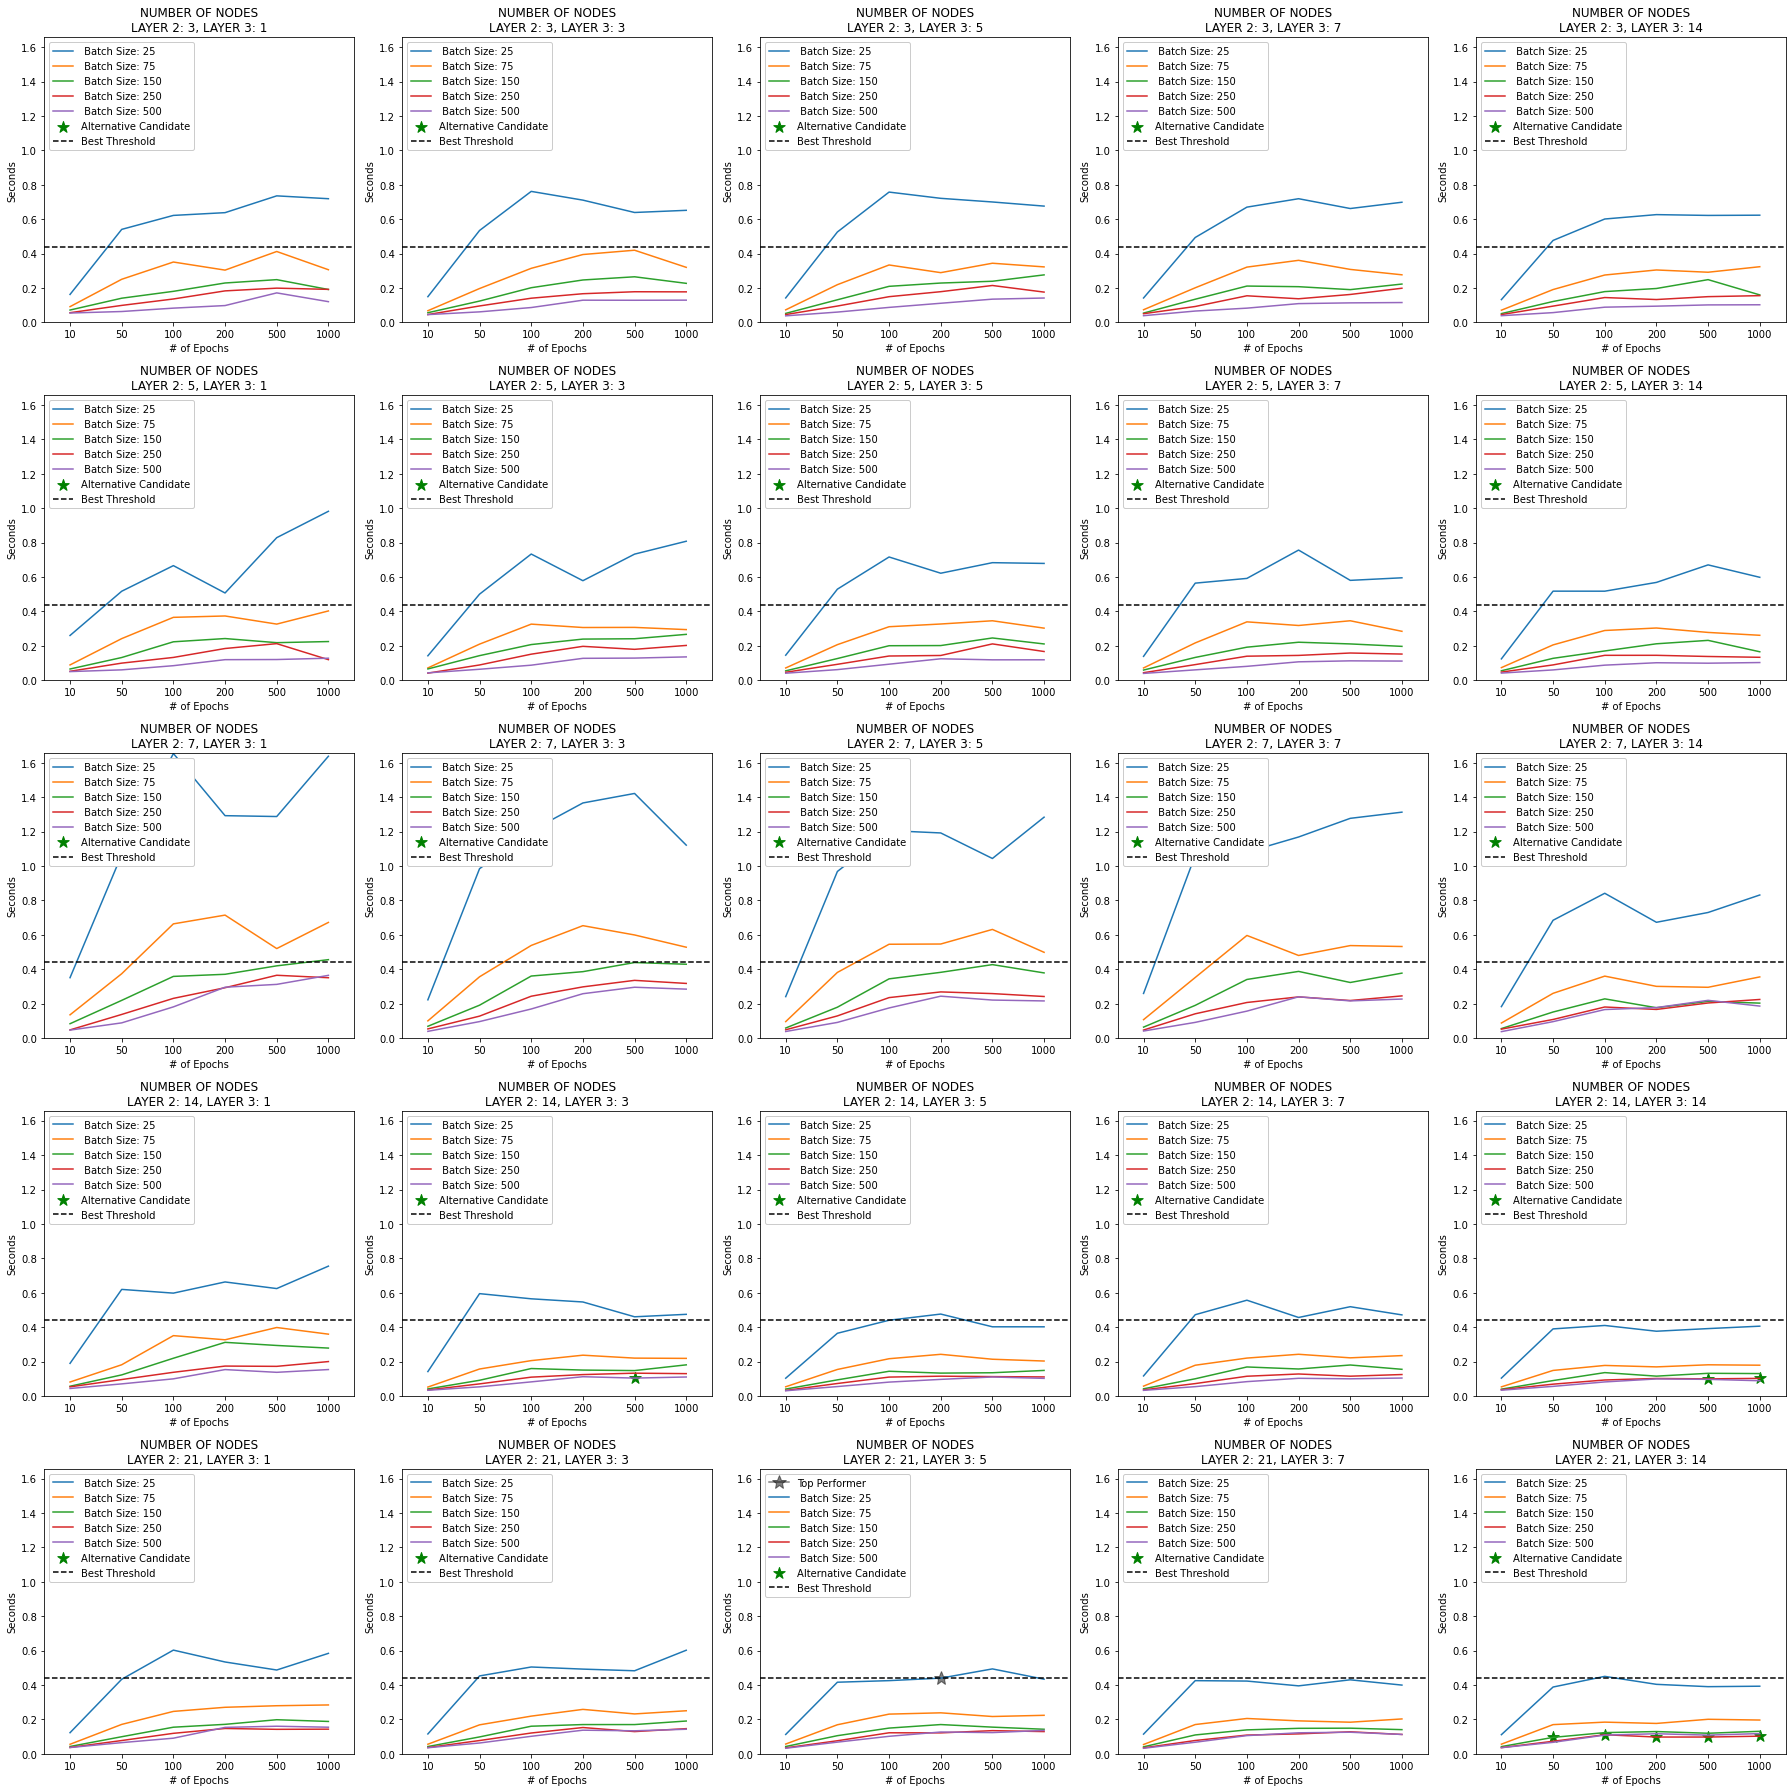

()

In [62]:
TransformedCvResults2 = TransformedCvResults.copy()
TransformedCvResults2.insert(10,"TimePerAccuracy",TransformedCvResults2.Time_Cost/(100*TransformedCvResults2.Validation_Accuracy))
#TransformedCvResults2
PlotTimePerAccuracyCostGroups(TransformedCvResults2)


The Best Performer Was:


TrialNumber                     Parameters                      Train_Accuracy  Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size  Time_Cost  Test_Accuracy  TimePerAccuracy  Group  SubPlotRow  SubPlotColumn  LineNumber  LineSpot  Alternative
663      664      {'Layer2': 21, 'Layer3': 5, 'activation_functi...       0.923             0.923          200      25         21          5       40.589        0.923           0.44         22         4            2             1          4        False

Time Friendly Alternatives of Accuracy within  0.005  and less than  20  seconds to train


TrialNumber                     Parameters                      Train_Accuracy  Validation_Accuracy Epochs Batch_Size Node2_Size Node3_Size  Time_Cost  Test_Accuracy  TimePerAccuracy  Group  SubPlotRow  SubPlotColumn  LineNumber  LineSpot  Alternative
440      441      {'Layer2': 7, 'Layer3': 14, 'activation_functi...       0.919             0.919          100      250         7         14       16.623        0.919           0.181        14         2            4             4          3        True    
495      496      {'Layer2': 14, 'Layer3': 3, 'activation_functi...       0.920             0.920          200      150        14          3       13.839        0.920           0.150        16         3            1             3          4        True    
508      509      {'Layer2': 14, 'Layer3': 3, 'activation_functi...       0.918             0.918          500      500        14          3        9.539        0.918           0.104        16         3            1             5          5        True    
521      522      {'Layer2': 14, 'Layer3': 5, 'activation_functi...       0.919             0.919         1000       75        14          5       18.665        0.919           0.203        17         3            2             2          6        True    
525      526      {'Layer2': 14, 'Layer3': 5, 'activation_functi...       0.919             0.919          200      150        14          5       12.206        0.919           0.133        17         3            2             3          4        True    
..           ...                                                ...             ...                  ...    ...        ...        ...        ...        ...            ...              ...    ...         ...            ...         ...       ...          ...
742      743      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.920             0.920          500      250        21         14        8.967        0.920           0.097        24         4            4             4          5        True    
743      744      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.919             0.919         1000      250        21         14        9.412        0.919           0.102        24         4            4             4          6        True    
746      747      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.918             0.918          100      500        21         14        9.982        0.918           0.109        24         4            4             5          3        True    
747      748      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.918             0.918          200      500        21         14       10.704        0.918           0.117        24         4            4             5          4        True    
749      750      {'Layer2': 21, 'Layer3': 14, 'activation_funct...       0.919             0.919         1000      500        21         14       10.804        0.919           0.118        24         4            4             5          6        True    

[56 rows x 17 columns]

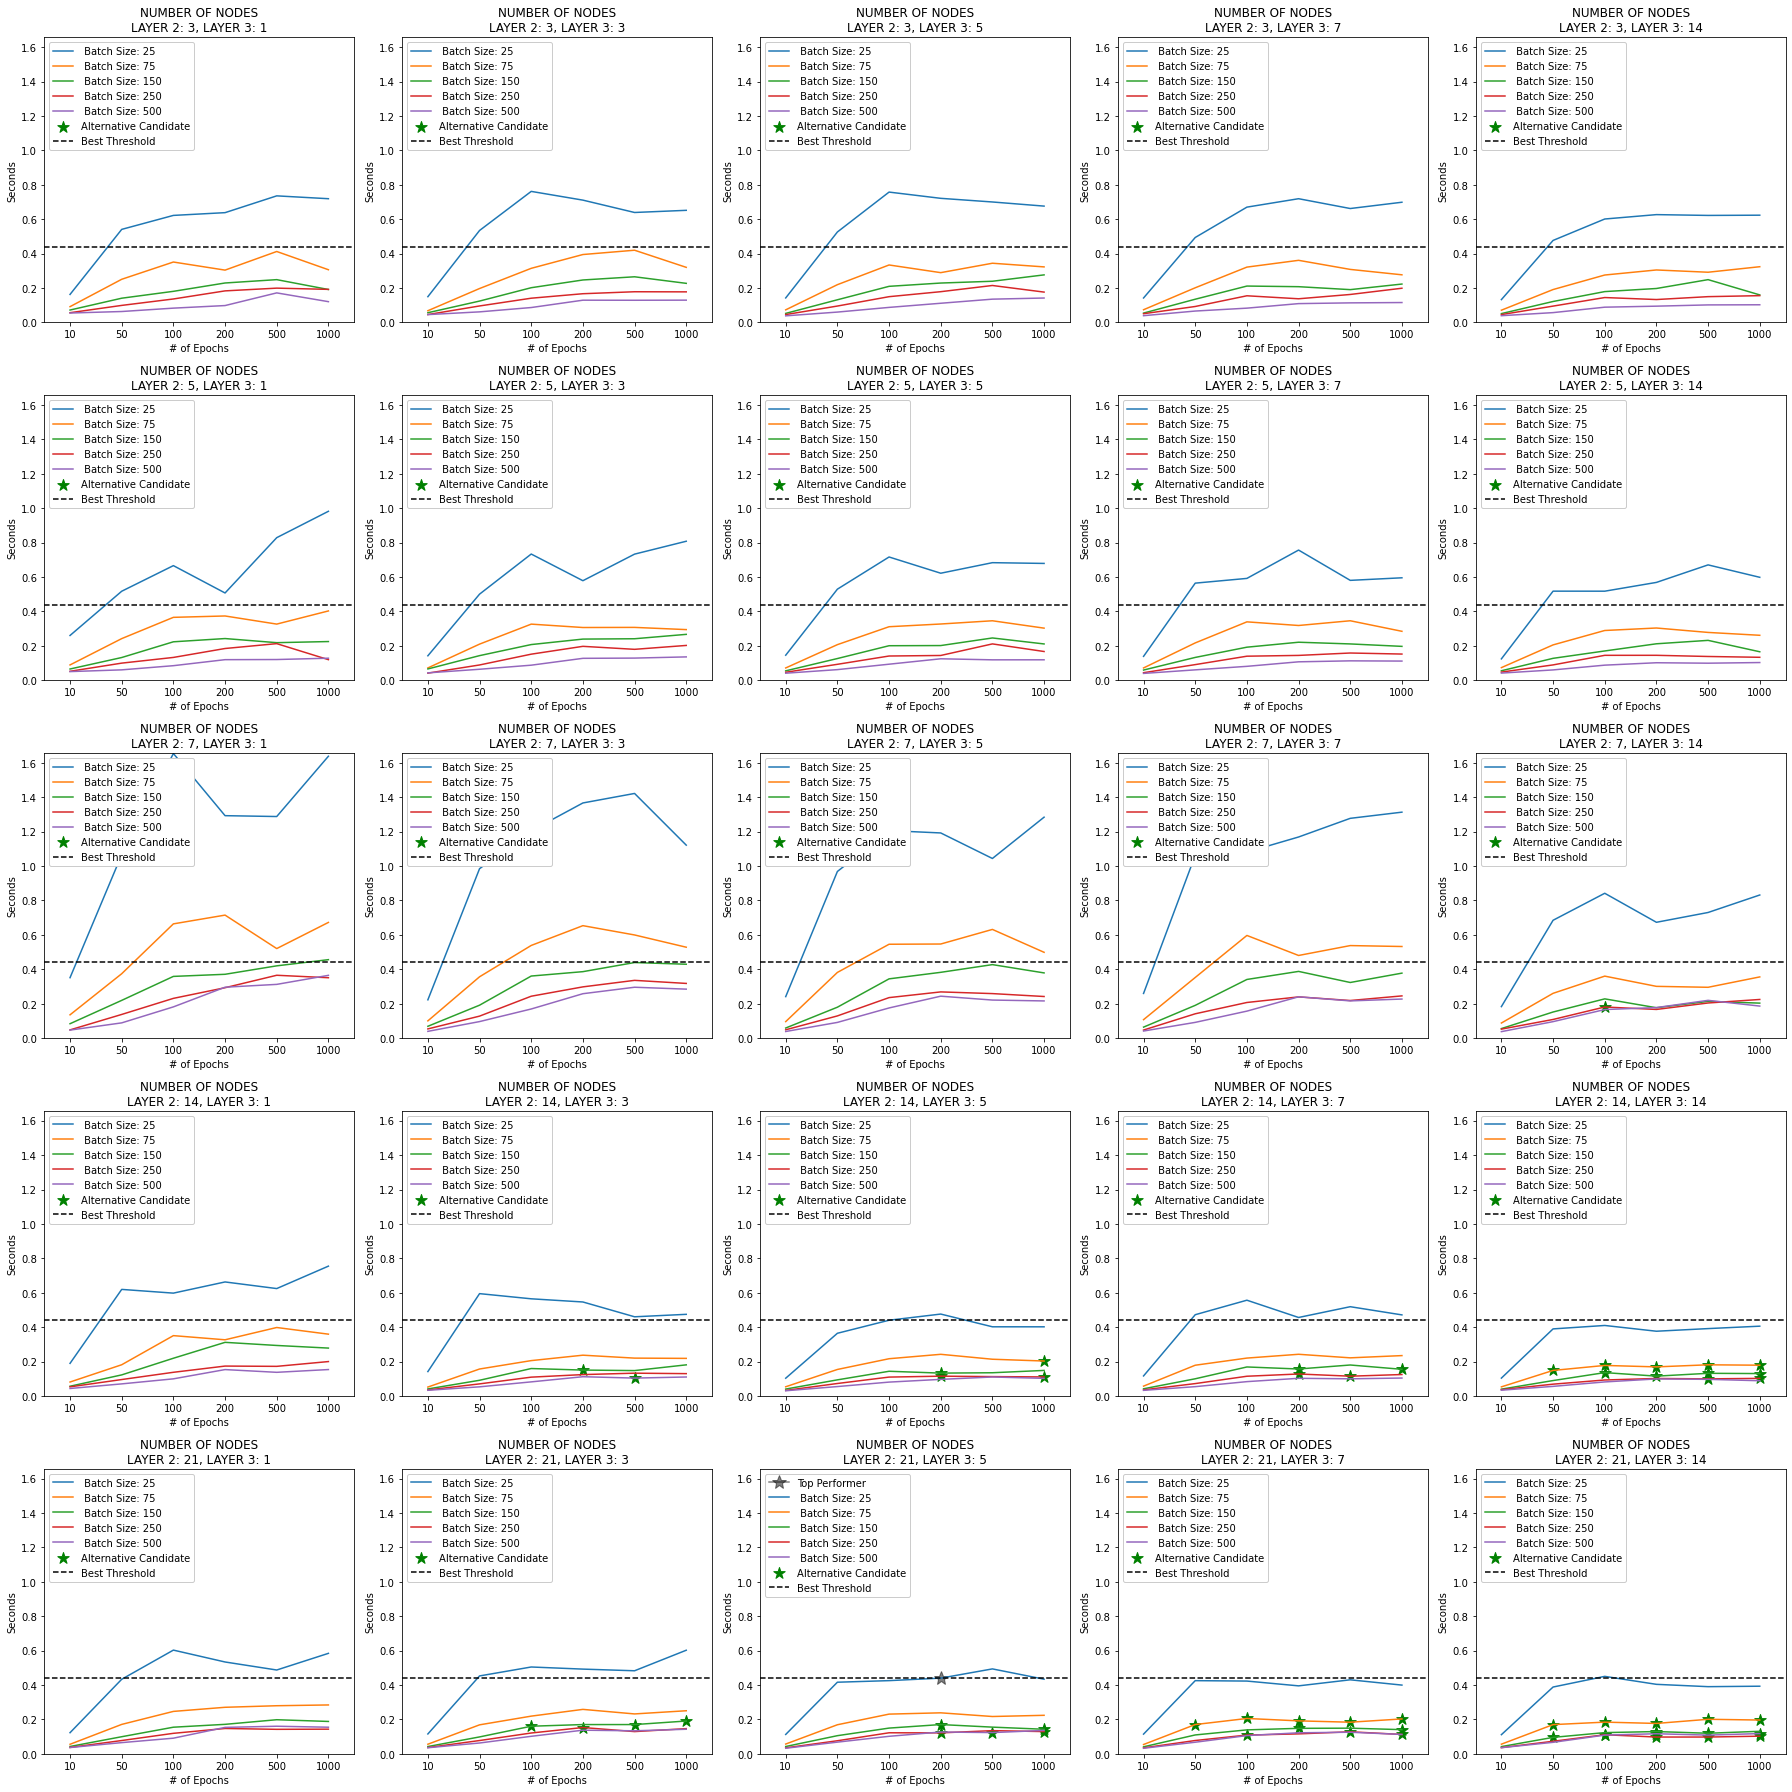

()

In [63]:
PlotTimePerAccuracyCostGroups(TransformedCvResults2,.005,20)